# **ANÁLISIS DE LA ECONOMÍA MUNDIAL**

En este EDA analizaremos la Economía Mundial teniendo en cuenta cinco variables:corrupción,coste de la vida,riqueza nacional,turismo y desempleo.

Comprobaremos el impacto que tiene sobre la Economía Mundial las cinco variables mencionadas:

**Corrupción**:Intentaremos demostrar cómo los ingresos de un país están relacionados con el índice de corrupción del mismo.

**Costo de la vida**:Comprobaremos si el coste de la vida está ligado a los ingresos mensuales de un país y a su poder adquisitivo.

**Países más ricos**:Analizaremos la prosperidad de los distintos países teniendo en cuenta su PIB per cápita.

**Turismo**:Veremos la asociación entre turistas y número de ingresos de un país y su impacto sobre el PIB.

**Desempleo**:Estudiaremos la tasa de desempleo en diversos países.




## OBTENCIÓN DE LOS DATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
# Datasets y su fuente
df_corruption=pd.read_csv('data/corruption.csv')
fuente_1 = "www.worlddata.info"

df_cost=pd.read_csv('data/cost_of_living.csv')
fuente_2 = "www.worlddata.info"

df_rich=pd.read_csv('data/richest_countries.csv')
fuente_3 = "www.worlddata.info"

df_tour=pd.read_csv('data/tourism.csv')
fuente_4 = "www.worlddata.info/www.numbeo.com"

df_unem=pd.read_csv('data/unemployment.csv')
fuente_5 = "www.worlddata.info"


In [2]:
# Primer dataset
df_corruption.head()

,country,annual_income,corruption_index
0,Denmark,68110,12
1,Finland,53660,12
2,New Zealand,45340,12
3,Norway,84090,15
4,Singapore,64010,15


In [3]:
# Segundo dataset
df_cost.head()

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5


In [4]:
#Tercer dataset
df_rich.head()

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192


In [5]:
#Cuarto dataset
df_tour.head()

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3


In [6]:
#Quinto dataset
df_unem.head()

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8


**1. CORRUPCIÓN**

In [7]:
#CORRUPCIÓN
#Vamos a analizar la primera variable,corrupción,por país.Para ello vamos a tener en cuenta los ingresos anuales e índice de corrupción de cada país.

df_corruption=pd.read_csv('data/corruption.csv')
df_corruption

,country,annual_income,corruption_index
0,Denmark,68110,12
1,Finland,53660,12
2,New Zealand,45340,12
3,Norway,84090,15
4,Singapore,64010,15
...,...,...,...
105,Yemen,670,84
106,Venezuela,13080,86
107,Somalia,450,87
108,Syria,1170,87


In [8]:
df_corruption.shape

(110, 3)

In [9]:
df_corruption.head()

,country,annual_income,corruption_index
0,Denmark,68110,12
1,Finland,53660,12
2,New Zealand,45340,12
3,Norway,84090,15
4,Singapore,64010,15


In [10]:
df_corruption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           110 non-null    object
 1   annual_income     110 non-null    int64 
 2   corruption_index  110 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


In [11]:
#Compruebo si hay valores nulos en el dataframe
df_corruption.isnull().any()

country             False
annual_income       False
corruption_index    False
dtype: bool

In [12]:
df_corruption.describe()

,annual_income,corruption_index
count,110.000000,110.000000
mean,17195.727273,59.200000
std,23741.147397,22.170234
min,240.000000,12.000000
25%,1470.000000,41.750000
50%,4130.000000,69.000000
75%,25410.000000,75.000000
max,90360.000000,89.000000


In [13]:
df_corruption_2=df_corruption.sort_values(by='annual_income',ascending=False)
df_corruption_2

,country,annual_income,corruption_index
6,Switzerland,90360,16
3,Norway,84090,15
8,Luxembourg,81110,19
16,Ireland,74520,26
22,United States,70430,33
...,...,...,...
78,Madagascar,500,74
79,Mozambique,480,74
109,South Sudan,460,89
107,Somalia,450,87


<AxesSubplot:xlabel='country'>

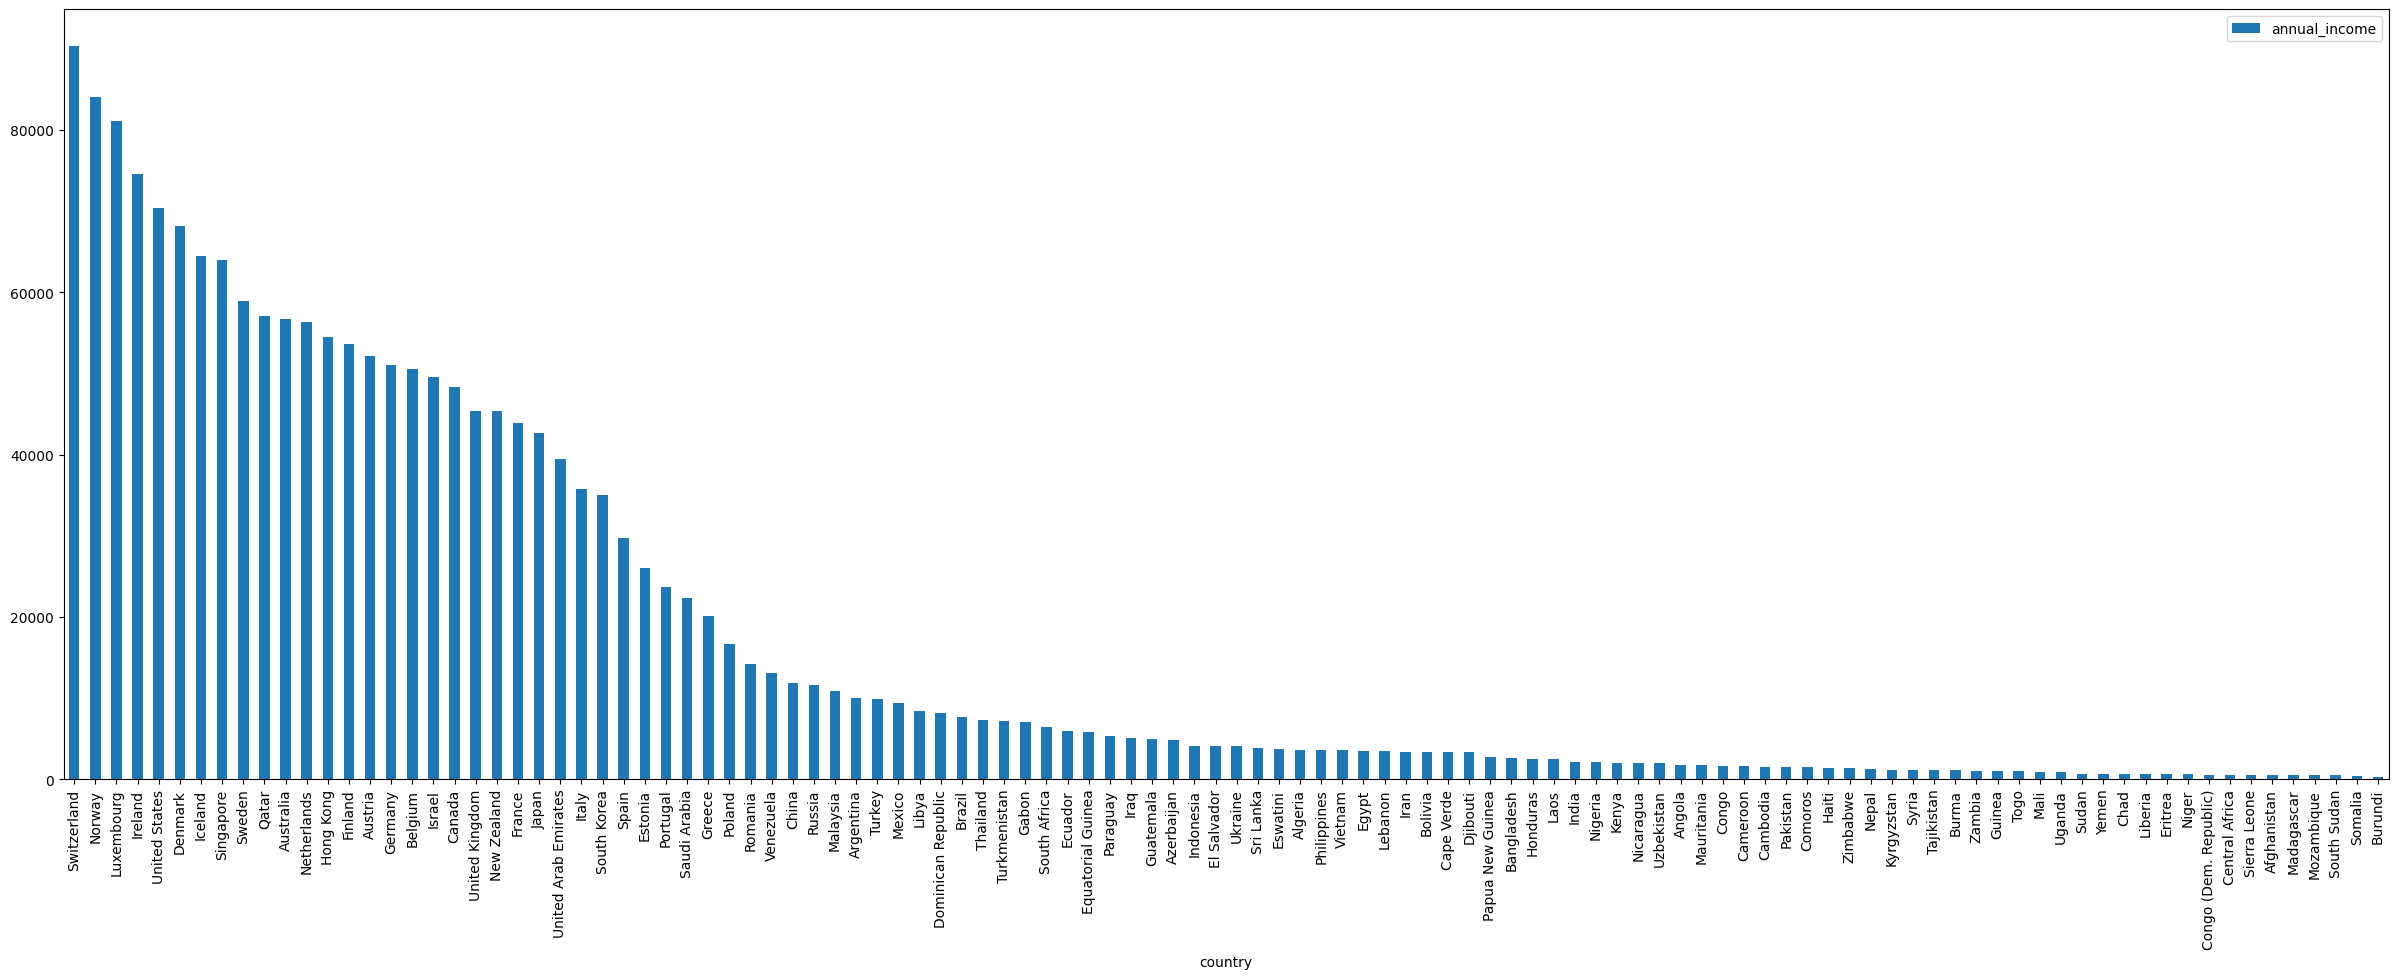

In [14]:
#Vamos a representar los ingresos anuales por país en primer lugar
df_corruption_2.plot( x='country',y='annual_income',kind='bar',figsize=(30,10))

In [15]:
#Vamos a comprobar los 10 países con mayores ingresos anuales y lo representamos.
df_corruption_3=df_corruption_2.nlargest(10,'annual_income')
df_corruption_3



,country,annual_income,corruption_index
6,Switzerland,90360,16
3,Norway,84090,15
8,Luxembourg,81110,19
16,Ireland,74520,26
22,United States,70430,33
0,Denmark,68110,12
15,Iceland,64410,26
4,Singapore,64010,15
5,Sweden,58890,15
23,Qatar,57120,37


<AxesSubplot:xlabel='country'>

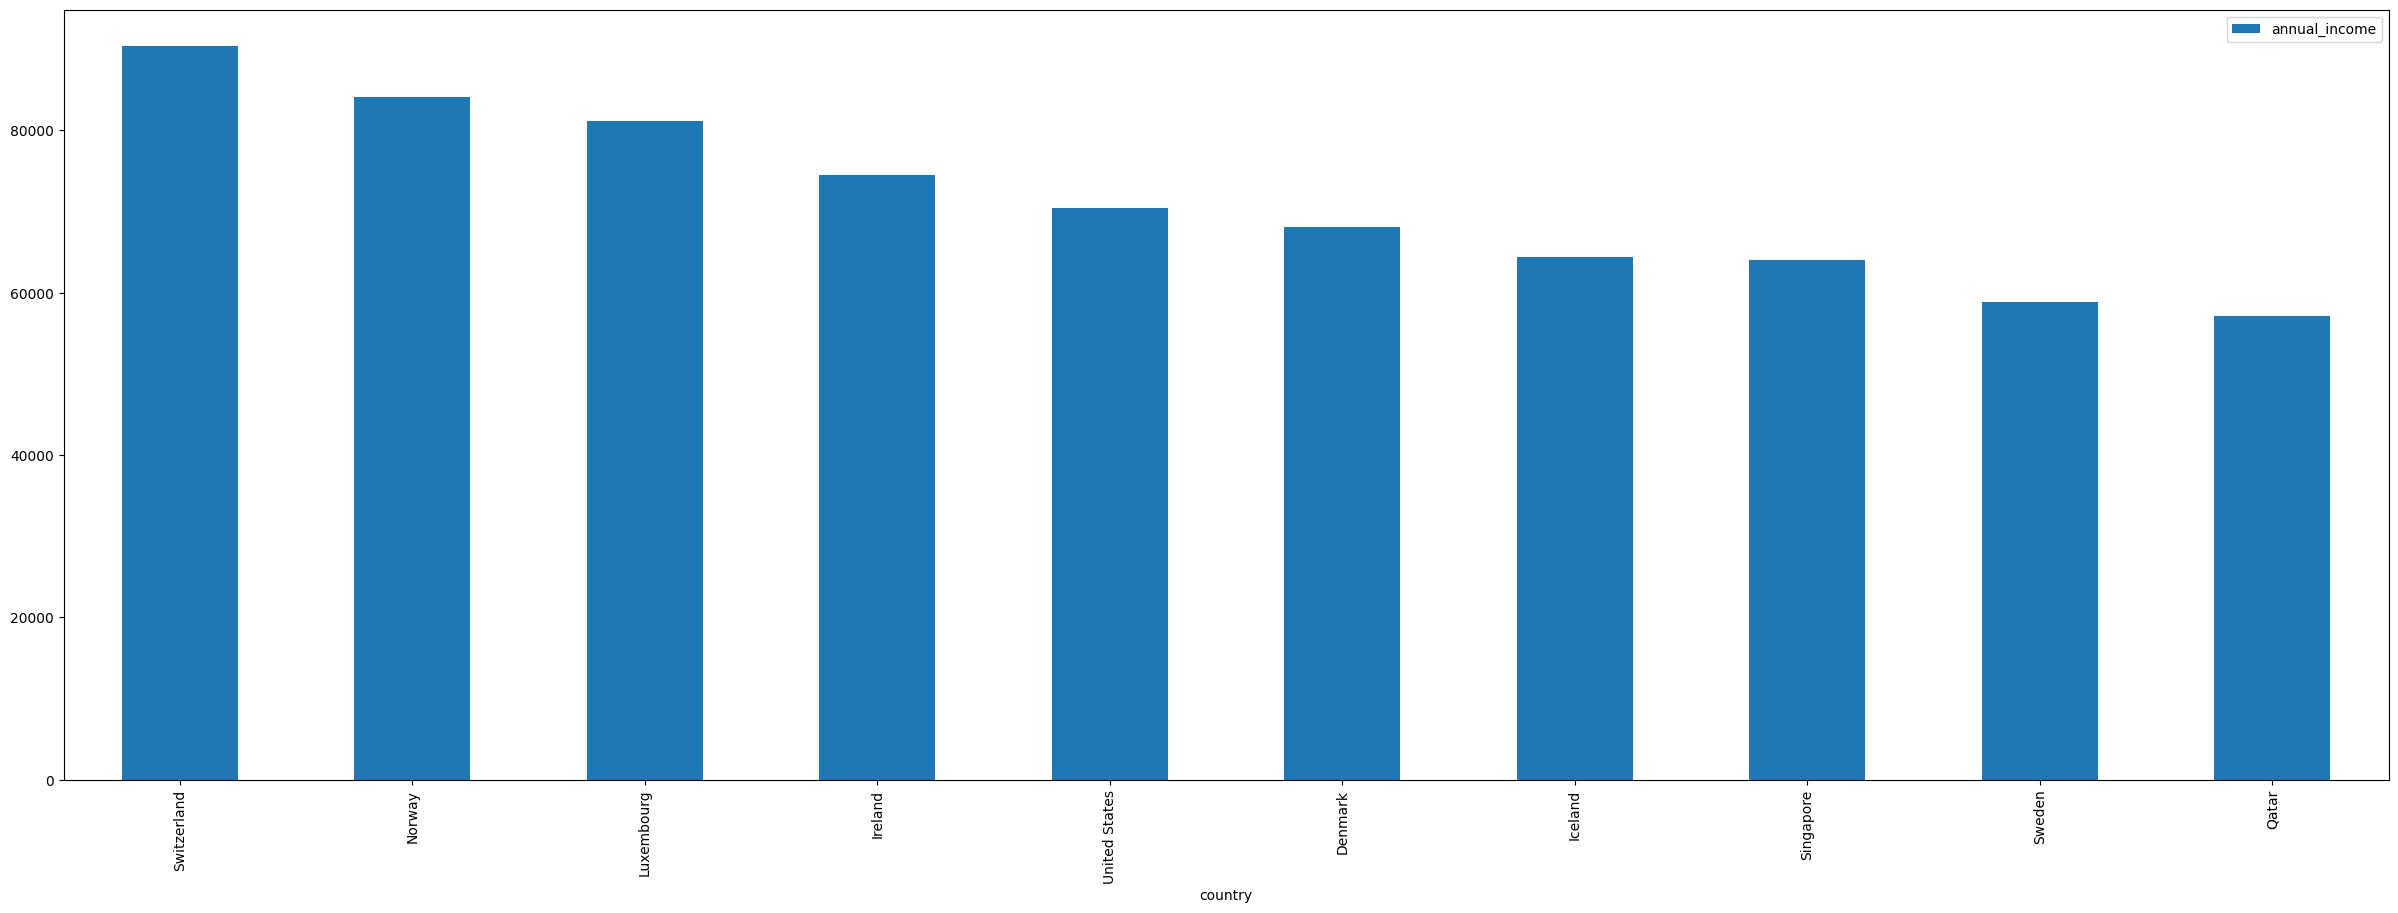

In [16]:
df_corruption_3.plot( x='country',y='annual_income',kind='bar', figsize=(30,10))

In [17]:
#Vamos a comprobar los 10 países con menores ingresos anuales y lo representamos.
df_corruption_4=df_corruption_2.nsmallest(10,'annual_income')
df_corruption_4

,country,annual_income,corruption_index
99,Burundi,240,81
107,Somalia,450,87
109,South Sudan,460,89
79,Mozambique,480,74
104,Afghanistan,500,84
78,Madagascar,500,74
46,Sierra Leone,510,66
84,Central Africa,530,76
100,Congo (Dem. Republic),580,81
56,Niger,590,69


<AxesSubplot:xlabel='country'>

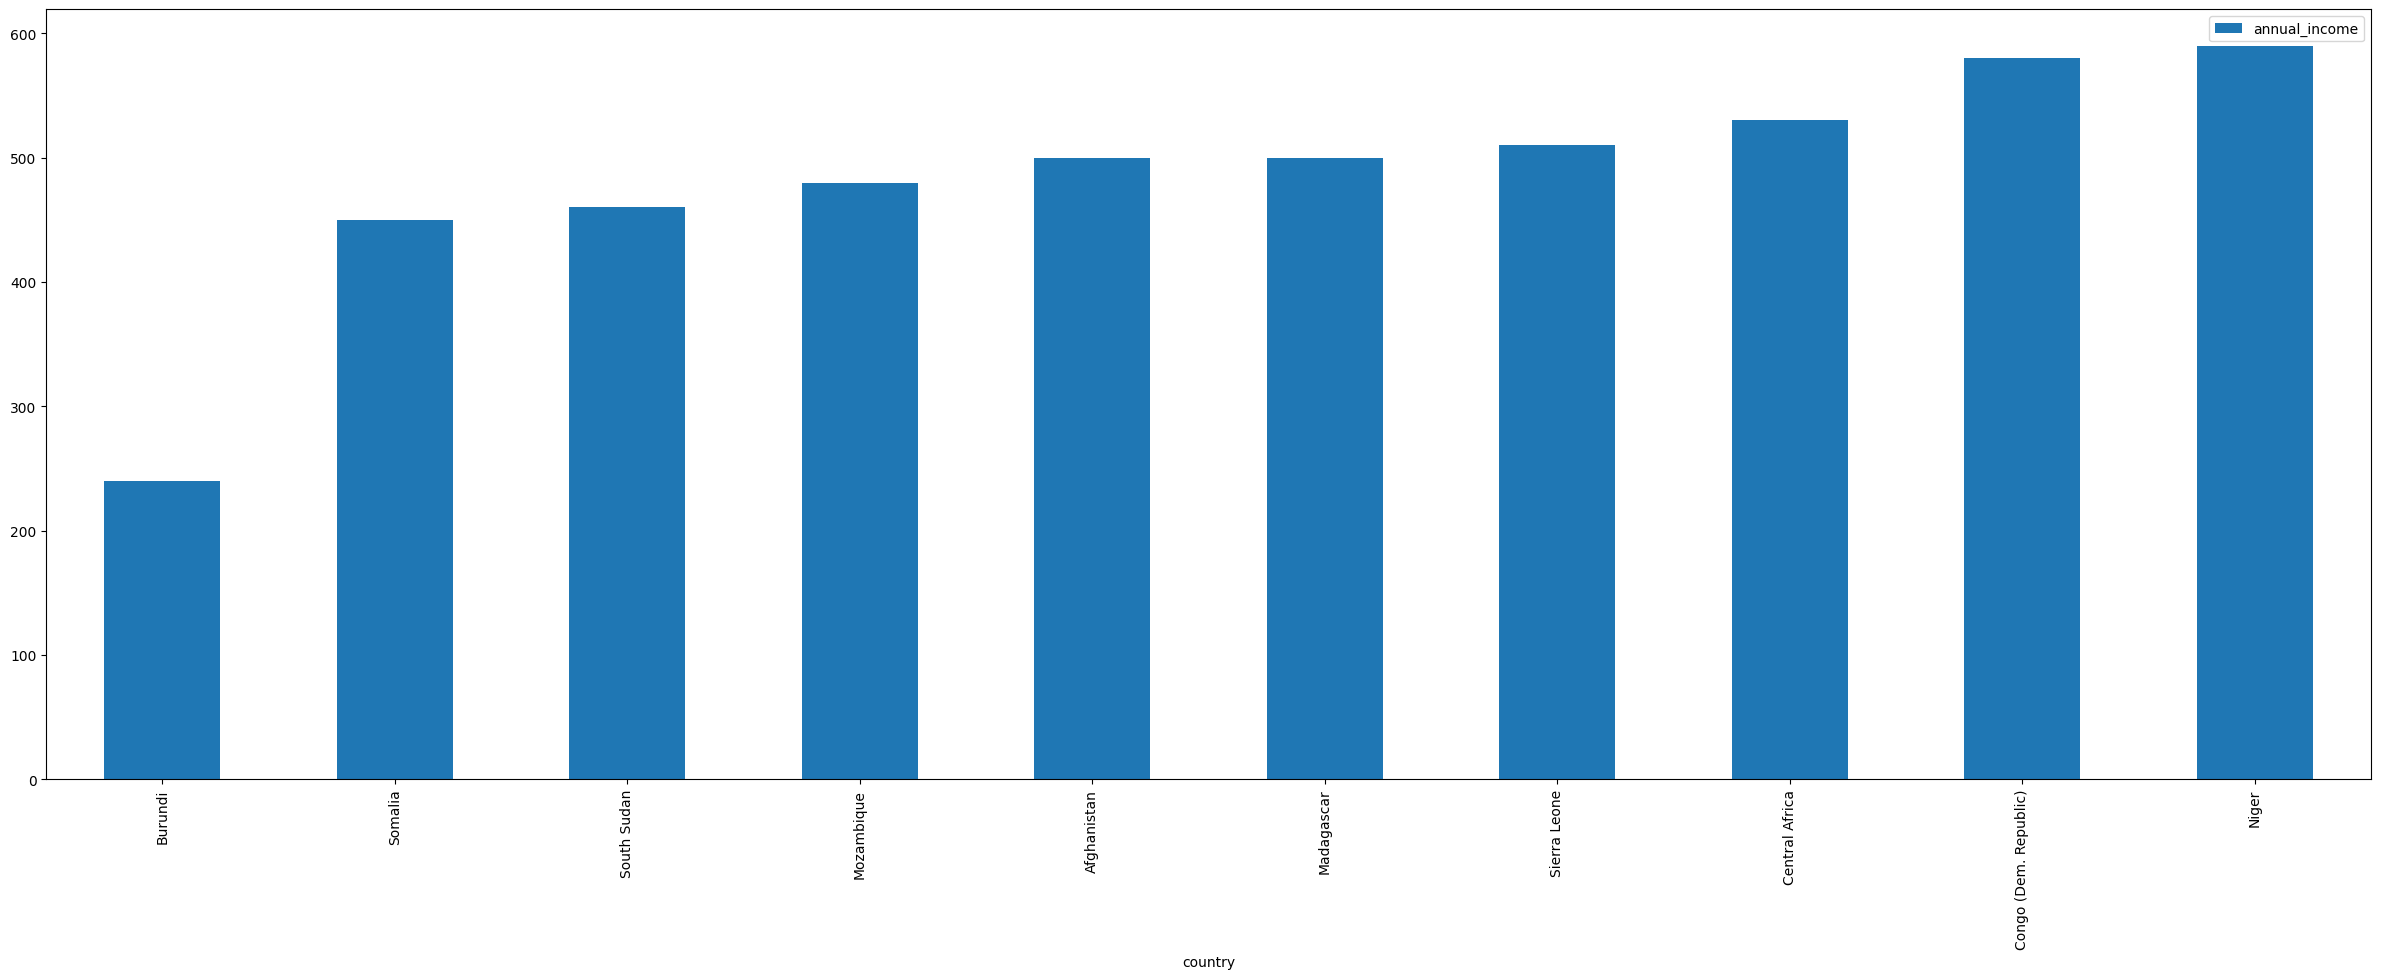

In [18]:
df_corruption_4.plot(x='country',y='annual_income', kind='bar', figsize=(30,10))

<AxesSubplot:xlabel='country'>

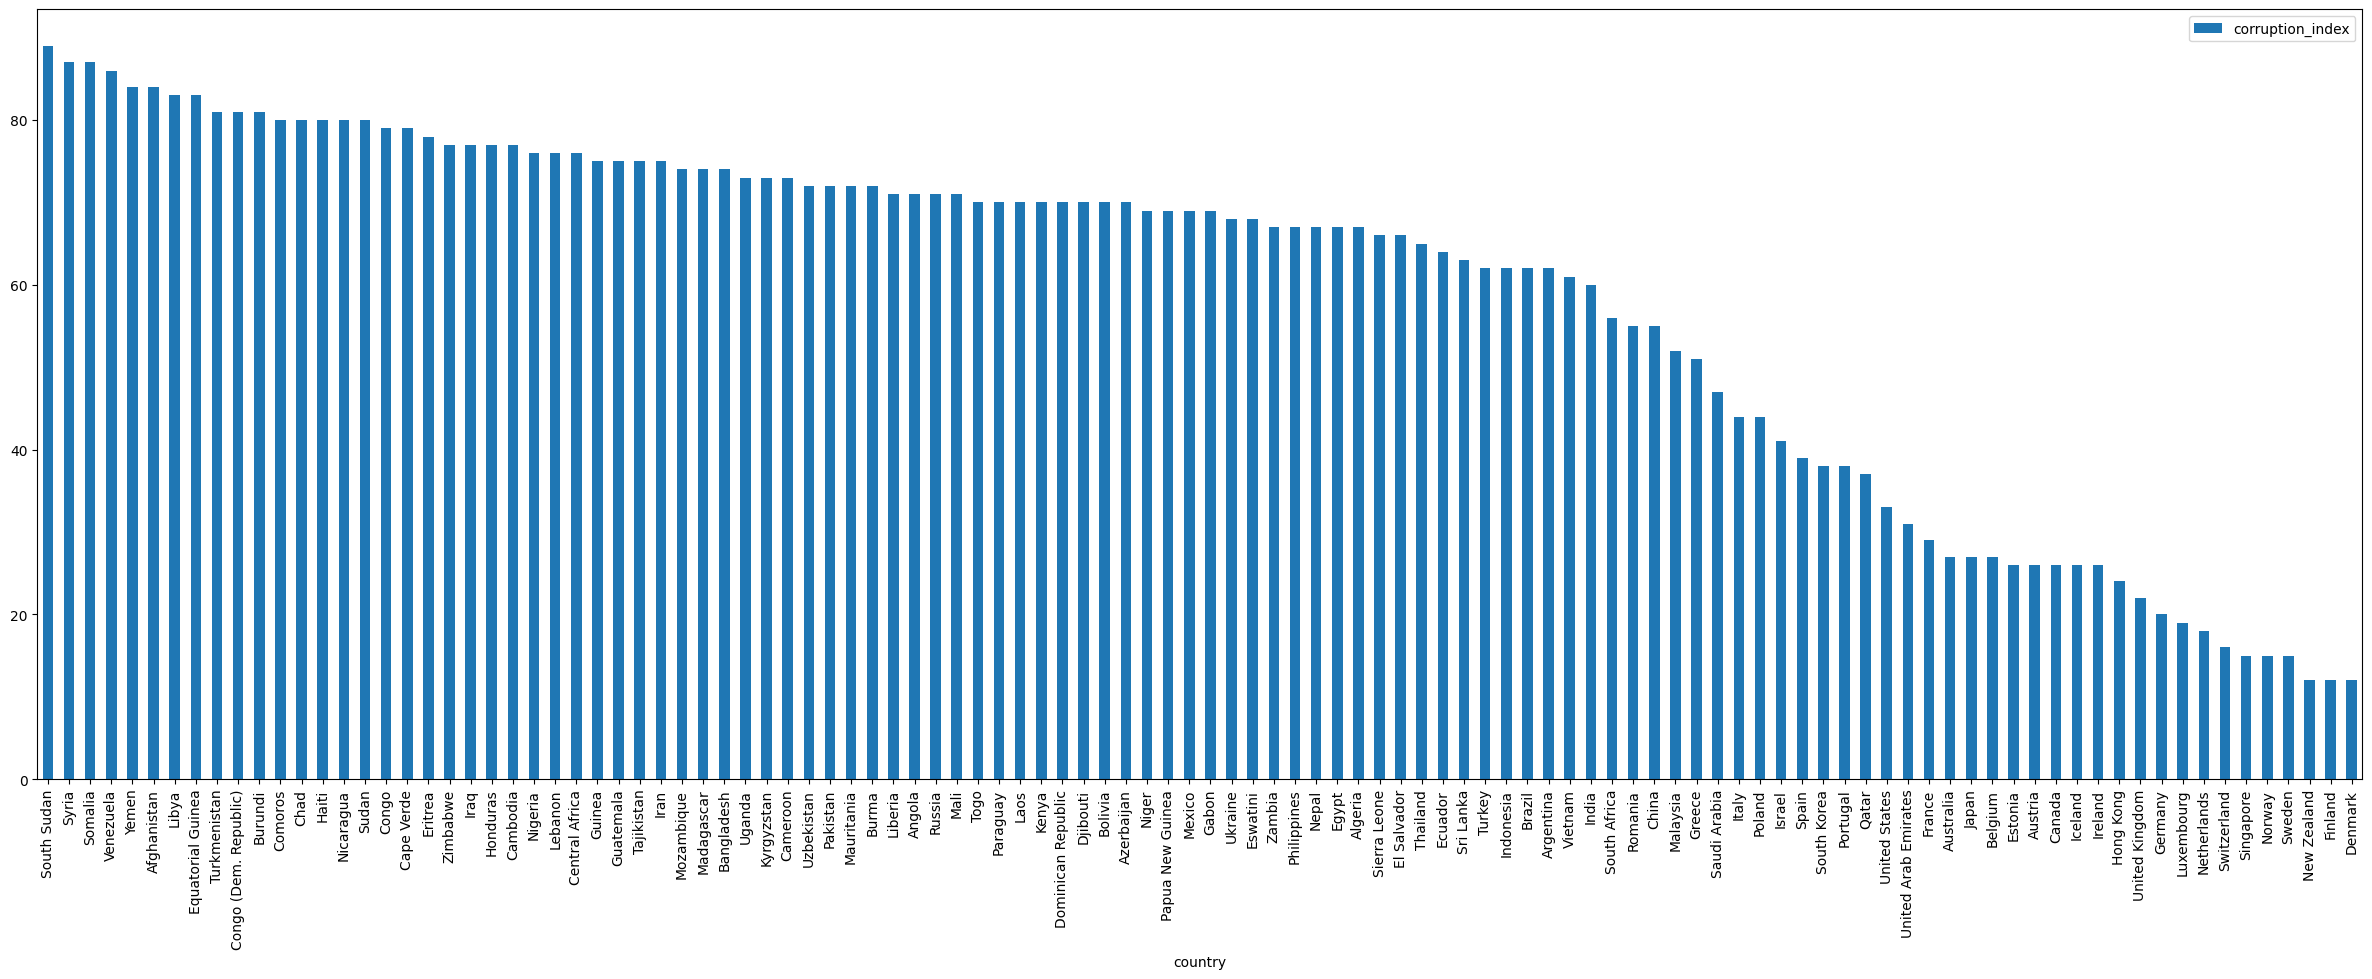

In [19]:
#Vamos a representar el índice de corrupción por país.
#Vemos cómo prácticamente se invierte la forma con respecto al anterior.Lo que nos lleva a pensar que está relacionado que un país
#tenga un índice de corrupción bajo con ingresos anuales más altos y viceversa.

df_corruption_2=df_corruption.sort_values(by='corruption_index',ascending=False)
df_corruption_2.plot( x='country',y='corruption_index', kind='bar',figsize=(30,10))

In [20]:
#Vamos a comprobar los 10 países con mayores índices de corrupción y lo representamos.
df_corruption_5=df_corruption_2.nlargest(10,'corruption_index')
df_corruption_5

,country,annual_income,corruption_index
109,South Sudan,460,89
108,Syria,1170,87
107,Somalia,450,87
106,Venezuela,13080,86
105,Yemen,670,84
104,Afghanistan,500,84
103,Libya,8430,83
102,Equatorial Guinea,5810,83
101,Turkmenistan,7220,81
100,Congo (Dem. Republic),580,81


<AxesSubplot:xlabel='country'>

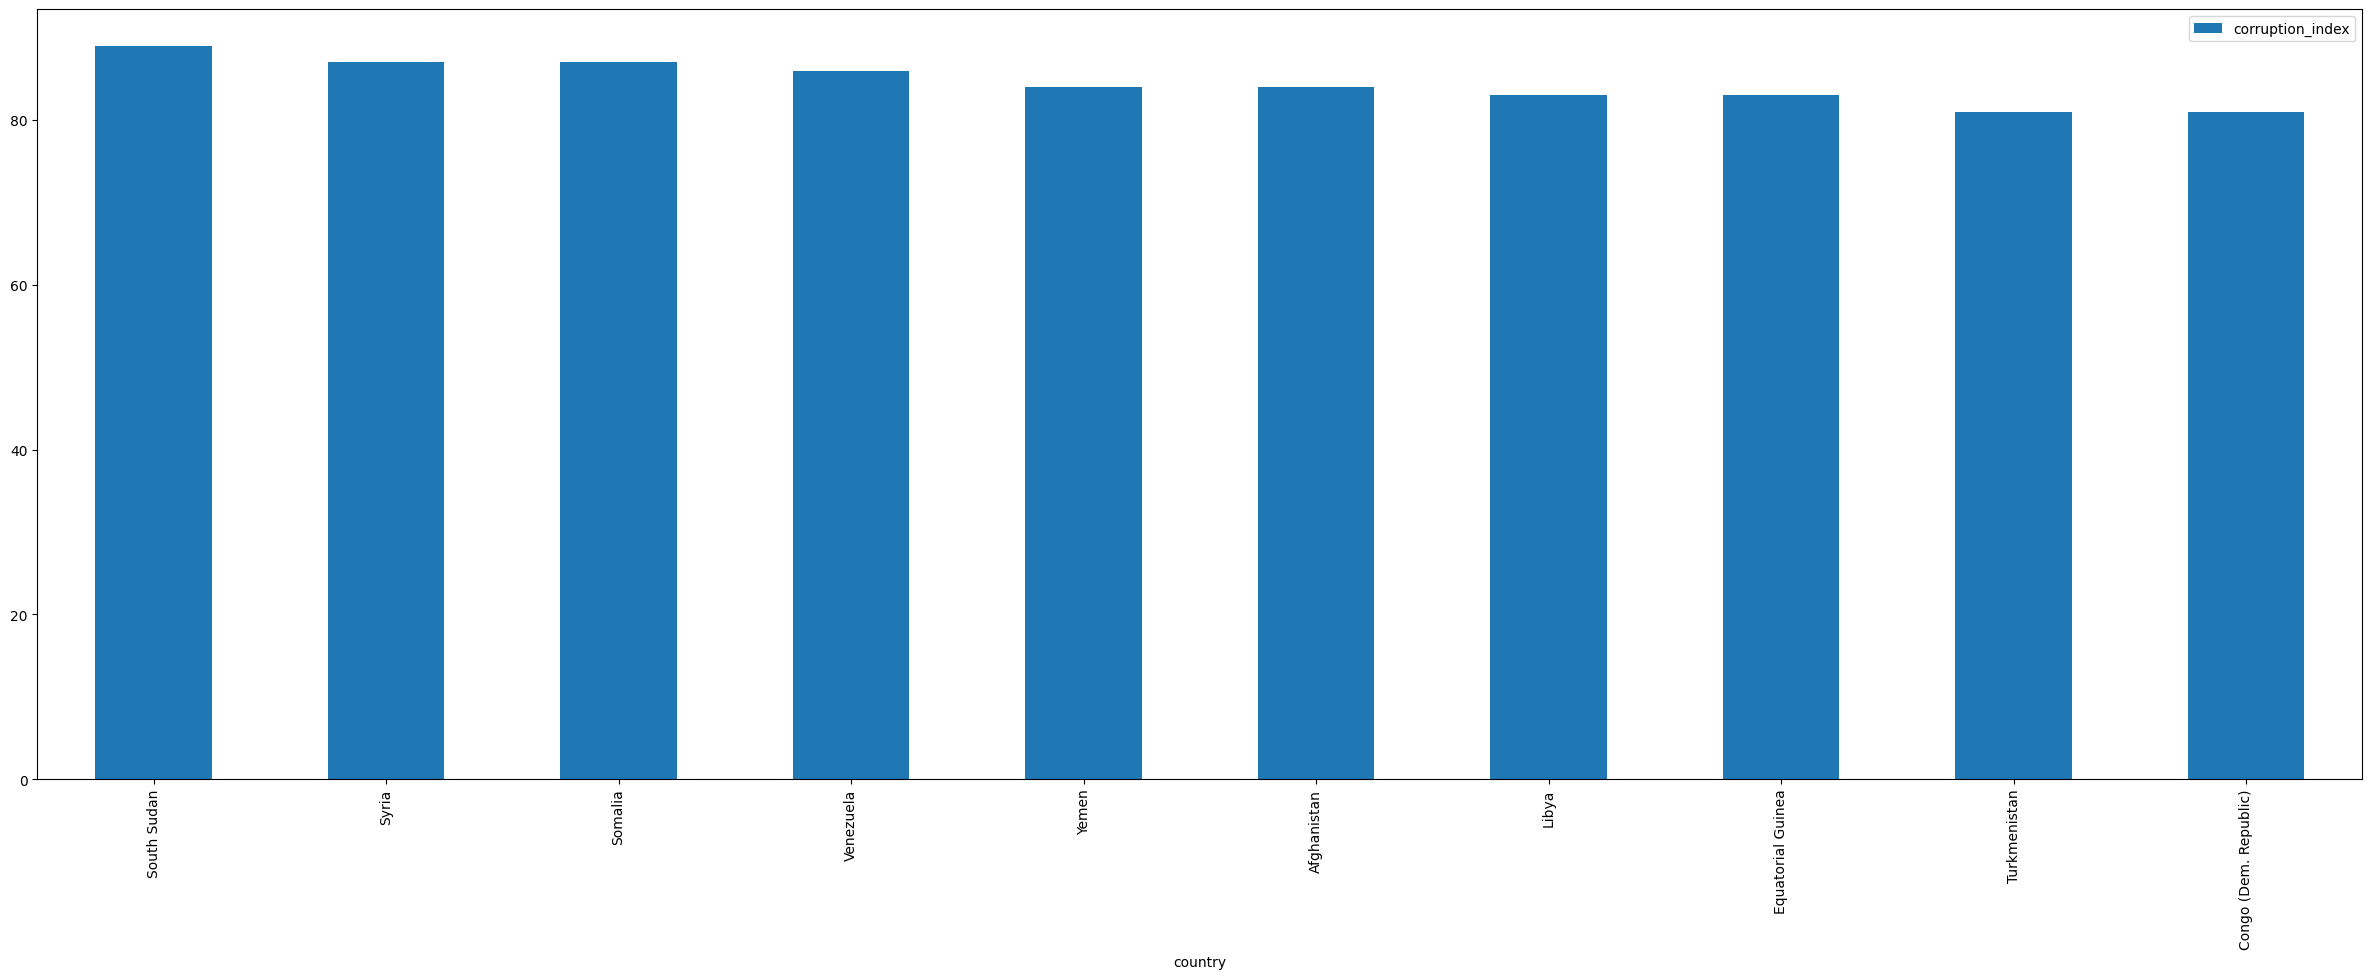

In [21]:
df_corruption_5.plot( x='country',y='corruption_index', kind='bar',figsize=(30,10))

In [22]:
#Vamos a comprobar los 10 países con menores índices de corrupción y lo representamos.
df_corruption_6=df_corruption_2.nsmallest(10,'corruption_index')
df_corruption_6

,country,annual_income,corruption_index
2,New Zealand,45340,12
1,Finland,53660,12
0,Denmark,68110,12
4,Singapore,64010,15
3,Norway,84090,15
5,Sweden,58890,15
6,Switzerland,90360,16
7,Netherlands,56370,18
8,Luxembourg,81110,19
9,Germany,51040,20


<AxesSubplot:xlabel='country'>

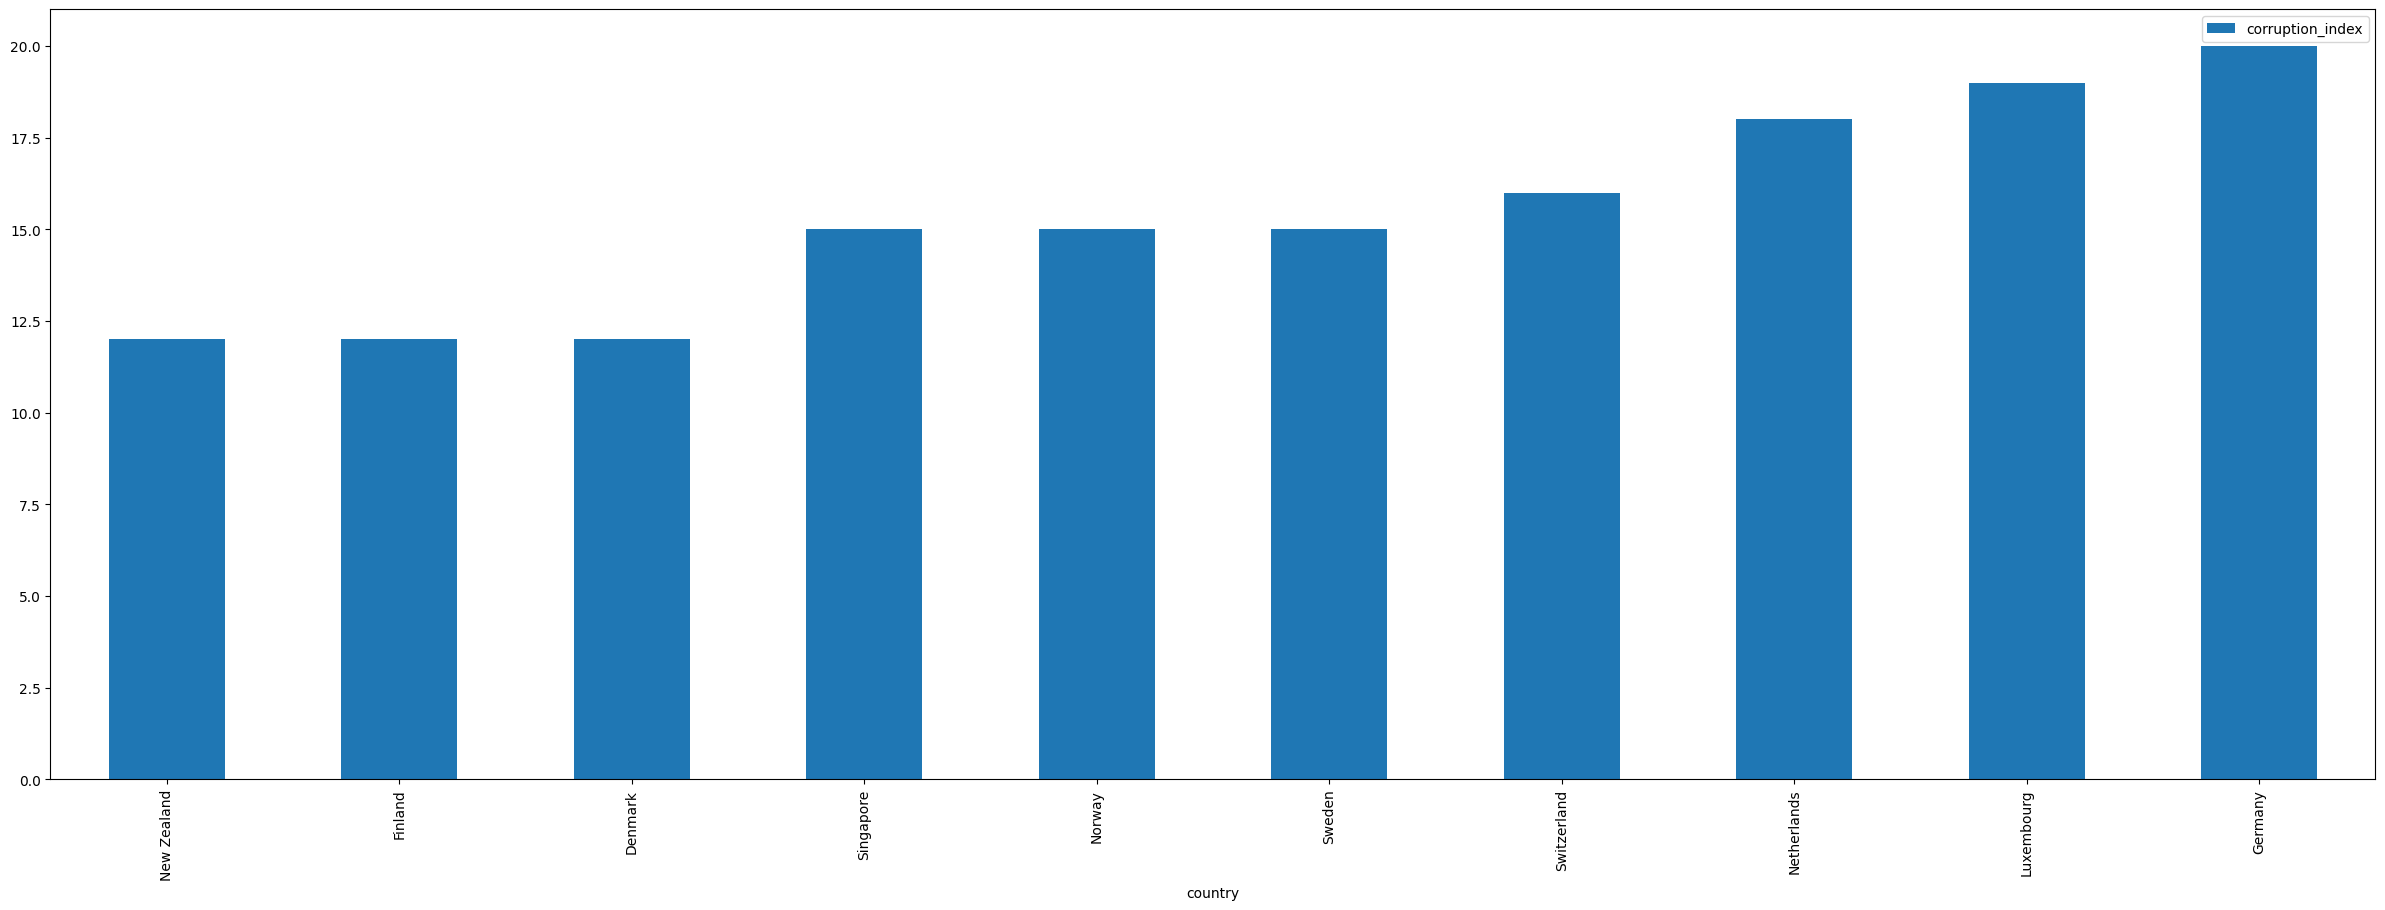

In [23]:
df_corruption_2=df_corruption.sort_values(by='corruption_index',ascending=False)
df_corruption_6.plot( x='country',y='corruption_index', kind='bar',figsize=(30,10))

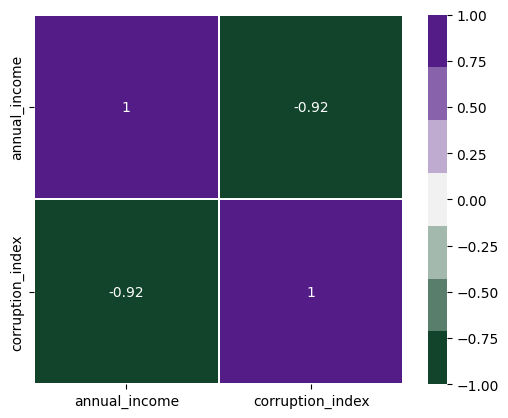

In [25]:
#Queremos demostrar la correlación entre ingresos anuales e índice de criminalidad:existe una correlación negativa casi perfecta,es decir,las dos variables
#están asociadas en sentido inverso.A mayor número de ingresos menor índice de corrupción y viceversa.

sns.heatmap(df_corruption.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.3,
            annot=True)
plt.show();

**2. COSTE DE LA VIDA**

In [26]:
#COSTO DE LA VIDA
#Analizaremos la siguiente variable ,el costo de la vida, atendiendo al índice de coste,los ingresos mensuales y el poder adquisitivo.

df_cost=pd.read_csv('data/cost_of_living.csv')
df_cost

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
...,...,...,...,...
102,Burma,27.0,95,6.0
103,Pakistan,25.8,125,8.3
104,Kyrgyzstan,25.3,98,6.6
105,Angola,23.0,148,10.9


In [27]:
df_cost.shape

(107, 4)

In [28]:
df_cost.head()

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5


In [29]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 107 non-null    object 
 1   cost_index              107 non-null    float64
 2   monthly_income          107 non-null    int64  
 3   purchasing_power_index  107 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.5+ KB


In [30]:
#Vamos a comprobar si hay o no valores nulos en nuestro dataset.
df_cost.isnull().any()

country                   False
cost_index                False
monthly_income            False
purchasing_power_index    False
dtype: bool

In [31]:
df_cost.describe()

,cost_index,monthly_income,purchasing_power_index
count,107.000000,107.000000,107.000000
mean,62.555140,1826.532710,38.150467
std,33.747716,2100.275033,30.588024
min,22.800000,87.000000,3.400000
25%,36.400000,295.000000,14.050000
50%,48.900000,782.000000,25.800000
75%,84.550000,3130.000000,59.100000
max,157.600000,9712.000000,121.100000


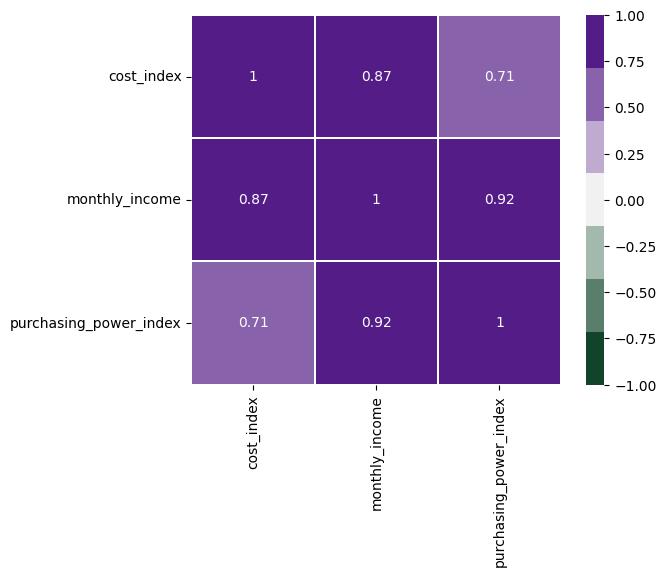

In [32]:
#Queremos comprobar la correlación que existe entre el índice de coste,los ingresos mensuales y el poder adquisitivo.
#Comprobamos que es una correlación positiva,las variables estarían asociadas de forma directa.
#Se aprecia cómo los ingresos mensuales con el índice de poder de compra poseen una correlación positiva casi perfecta.
#También los ingresos mensuales con el índice de coste están fuertemente correlacionados.


sns.heatmap(df_cost.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.3,
            annot=True)
plt.show();

In [33]:
#En primer lugar vamos a analizar el coste de la vida en los 107 países.Posteriormente nos centraremos en los 10 primeros y los 10 últimos.

df_cost=df_cost.sort_values(by='cost_index',ascending=False)
df_cost

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
...,...,...,...,...
102,Burma,27.0,95,6.0
103,Pakistan,25.8,125,8.3
104,Kyrgyzstan,25.3,98,6.6
105,Angola,23.0,148,10.9


<AxesSubplot:xlabel='country'>

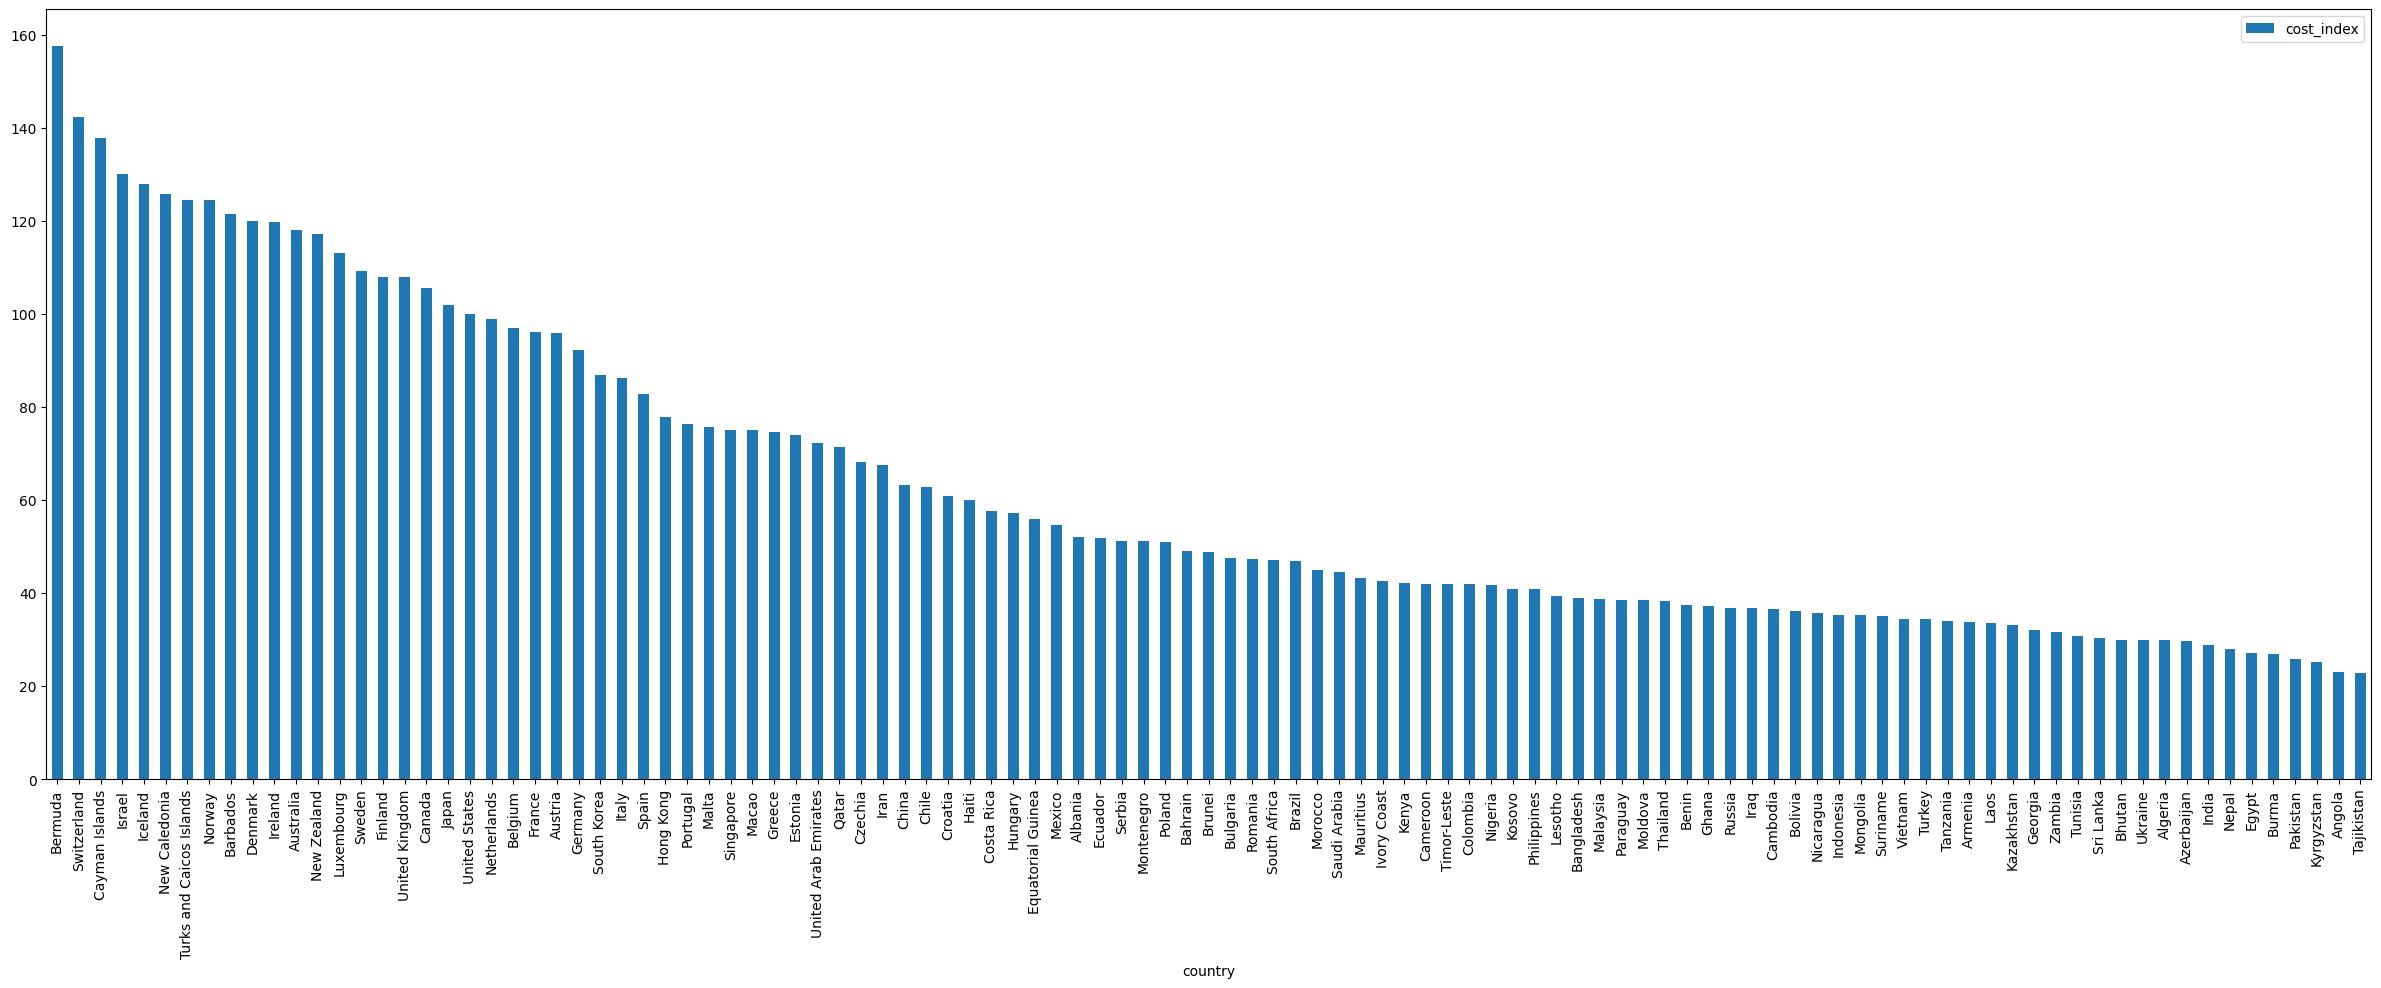

In [34]:
df_cost.plot( x='country',y='cost_index', kind='bar',figsize=(30,10))

In [35]:
df_cost_1=df_cost.nlargest(10,'cost_index')
df_cost_1

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
5,New Caledonia,125.8,1101,14.9
6,Turks and Caicos Islands,124.6,1967,26.9
7,Norway,124.6,7008,95.9
8,Barbados,121.5,1393,19.5
9,Denmark,119.9,5676,80.6


<AxesSubplot:xlabel='country'>

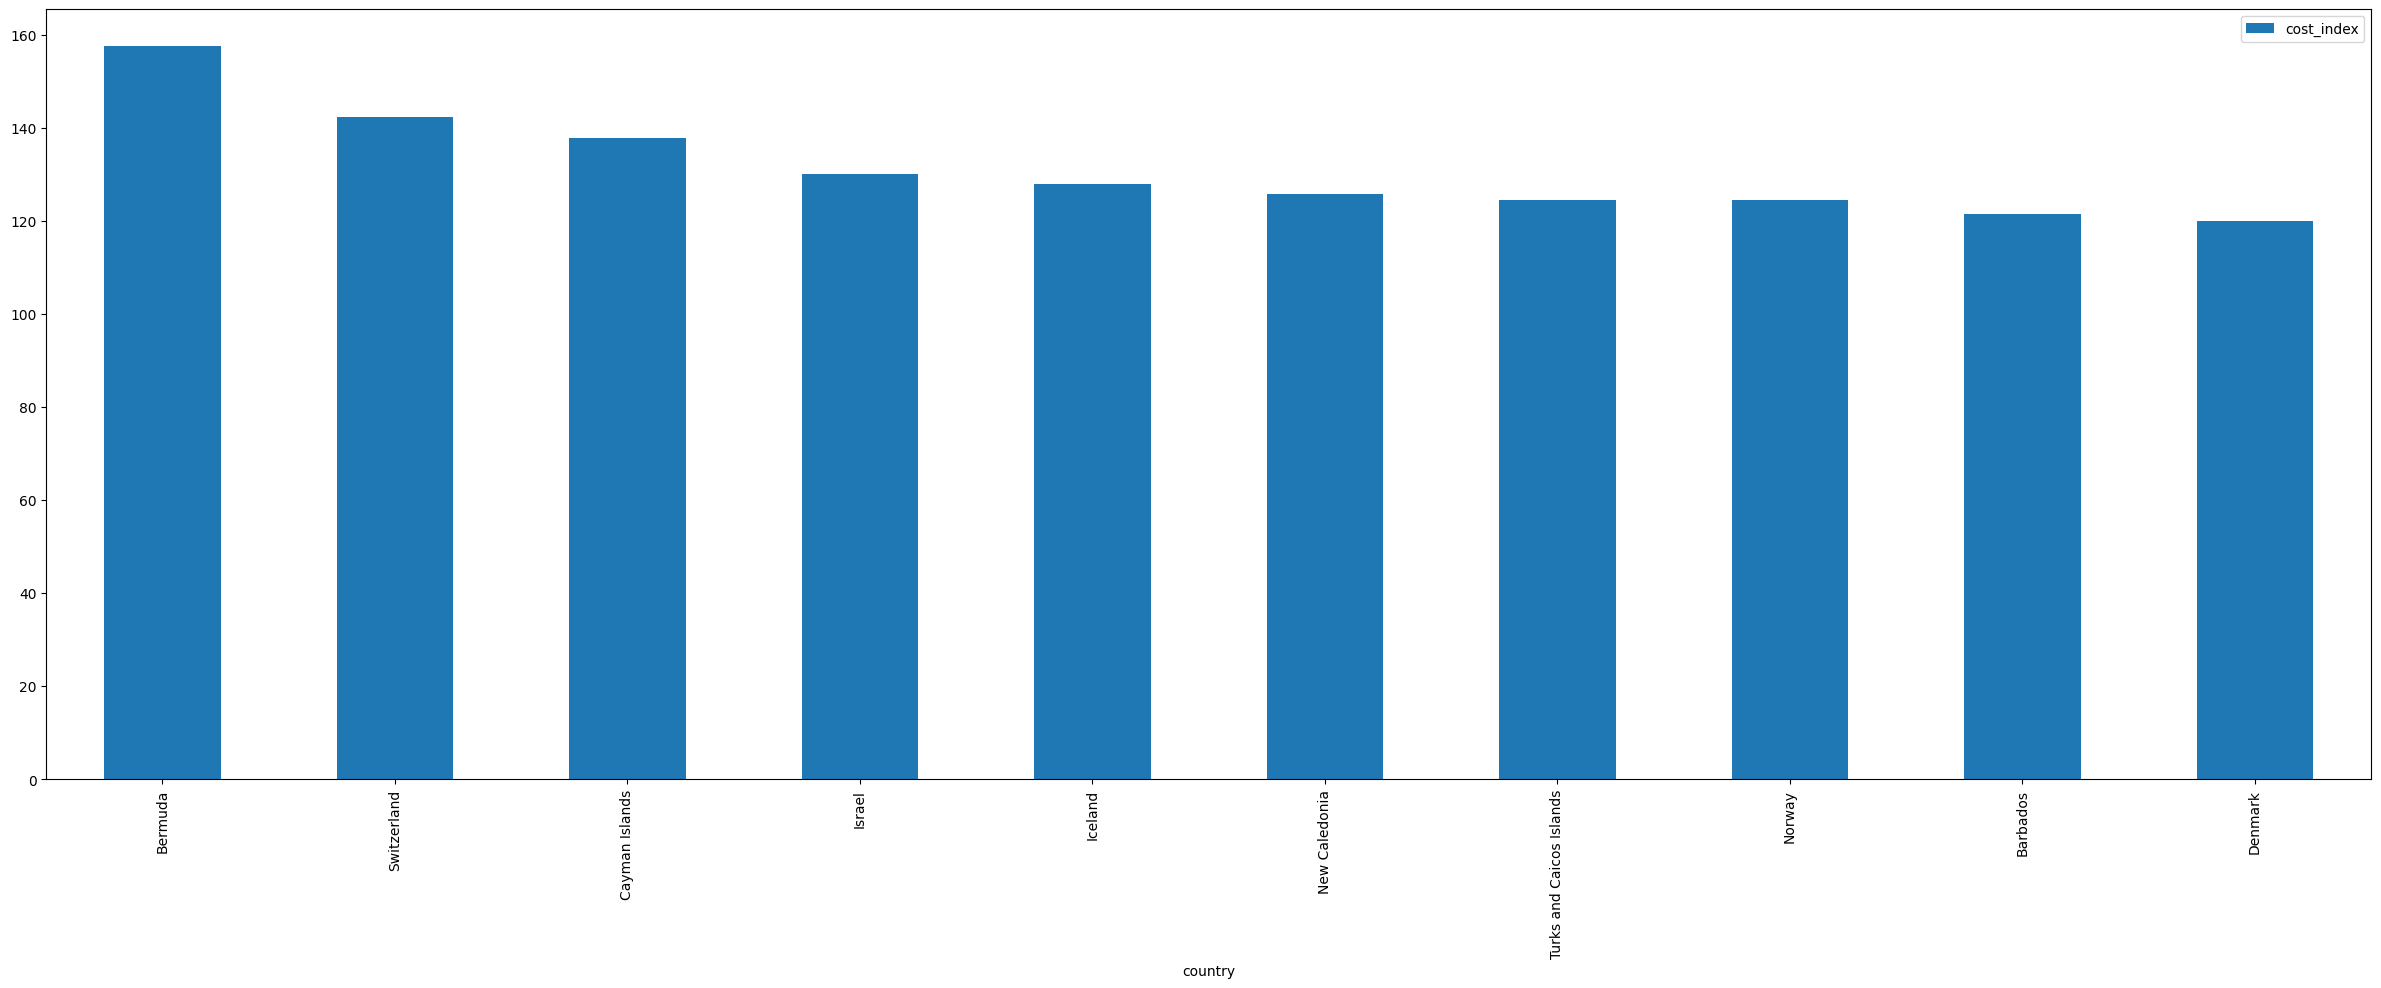

In [36]:
#Como comprobamos en el mapa de correlación anterior el costo de la vida está fuertemente relacionado con los sueldos mensuales,
#coincide ,en algunos casos, que los 10 primeros países con mayor coste de vida corresponden con aquellos 10 con rentas mensuales más altas
#Nota:La elevación del costo de vida en Israel es debido a la apreciación de su moneda,el séquel, frente al dólar.


df_cost_1.plot( x='country',y='cost_index', kind='bar',figsize=(30,10))

In [37]:
df_cost_2=df_cost.nsmallest(10,'cost_index')
df_cost_2

,country,cost_index,monthly_income,purchasing_power_index
106,Tajikistan,22.8,96,7.2
105,Angola,23.0,148,10.9
104,Kyrgyzstan,25.3,98,6.6
103,Pakistan,25.8,125,8.3
102,Burma,27.0,95,6.0
101,Egypt,27.2,293,18.3
100,Nepal,28.1,103,6.2
99,India,28.8,181,10.7
98,Azerbaijan,29.8,407,23.3
96,Ukraine,29.9,343,19.6


<AxesSubplot:xlabel='country'>

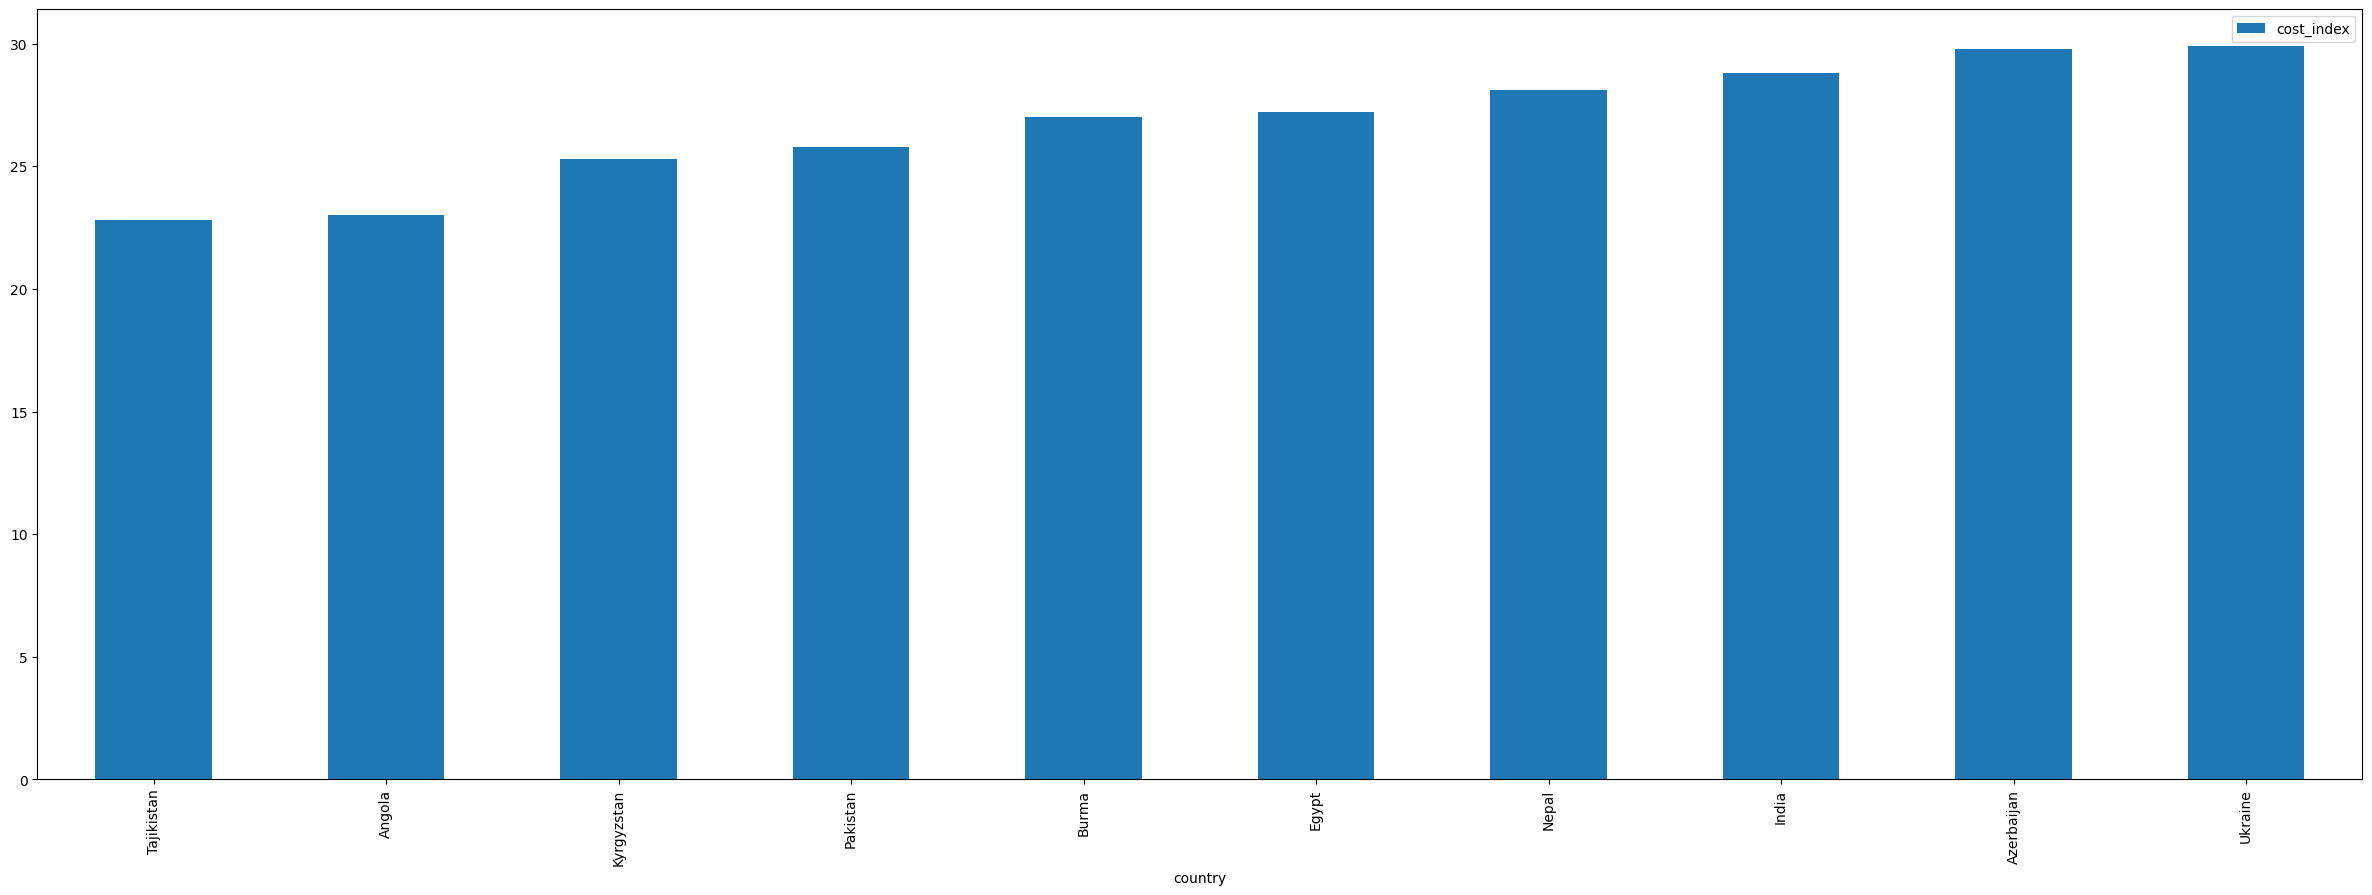

In [38]:
df_cost_2.plot( x='country',y='cost_index', kind='bar',figsize=(30,10))

In [39]:
#En segundo lugar vamos a analizar los ingresos mensuales en los 107 países.Posteriormente nos centraremos en los 10 primeros y los 10 últimos
df_cost=df_cost.sort_values(by='monthly_income',ascending=False)
df_cost

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
7,Norway,124.6,7008,95.9
13,Luxembourg,113.1,6759,101.8
10,Ireland,119.8,6210,88.3
...,...,...,...,...
104,Kyrgyzstan,25.3,98,6.6
106,Tajikistan,22.8,96,7.2
87,Tanzania,34.1,95,4.7
102,Burma,27.0,95,6.0


<AxesSubplot:xlabel='country'>

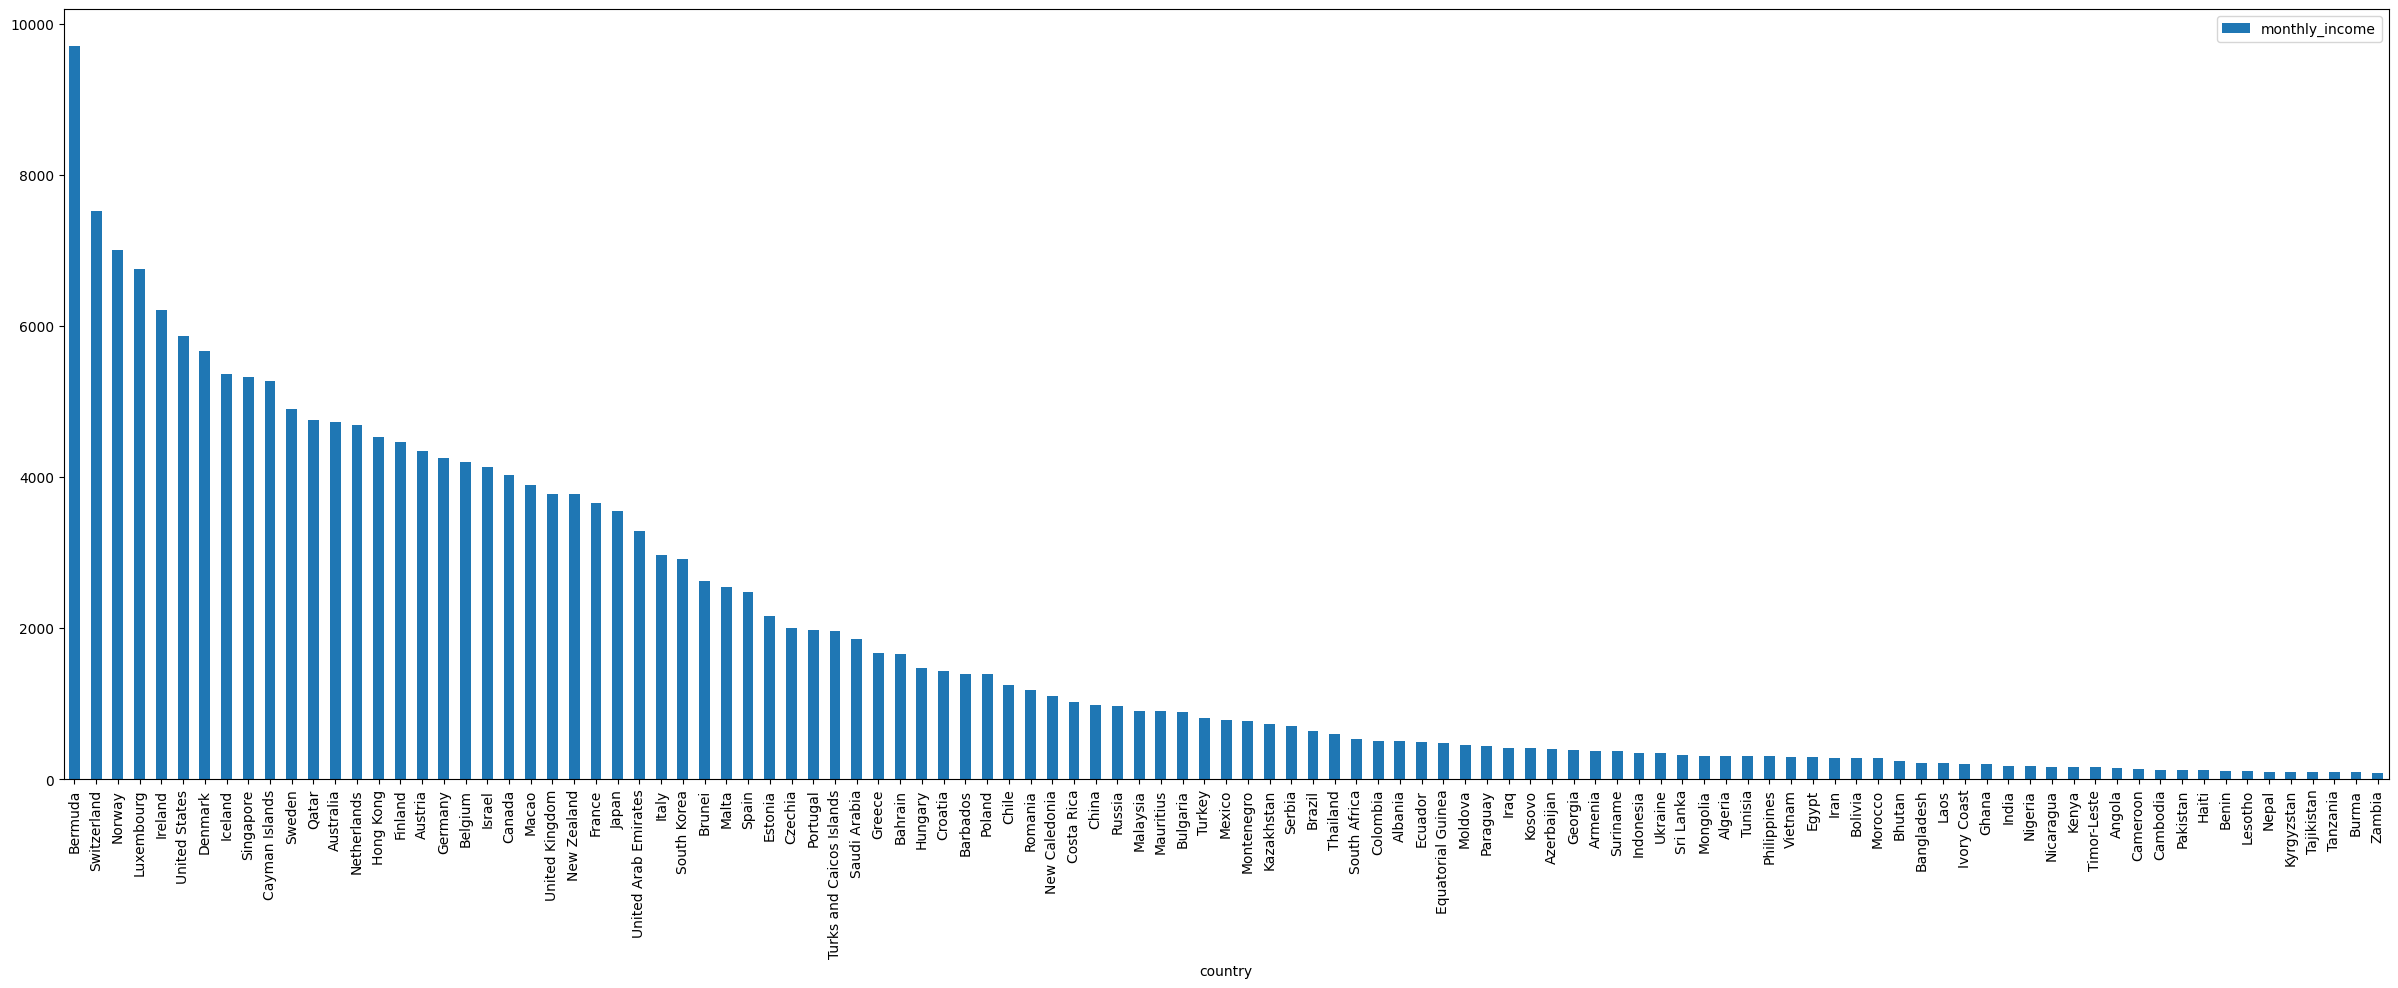

In [40]:
df_cost.plot( x='country',y='monthly_income', kind='bar',figsize=(30,10))
#España ocupa el puesto 32/107

In [41]:
#Vamos a comprobar los 10 países con mayores ingresos mensuales y lo representamos.
#Curiosidad:Los 10 primeros países pertenecen al hemisferio norte
#e incluye 2 colonias británicas consideradas paraísos fiscales.
df_cost_3=df_cost.nlargest(10,'monthly_income')
df_cost_3

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
7,Norway,124.6,7008,95.9
13,Luxembourg,113.1,6759,101.8
10,Ireland,119.8,6210,88.3
19,United States,100.0,5869,100.0
9,Denmark,119.9,5676,80.6
4,Iceland,128.0,5368,71.5
31,Singapore,75.0,5334,121.1
2,Cayman Islands,137.9,5281,65.2


<AxesSubplot:xlabel='country'>

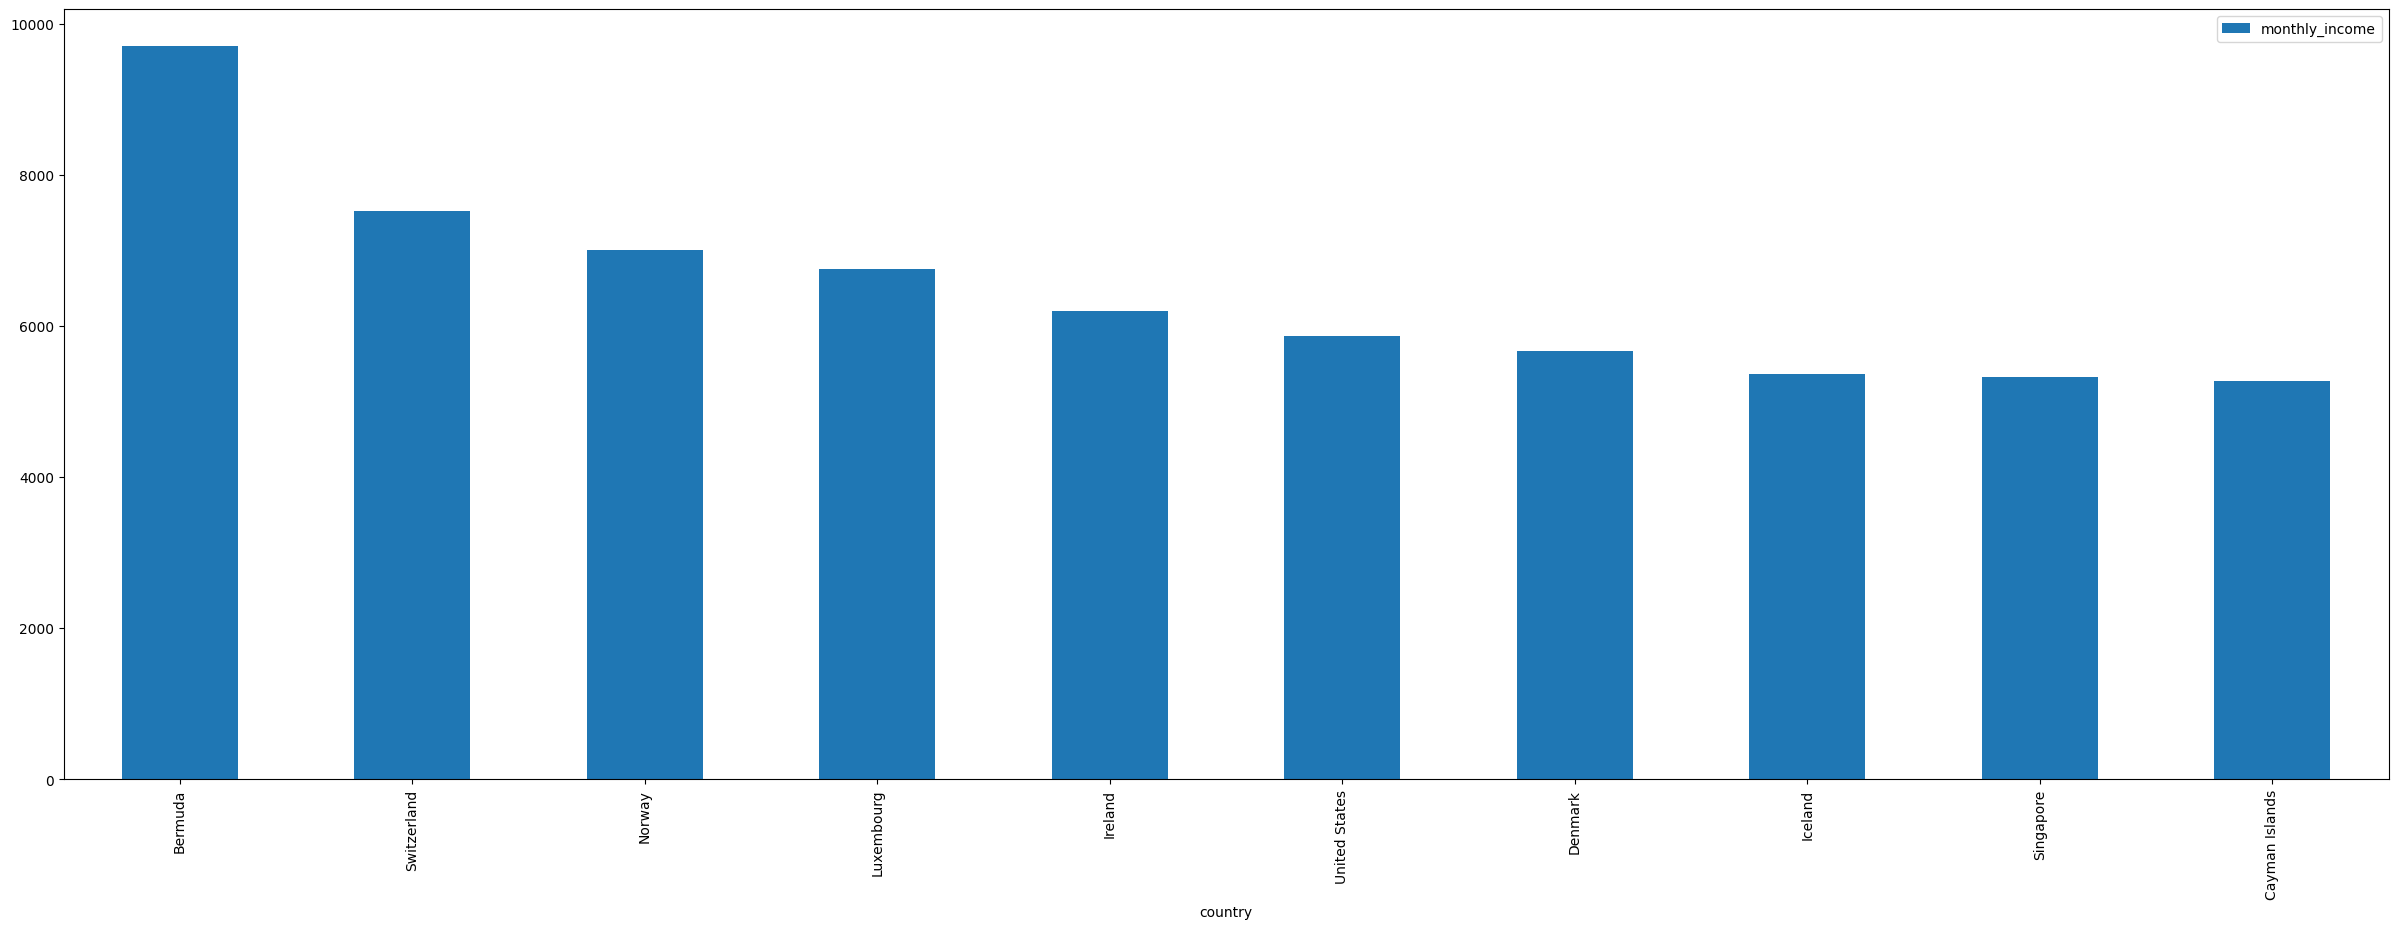

In [42]:
df_cost_3.plot( x='country',y='monthly_income', kind='bar',figsize=(30,10))

In [43]:
df_cost_4=df_cost.nsmallest(10,'monthly_income')
df_cost_4

,country,cost_index,monthly_income,purchasing_power_index
92,Zambia,31.7,87,4.7
87,Tanzania,34.1,95,4.7
102,Burma,27.0,95,6.0
106,Tajikistan,22.8,96,7.2
104,Kyrgyzstan,25.3,98,6.6
100,Nepal,28.1,103,6.2
69,Lesotho,39.3,106,4.6
75,Benin,37.5,114,5.2
42,Haiti,60.1,118,3.4
103,Pakistan,25.8,125,8.3


<AxesSubplot:xlabel='country'>

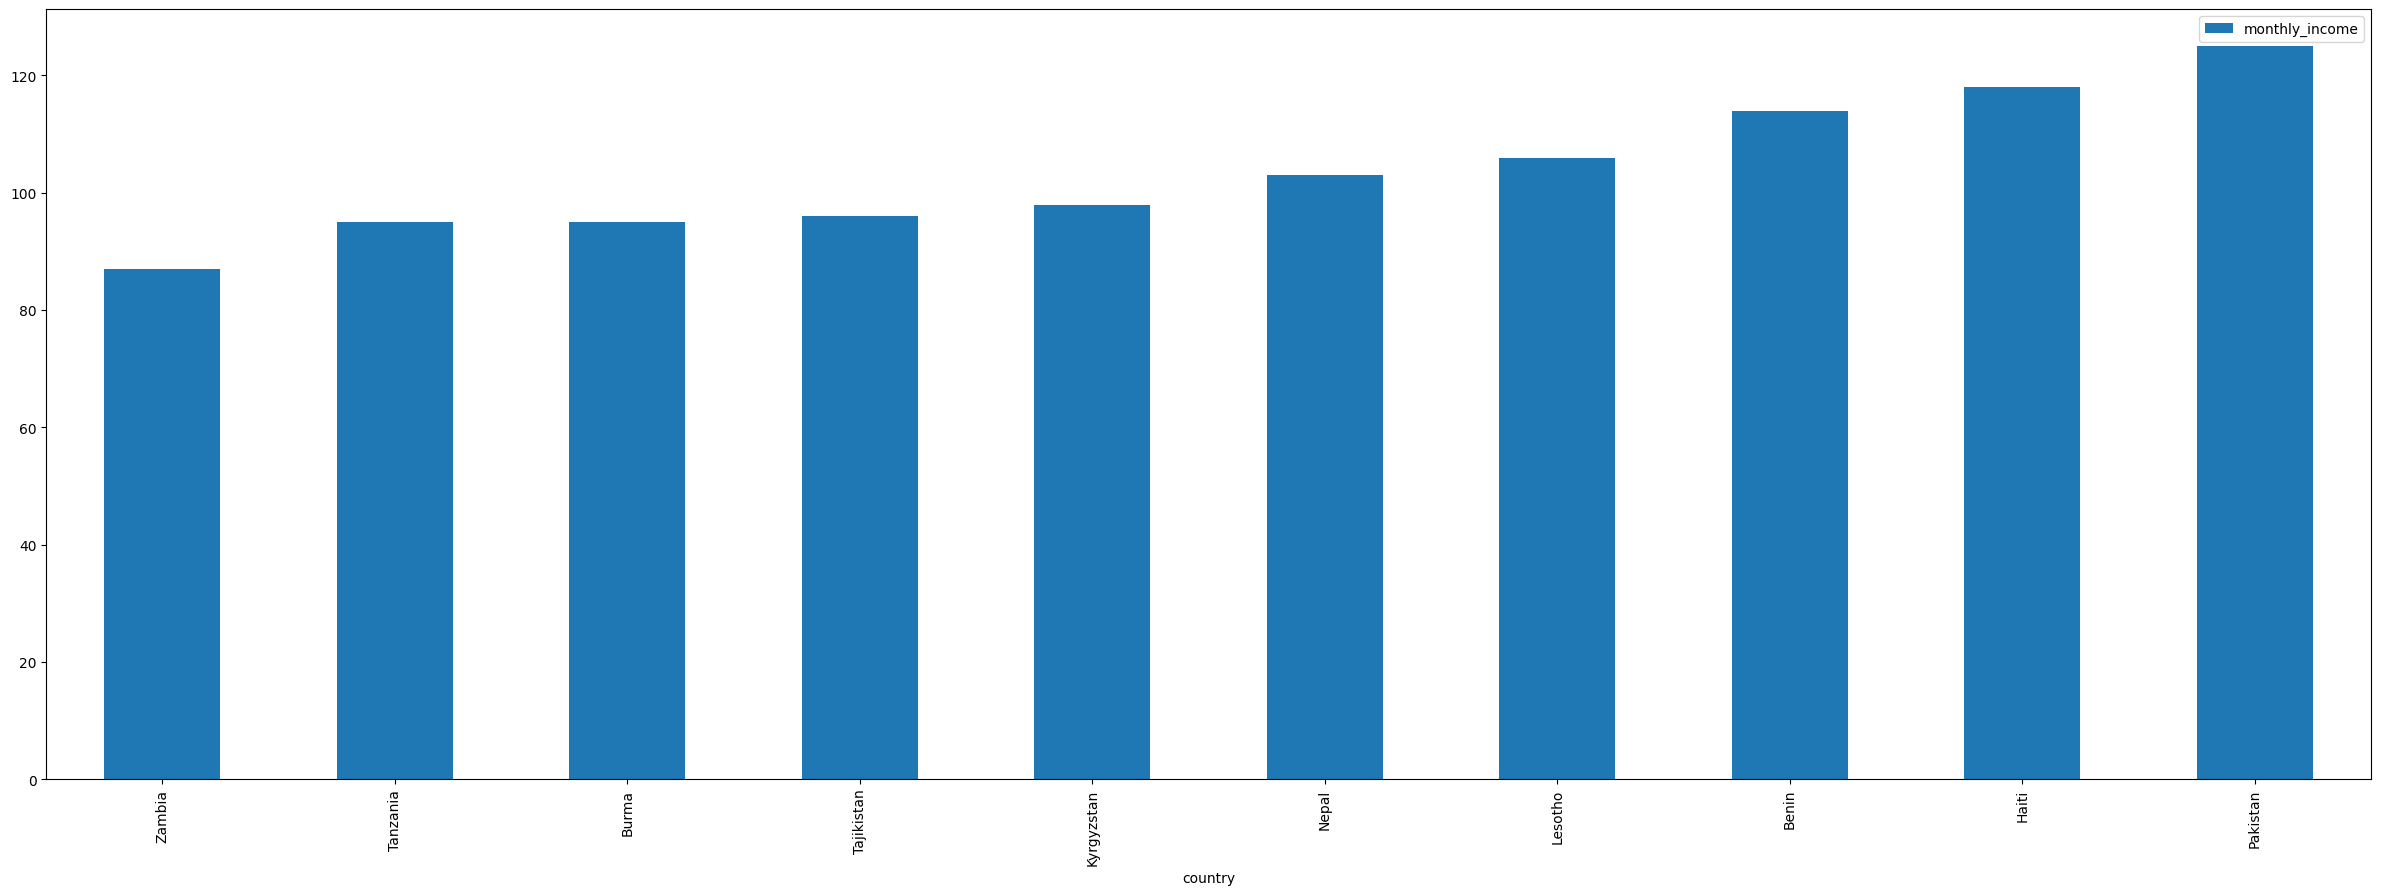

In [44]:
df_cost_4.plot( x='country',y='monthly_income', kind='bar',figsize=(30,10))

In [45]:
#En tercer lugar vamos a analizar el índice de poder de compra en los 107 países.Posteriormente nos centraremos en los 10 primeros y los 10 últimos
df_cost=df_cost.sort_values(by='purchasing_power_index',ascending=False)
df_cost

,country,cost_index,monthly_income,purchasing_power_index
31,Singapore,75.0,5334,121.1
36,Qatar,71.4,4760,113.6
0,Bermuda,157.6,9712,105.0
13,Luxembourg,113.1,6759,101.8
19,United States,100.0,5869,100.0
...,...,...,...,...
75,Benin,37.5,114,5.2
87,Tanzania,34.1,95,4.7
92,Zambia,31.7,87,4.7
69,Lesotho,39.3,106,4.6


<AxesSubplot:xlabel='country'>

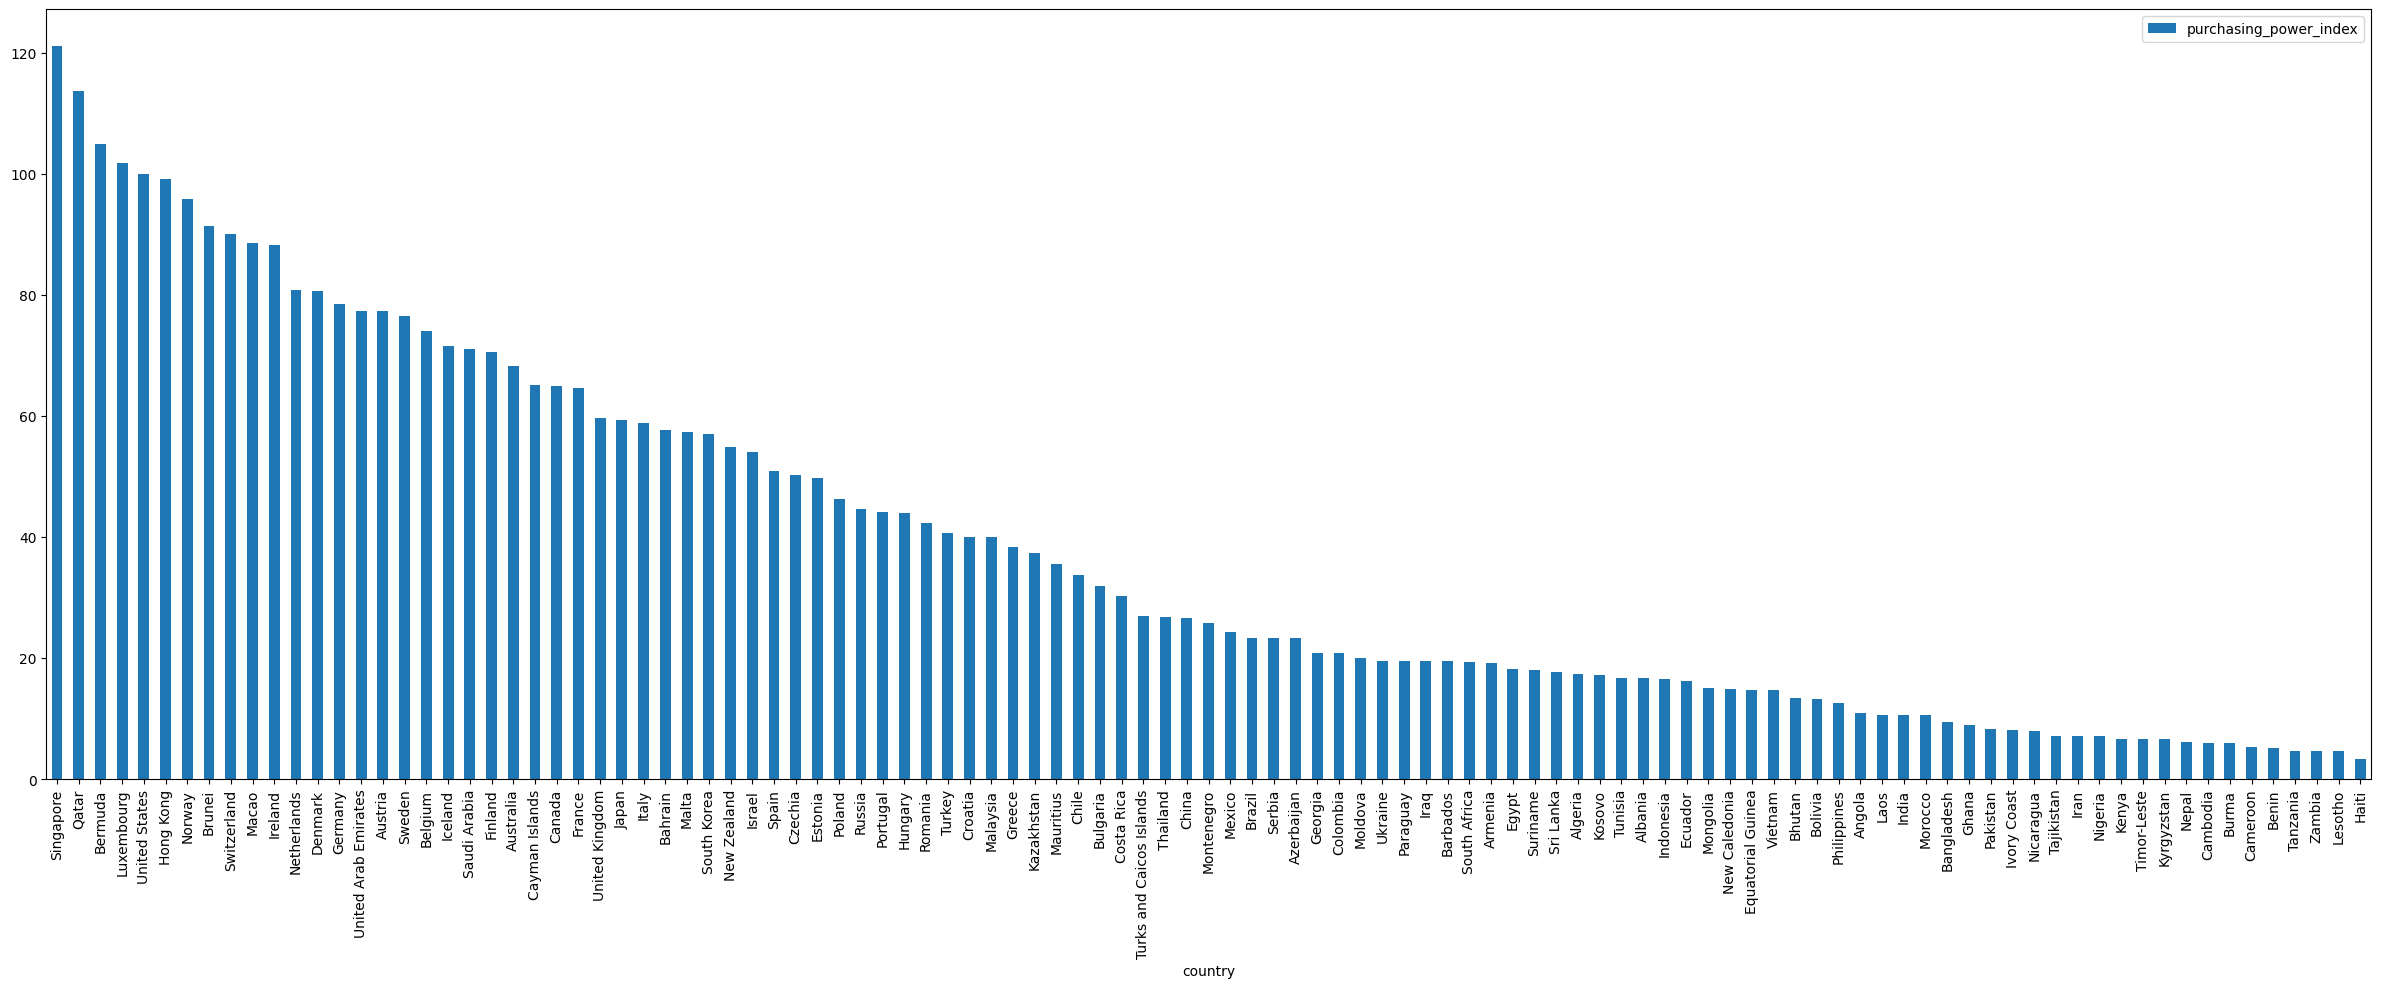

In [46]:
df_cost.plot( x='country',y='purchasing_power_index', kind='bar',figsize=(30,10))
#España ocupa el puesto 34/107

In [47]:
df_cost_5=df_cost.nlargest(10,'purchasing_power_index')
df_cost_5

,country,cost_index,monthly_income,purchasing_power_index
31,Singapore,75.0,5334,121.1
36,Qatar,71.4,4760,113.6
0,Bermuda,157.6,9712,105.0
13,Luxembourg,113.1,6759,101.8
19,United States,100.0,5869,100.0
28,Hong Kong,77.9,4538,99.2
7,Norway,124.6,7008,95.9
53,Brunei,48.9,2626,91.4
1,Switzerland,142.4,7530,90.1
32,Macao,75.0,3894,88.5


<AxesSubplot:xlabel='country'>

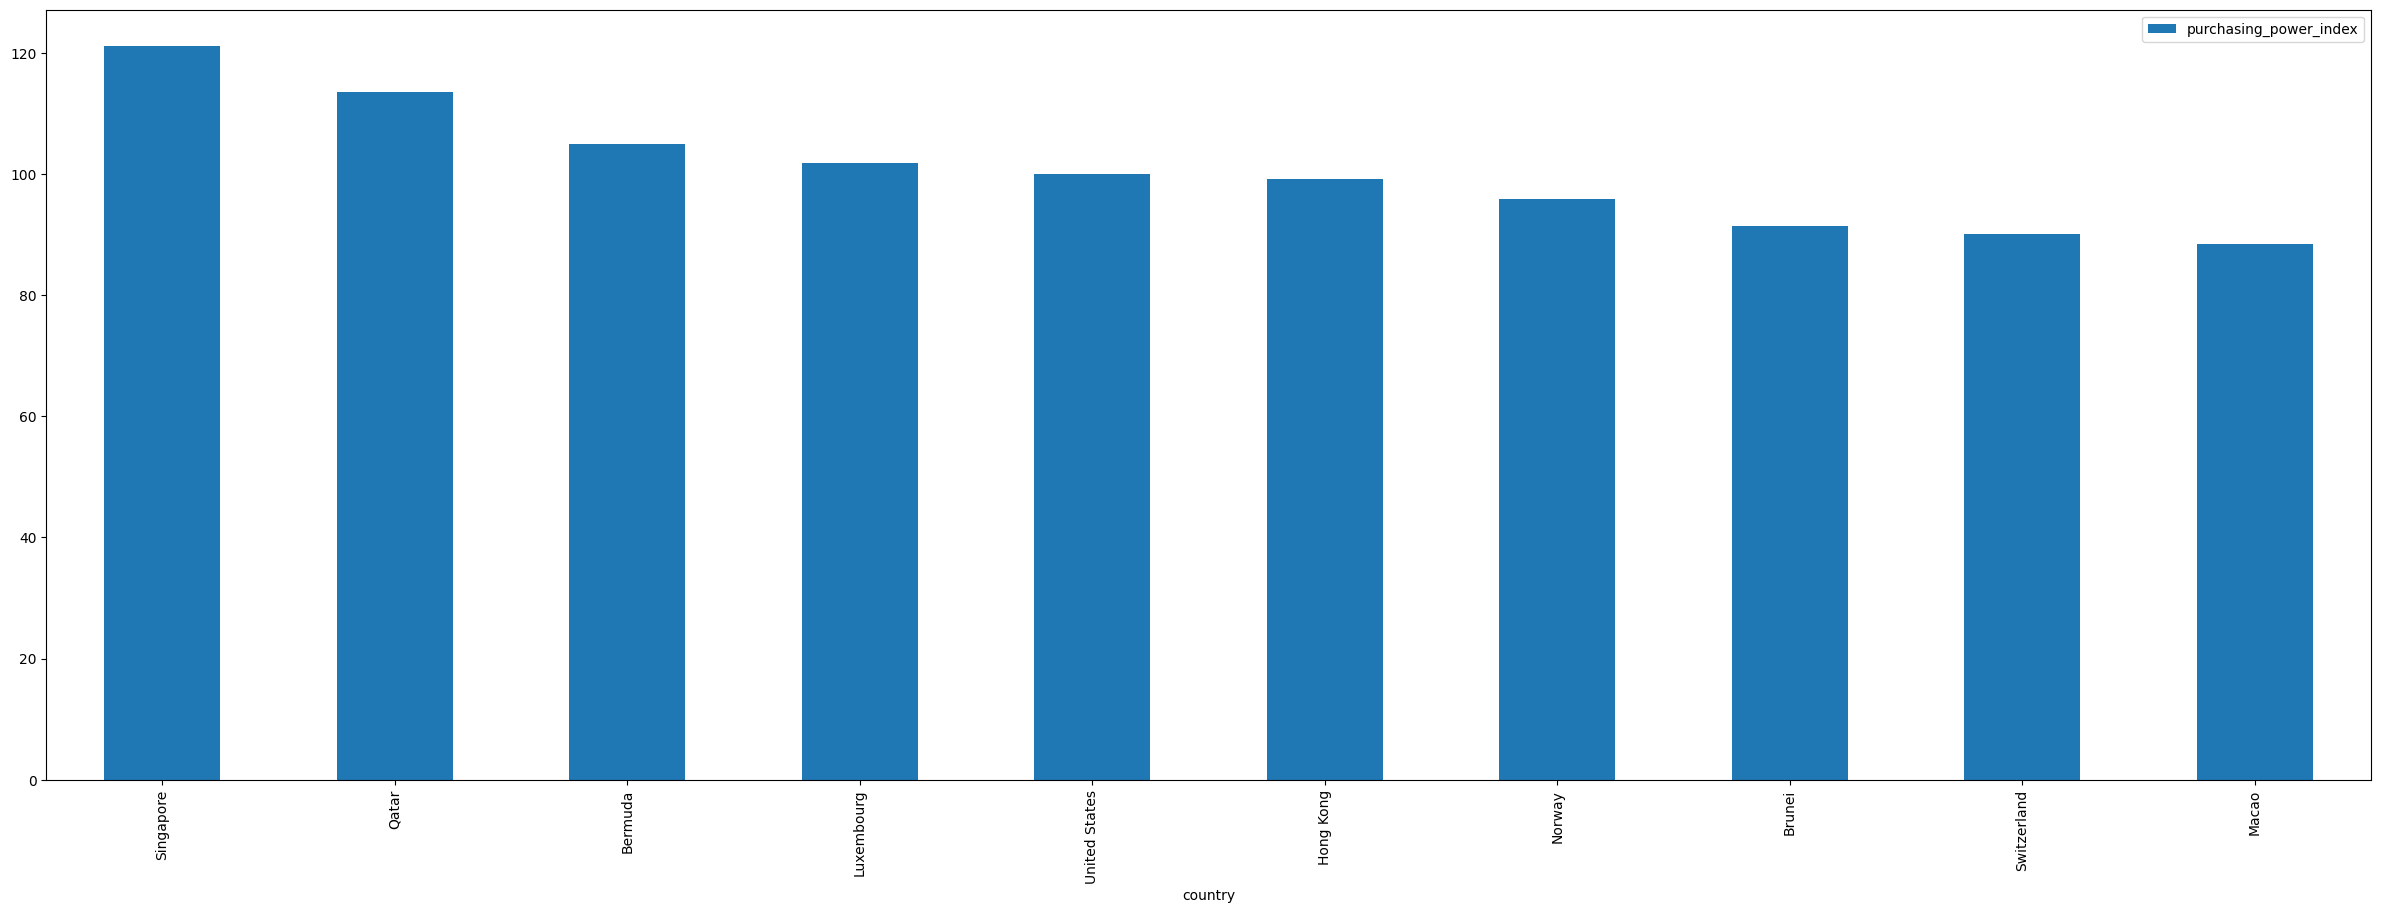

In [48]:
df_cost_5.plot( x='country',y='purchasing_power_index', kind='bar',figsize=(30,10))

In [49]:
df_cost_6=df_cost.nsmallest(10,'purchasing_power_index')
df_cost_6

,country,cost_index,monthly_income,purchasing_power_index
42,Haiti,60.1,118,3.4
69,Lesotho,39.3,106,4.6
87,Tanzania,34.1,95,4.7
92,Zambia,31.7,87,4.7
75,Benin,37.5,114,5.2
63,Cameroon,41.9,133,5.4
79,Cambodia,36.6,129,6.0
102,Burma,27.0,95,6.0
100,Nepal,28.1,103,6.2
64,Timor-Leste,41.9,162,6.6


<AxesSubplot:xlabel='country'>

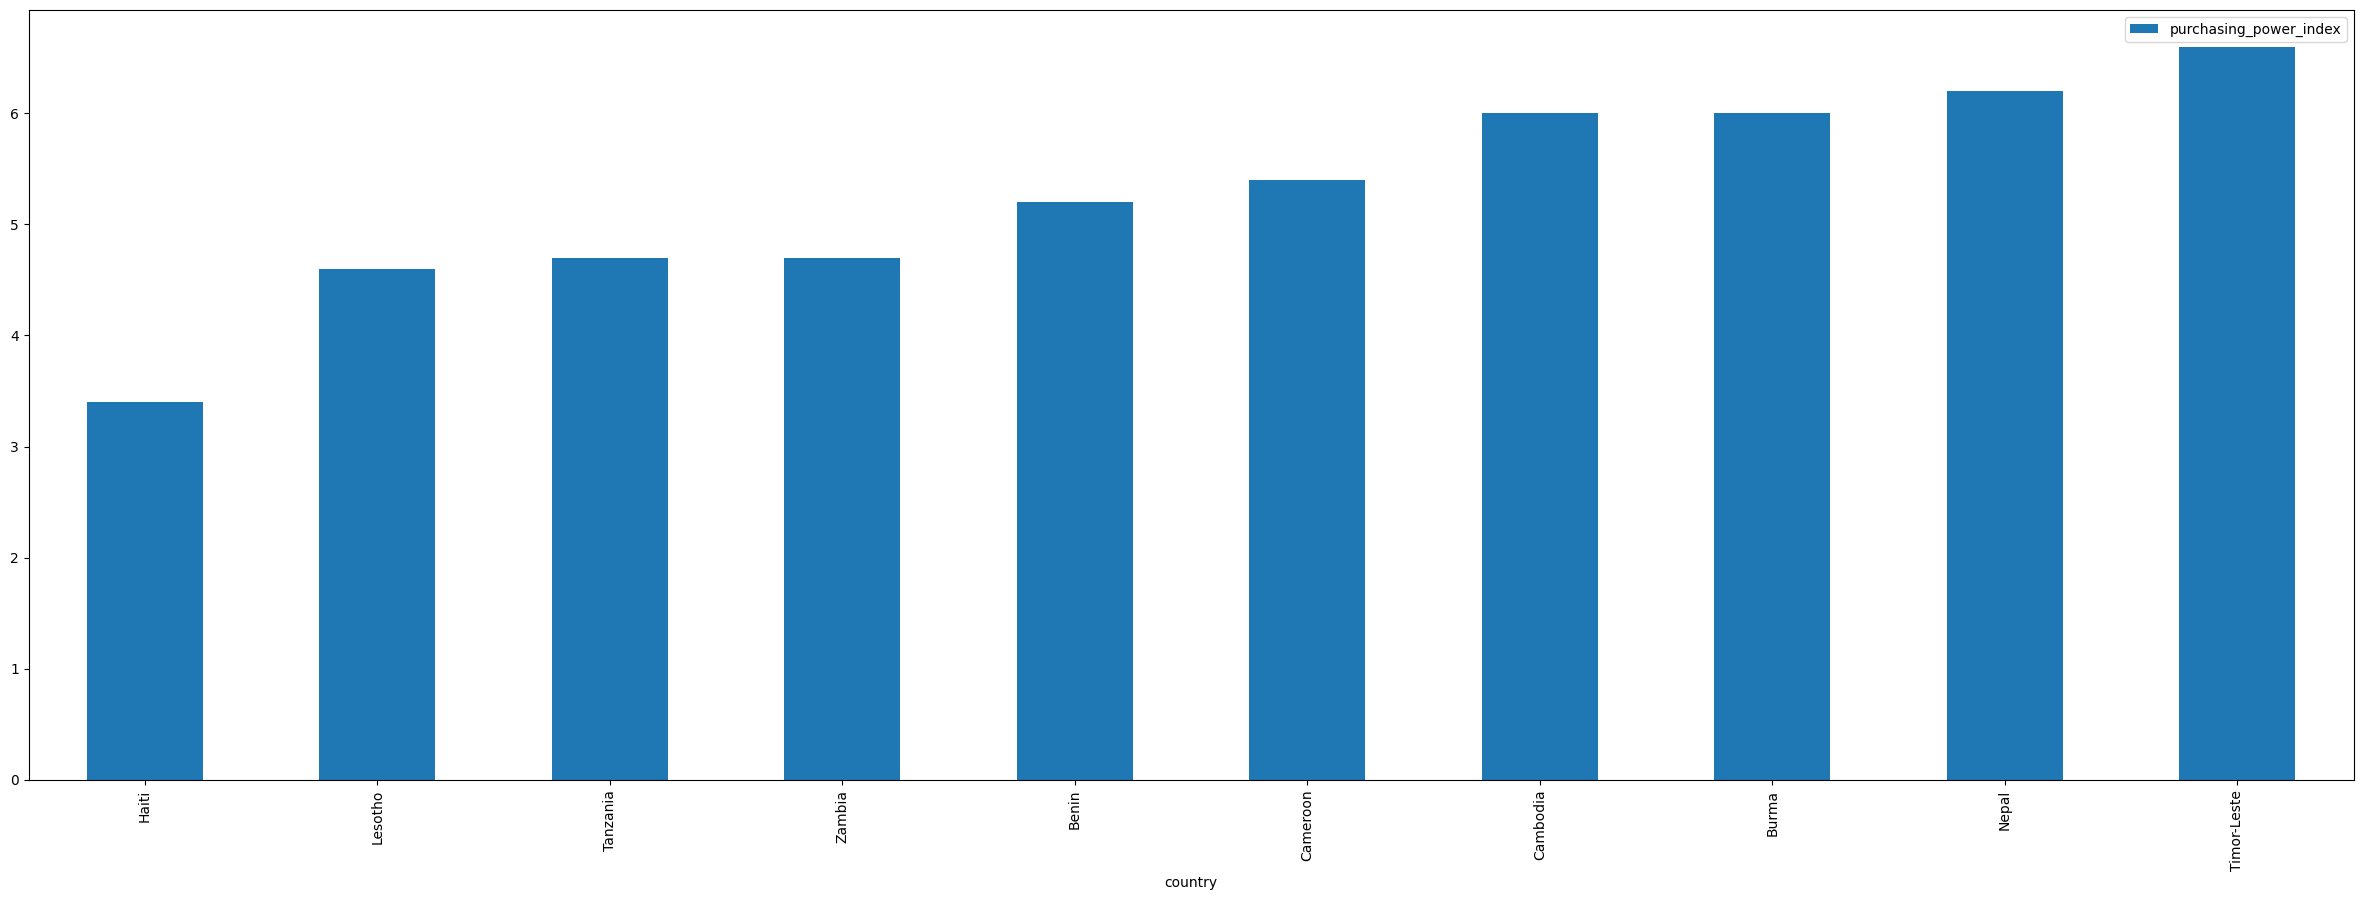

In [50]:
df_cost_6.plot( x='country',y='purchasing_power_index', kind='bar',figsize=(30,10))

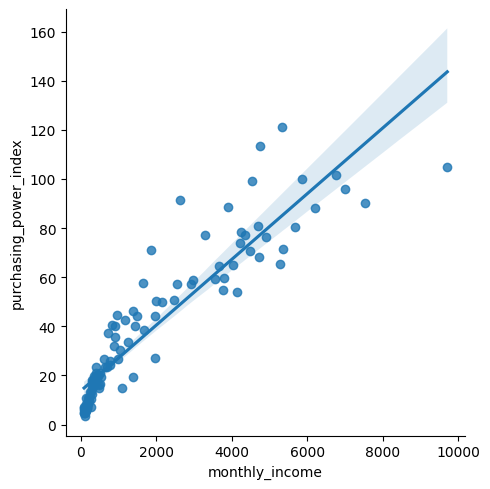

In [51]:
sns.lmplot(x='monthly_income', y='purchasing_power_index', data=df_cost);  

In [52]:
#En el resumen estadístico del dataset df_cost comprobamos que la media de el índice de coste era 62.555140.
#Con este dato vamos a comprobar cuántos países,de los 107 analizados,se encuentran por debajo de la media en índice de coste.
#66/107 países se encuentran por debajo de esta media.
len(df_cost[df_cost['cost_index']<62.555140	])

66

In [53]:
#En el resumen estadístico del dataset df_cost comprobamos que la media de los ingresos mensuales era 1826.5327102803737.
#Con este dato vamos a comprobar cuántos países,de los 107 analizados,se encuentran por debajo de la media en ingresos mensuales.
#70/107 países se encuentran por debajo de esta media.Cifra alta.
len(df_cost[df_cost['monthly_income']<1826.5327102803737])

70

In [54]:
#En el resumen estadístico del dataset df_cost comprobamos que la media del índice de poder de compra era 38.150467.
#Con este dato vamos a comprobar cuántos países,de los 107 analizados,se encuentran por debajo de la media en índice de poder de compra.
#62/107 países se encuentran por debajo de esta media.
len(df_cost[df_cost['purchasing_power_index']<38.150467])

62

**3. RIQUEZA NACIONAL**

In [55]:
#RIQUEZA NACIONAL
#Analizaremos la siguiente variable ,países más ricos, atendiendo al PIB per cápita de cada país.
#El PIB per cápita es un indicador económico que mide la relación existente entre el nivel de renta de un país y su población.
#Se utiliza para analizar la prosperidad de un país en función de su crecimiento económico.

df_rich=pd.read_csv('data/richest_countries.csv')
df_rich

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192
5,Norway,79201
6,Switzerland,77324
7,Macao,73802
8,United States,69288
9,Brunei,66620


In [56]:
df_rich.shape

(50, 2)

In [57]:
df_rich.head()

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192


In [58]:
df_rich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         50 non-null     object
 1   gdp_per_capita  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [59]:
#Vamos a comprobar si existen valores nulos en nuestro dataset
df_rich.isnull().any()

country           False
gdp_per_capita    False
dtype: bool

In [60]:
df_rich.describe()

,gdp_per_capita
count,50.000000
mean,54088.180000
std,22709.045634
min,30422.000000
25%,36940.500000
50%,47316.000000
75%,62656.250000
max,134754.000000


C:\Users\csanc\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




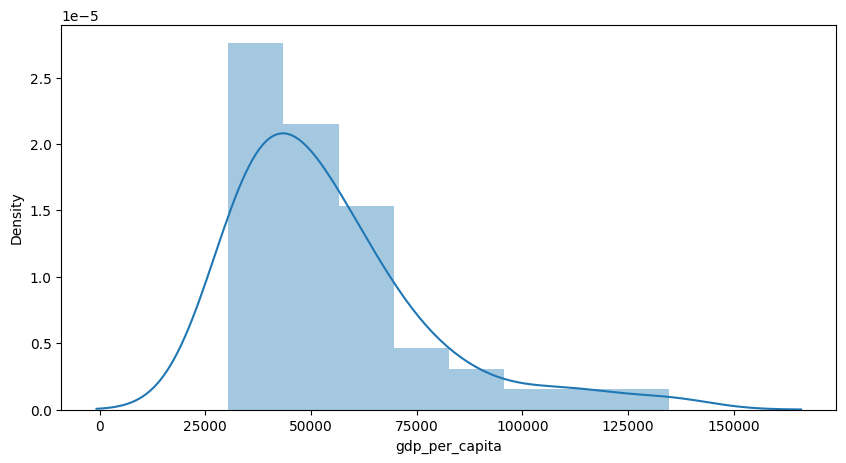

In [61]:
#A través de esta gráfica ,histograma+densidad, comprobamos cómo los datos se concentran en torno a los 50000$.
plt.figure(figsize=(10,5))
sns.distplot(df_rich['gdp_per_capita'], hist = True);

<AxesSubplot:xlabel='country'>

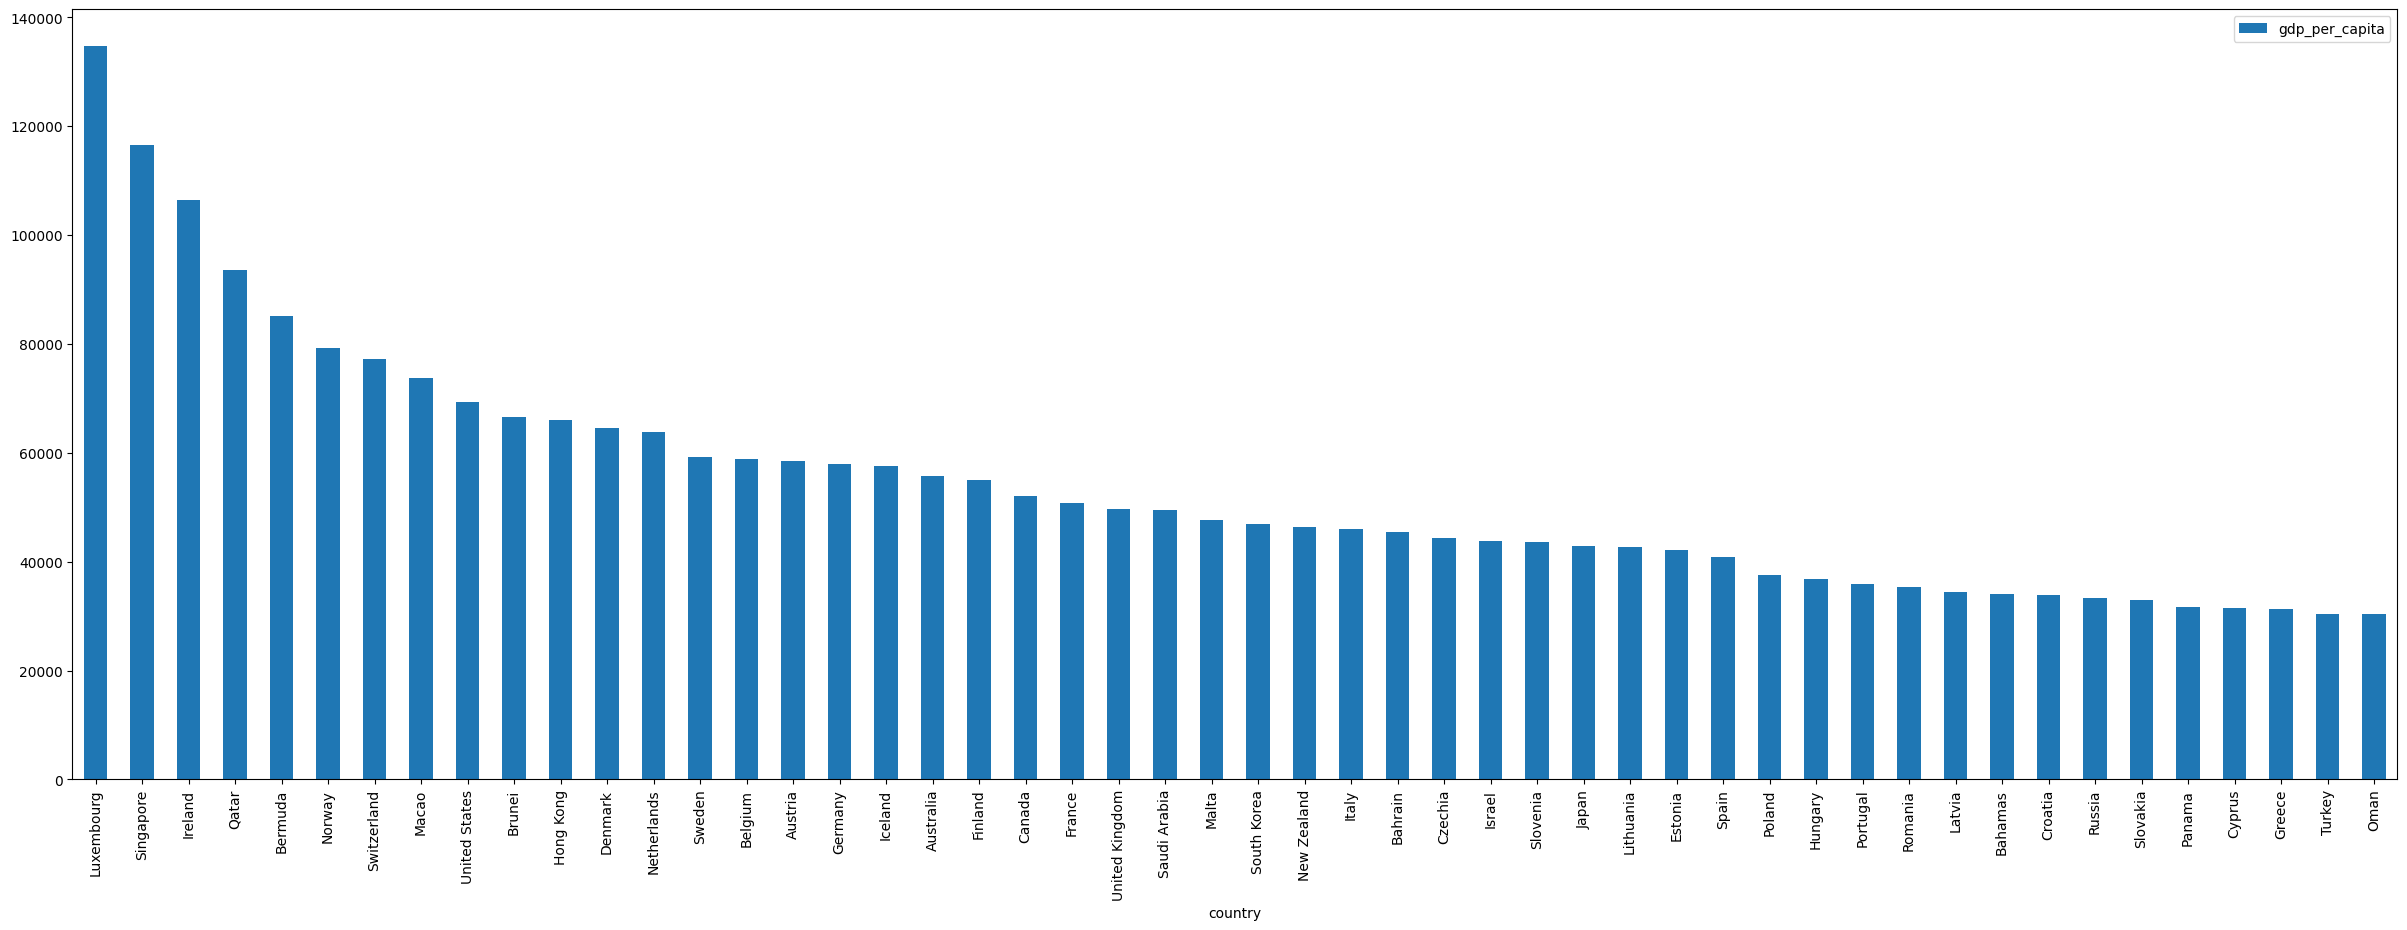

In [62]:
df_rich.plot( x='country',y='gdp_per_capita', kind='bar',figsize=(30,10))
#Comprobamos cómo España ocupa la posición 35

In [63]:
#Analizamos los 10 países con mayor PIB per cápita.
df_rich_2=df_rich.nlargest(10,'gdp_per_capita')
df_rich_2

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192
5,Norway,79201
6,Switzerland,77324
7,Macao,73802
8,United States,69288
9,Brunei,66620


<AxesSubplot:xlabel='country'>

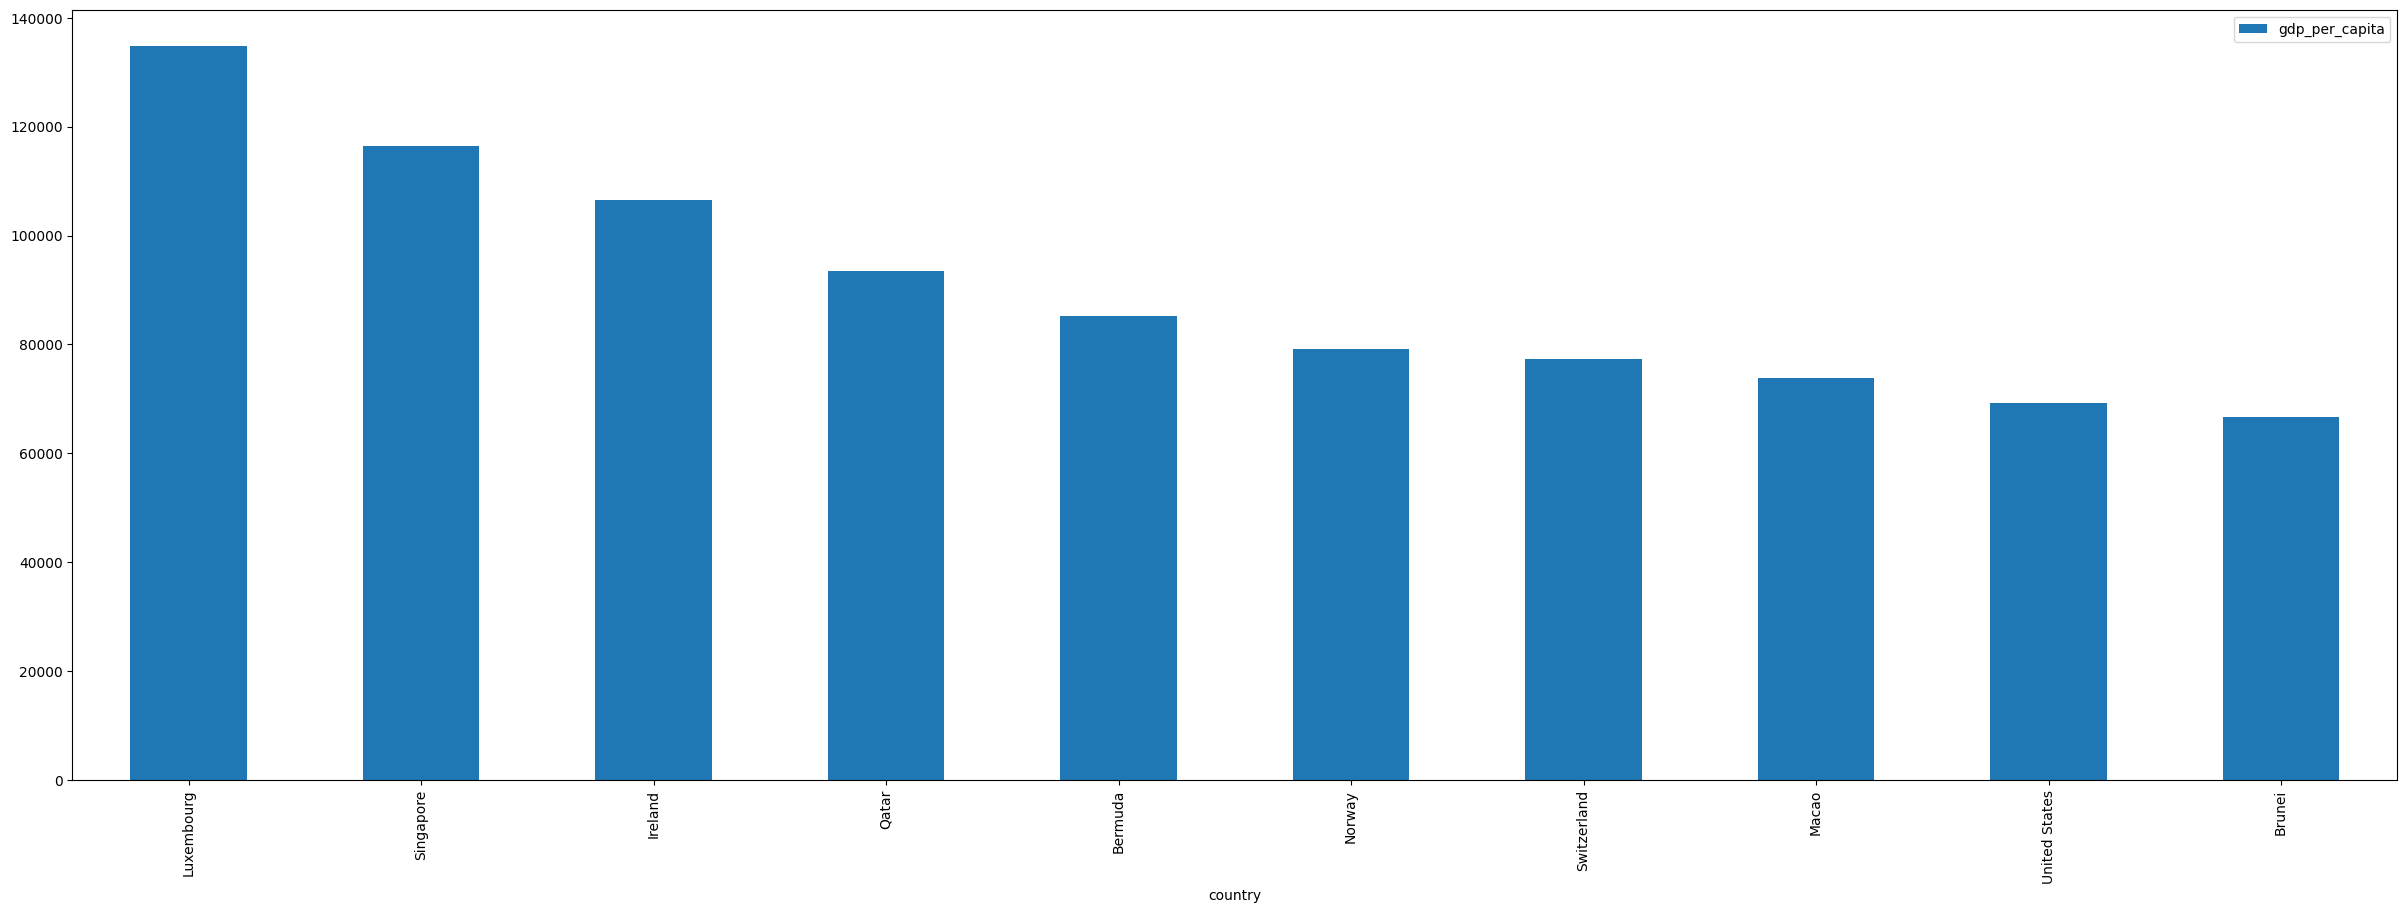

In [64]:
df_rich_2.plot( x='country',y='gdp_per_capita', kind='bar',figsize=(30,10))

In [65]:
#En el resumen estadístico del dataset df_rich comprobamos que la media del PIB per cápita era 54088.180000.
#Con este dato vamos a comprobar cuántos países,de los 50 analizados más ricos,se encuentran por debajo de la media en PIB per cápita.
#30/50 países se encuentran por debajo de esta media.Cifra alta.
len(df_rich[df_rich['gdp_per_capita']<54088.180000])
#(df_rich[df_rich['gdp_per_capita']>54088.18]).count() 

30

**4. TURISMO**

In [66]:
#TURISMO
#Para la cuarta variable ,turismo,tendremos en cuenta el número de turistas en millones,los ingresos en billones,los ingresos por turista y
#por último el porcentaje sobre el PIB.
#Se realizará este análisis para 41 países.

df_tour=pd.read_csv('data/tourism.csv')
df_tour

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3
5,Croatia,21.6,5.63,261,8.3
6,Turkey,16.0,13.77,862,1.7
7,Austria,15.1,15.36,1018,3.2
8,Germany,12.4,58.37,4689,1.4
9,Virgin Islands,8.6,0.69,80,16.3


In [67]:
df_tour.shape

(41, 5)

In [68]:
df_tour.head()

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3


In [69]:
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               41 non-null     object 
 1   tourists_in_millions  41 non-null     float64
 2   receipts_in_billions  41 non-null     float64
 3   receipts_per_tourist  41 non-null     int64  
 4   percentage_of_gdp     41 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ KB


In [70]:
#Vamos a comprobar si existen valores nulos en nuestro dataset
df_tour.isnull().any()

country                 False
tourists_in_millions    False
receipts_in_billions    False
receipts_per_tourist    False
percentage_of_gdp       False
dtype: bool

In [71]:
df_tour.describe()

,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
count,41.000000,41.000000,41.000000,41.000000
mean,11.209756,11.256341,2930.512195,3.482927
std,20.819376,16.595482,4735.728456,5.519914
min,0.000000,0.090000,80.000000,0.200000
25%,2.500000,2.200000,533.000000,0.800000
50%,4.100000,4.510000,1018.000000,1.700000
75%,8.100000,11.780000,2882.000000,3.400000
max,117.100000,84.210000,24601.000000,31.600000


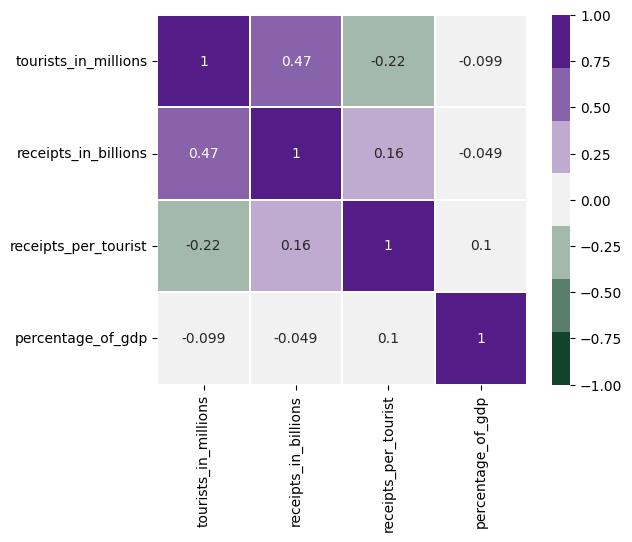

In [72]:
#Queremos comprobar la correlación que existe entre el  número de turistas en millones,los ingresos en billones,los ingresos por turista y
#por último el porcentaje sobre el PIB.
#Comprobamos que hay una correlación positiva entre turistas en millones e ingresos en billones.

sns.heatmap(df_tour.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.3,
            annot=True)
plt.show();

<AxesSubplot:xlabel='country'>

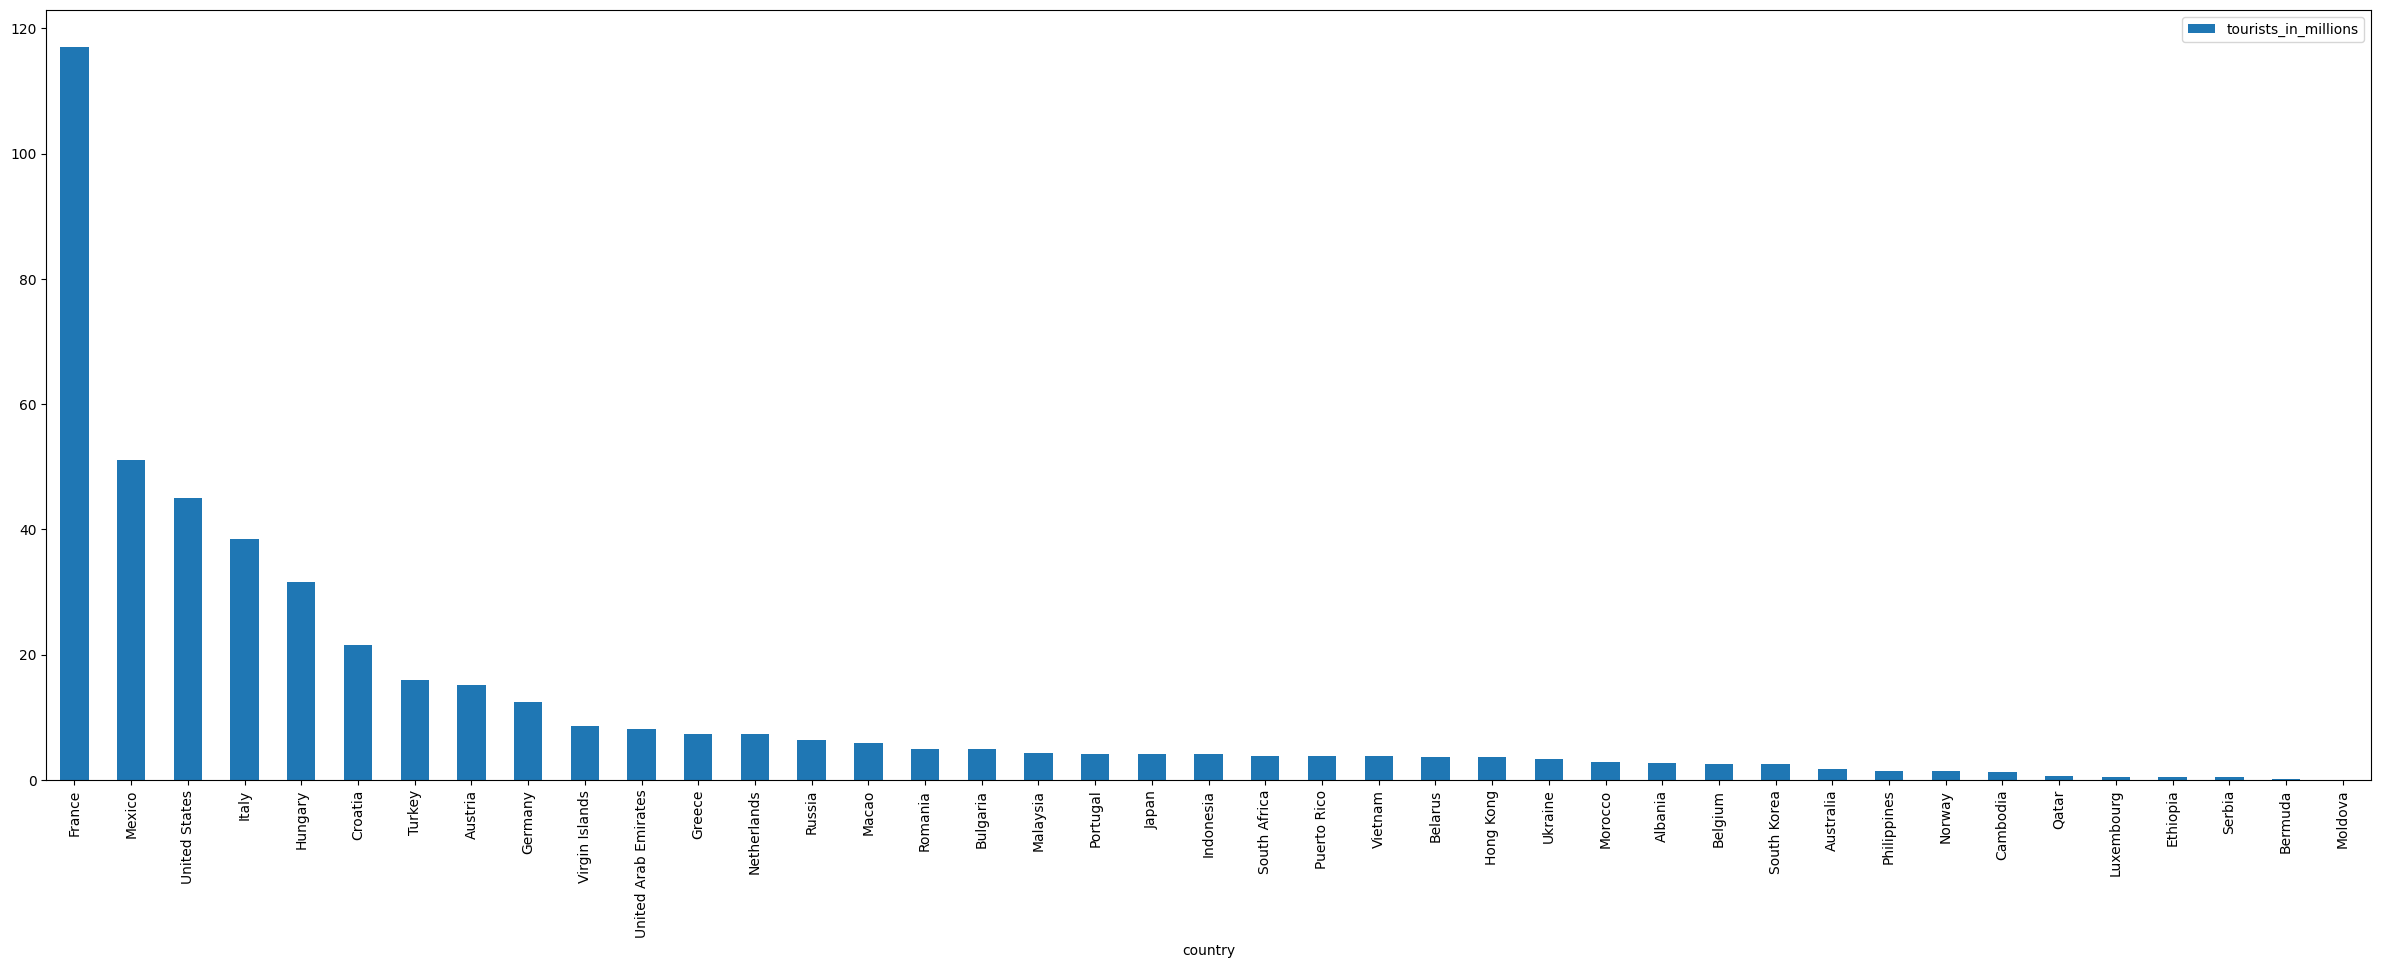

In [73]:
#Vamos a analizar el número de turistas en millones
df_tour.plot( x='country',y='tourists_in_millions', kind='bar',figsize=(30,10))

In [74]:
df_tour_2=df_tour.nlargest(10,'tourists_in_millions')
df_tour_2

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3
5,Croatia,21.6,5.63,261,8.3
6,Turkey,16.0,13.77,862,1.7
7,Austria,15.1,15.36,1018,3.2
8,Germany,12.4,58.37,4689,1.4
9,Virgin Islands,8.6,0.69,80,16.3


<AxesSubplot:xlabel='country'>

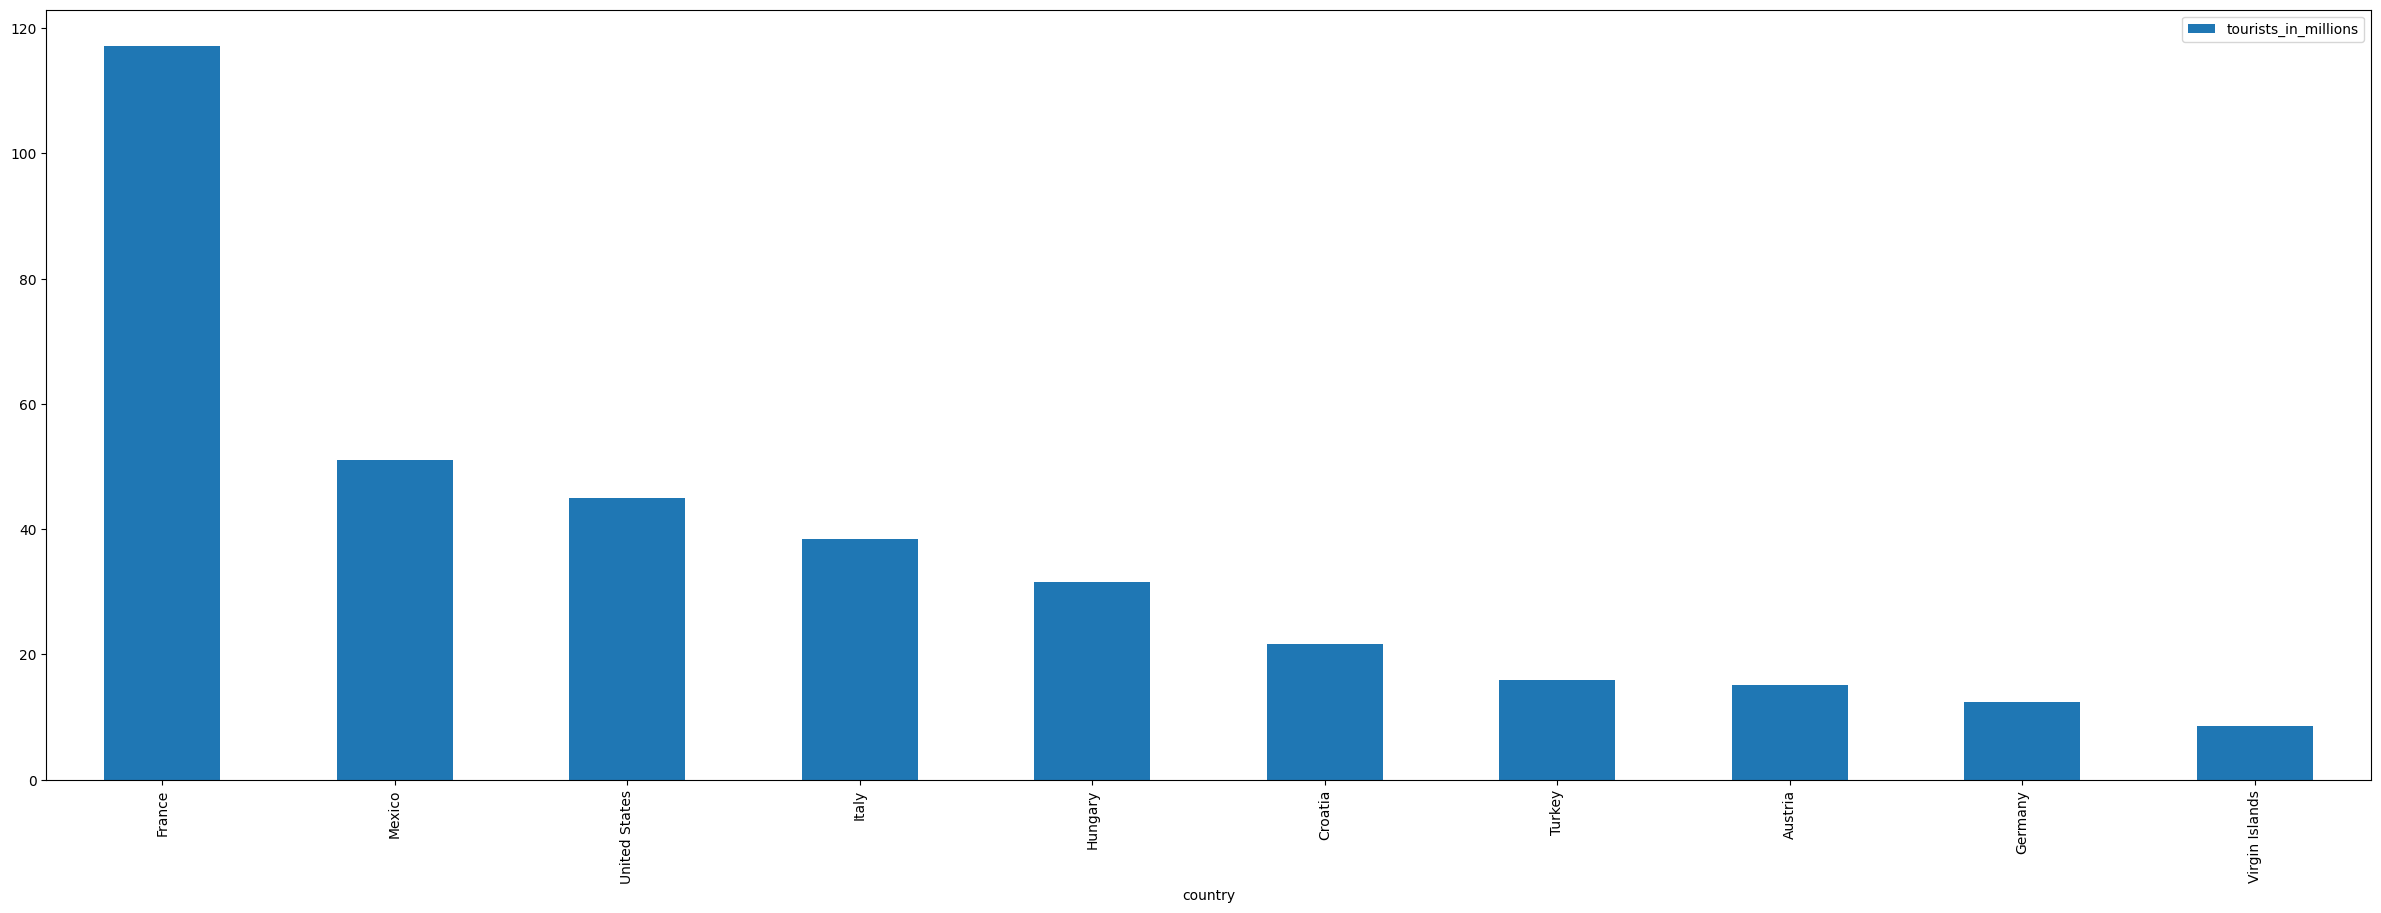

In [75]:
df_tour_2.plot( x='country',y='tourists_in_millions', kind='bar',figsize=(30,10))

<AxesSubplot:xlabel='country'>

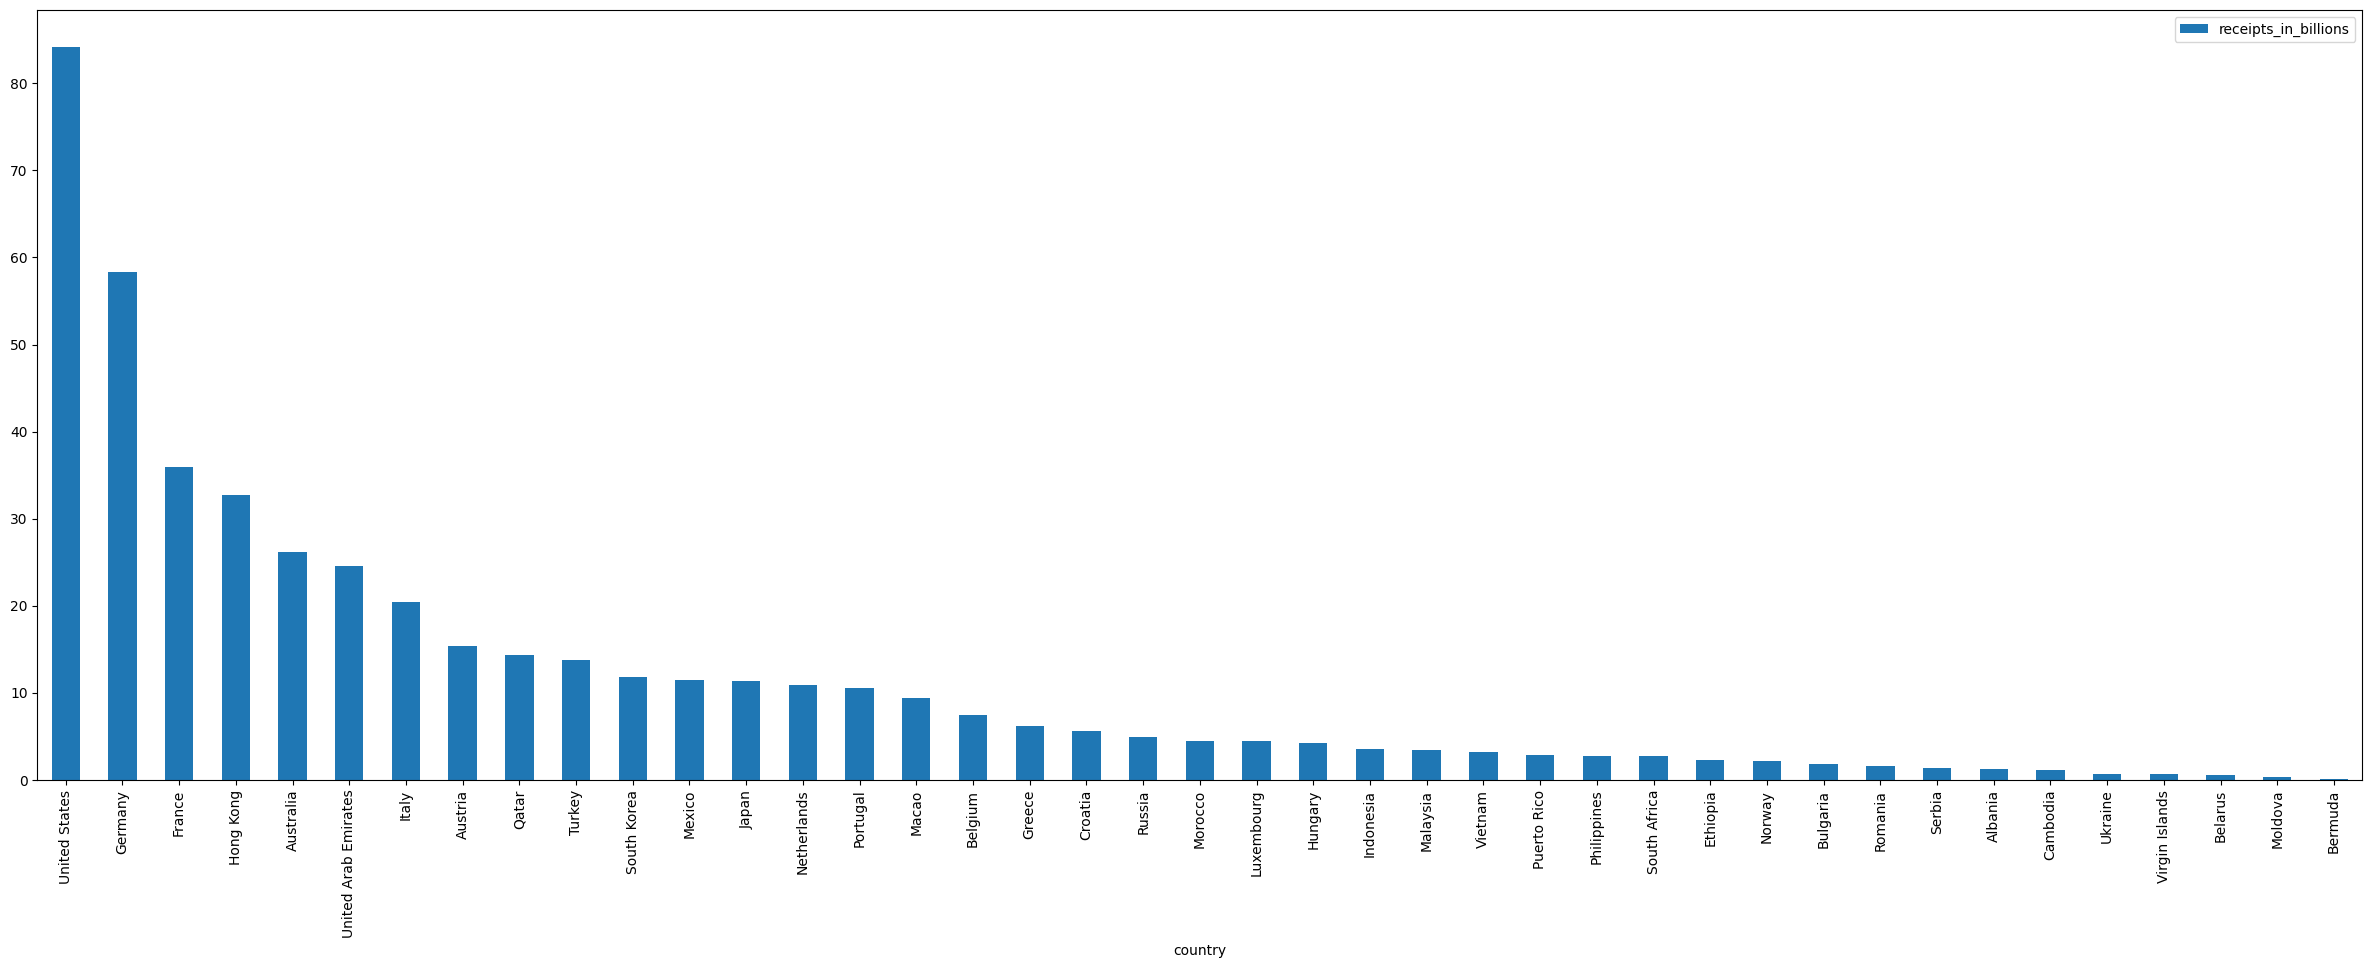

In [76]:
#Vamos a analizar los ingresos en billones de los distintos países.
df_tour=df_tour.sort_values(by='receipts_in_billions',ascending=False)
df_tour
df_tour.plot( x='country',y='receipts_in_billions', kind='bar',figsize=(30,10))

In [77]:
df_tour_3=df_tour.nlargest(10,'receipts_in_billions')
df_tour_3

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
2,United States,45.0,84.21,1870,0.4
8,Germany,12.4,58.37,4689,1.4
0,France,117.1,35.96,307,1.2
25,Hong Kong,3.6,32.70,9161,8.9
31,Australia,1.8,26.23,14351,1.7
10,United Arab Emirates,8.1,24.62,3045,6.9
3,Italy,38.4,20.46,533,1.0
7,Austria,15.1,15.36,1018,3.2
35,Qatar,0.6,14.32,24601,8.0
6,Turkey,16.0,13.77,862,1.7


<AxesSubplot:xlabel='country'>

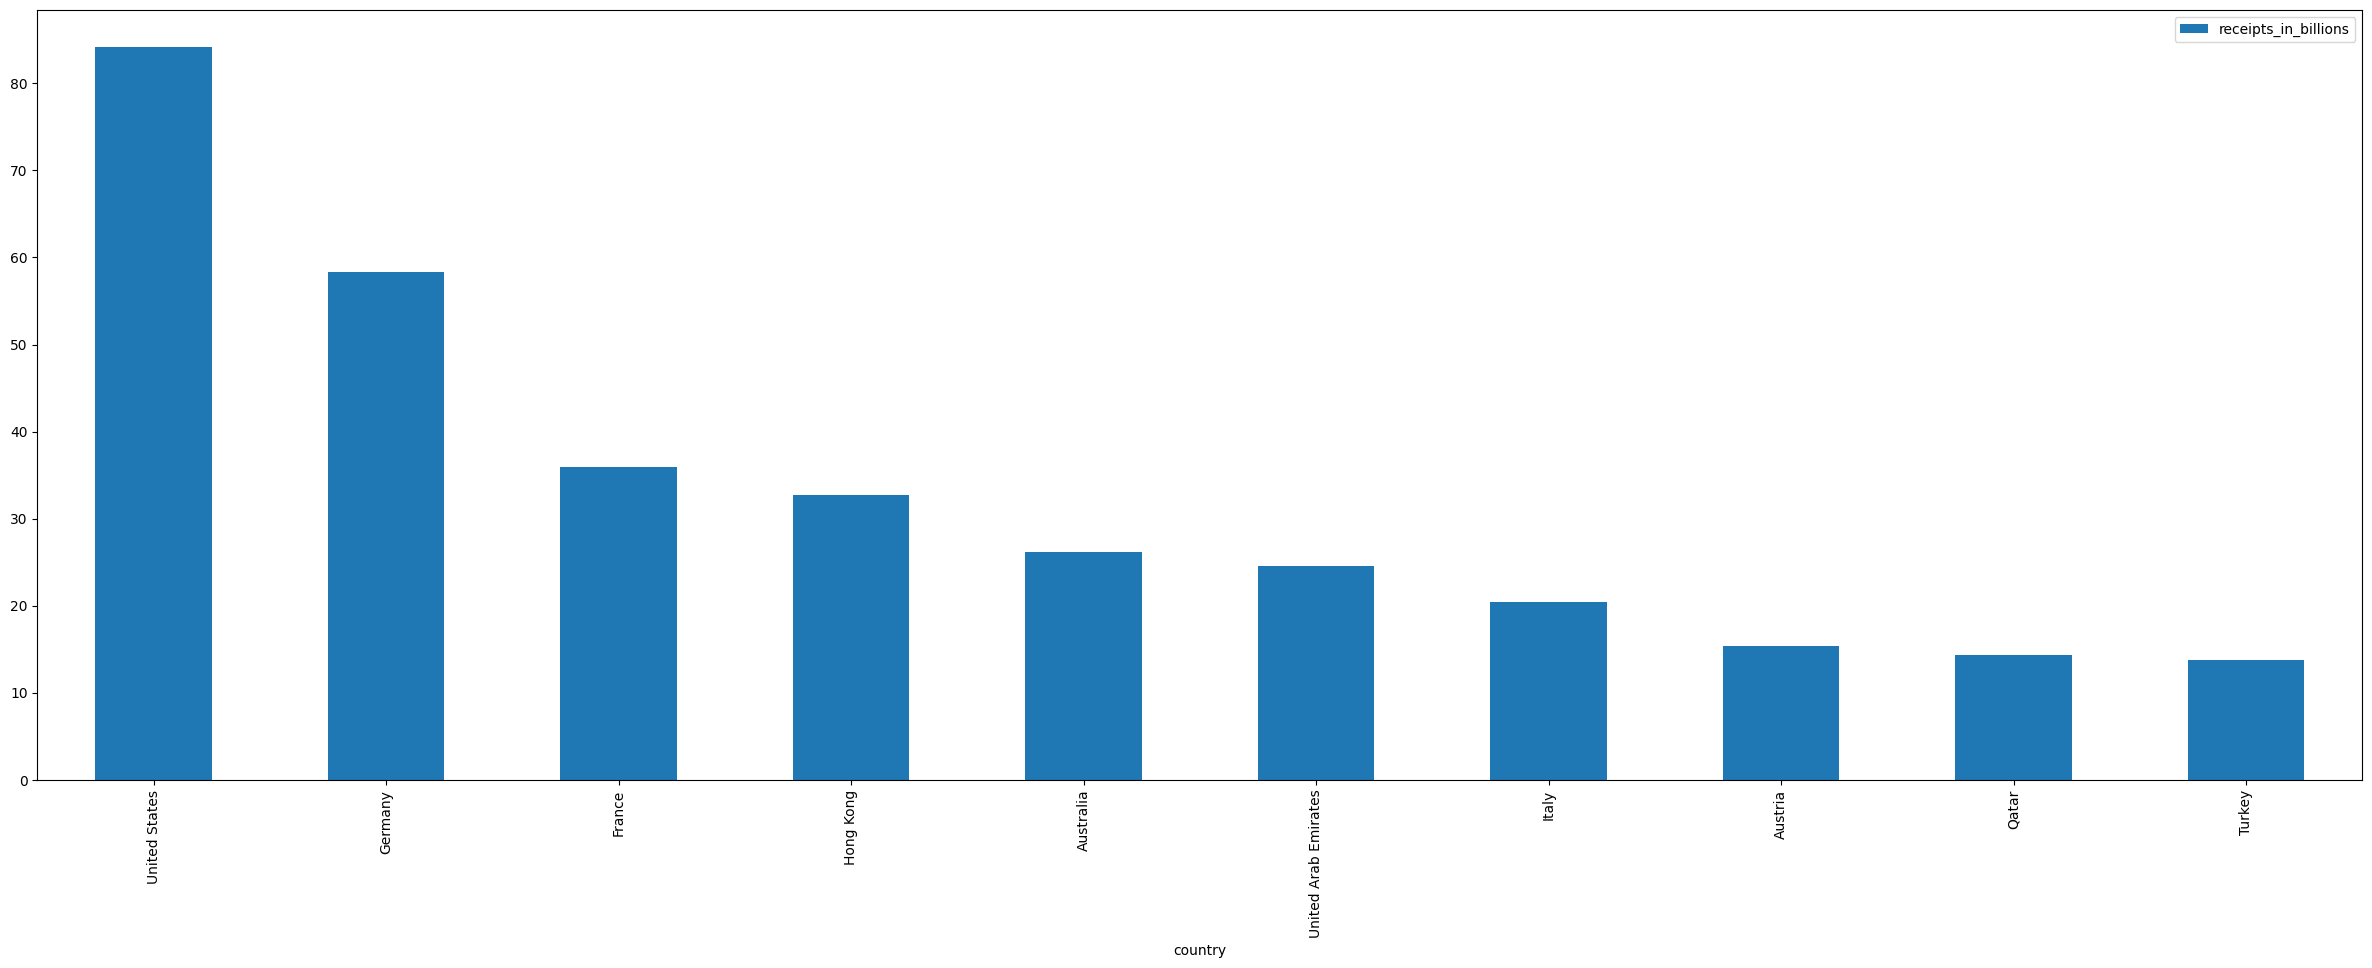

In [78]:
df_tour_3.plot( x='country',y='receipts_in_billions', kind='bar',figsize=(30,10))

<AxesSubplot:xlabel='country'>

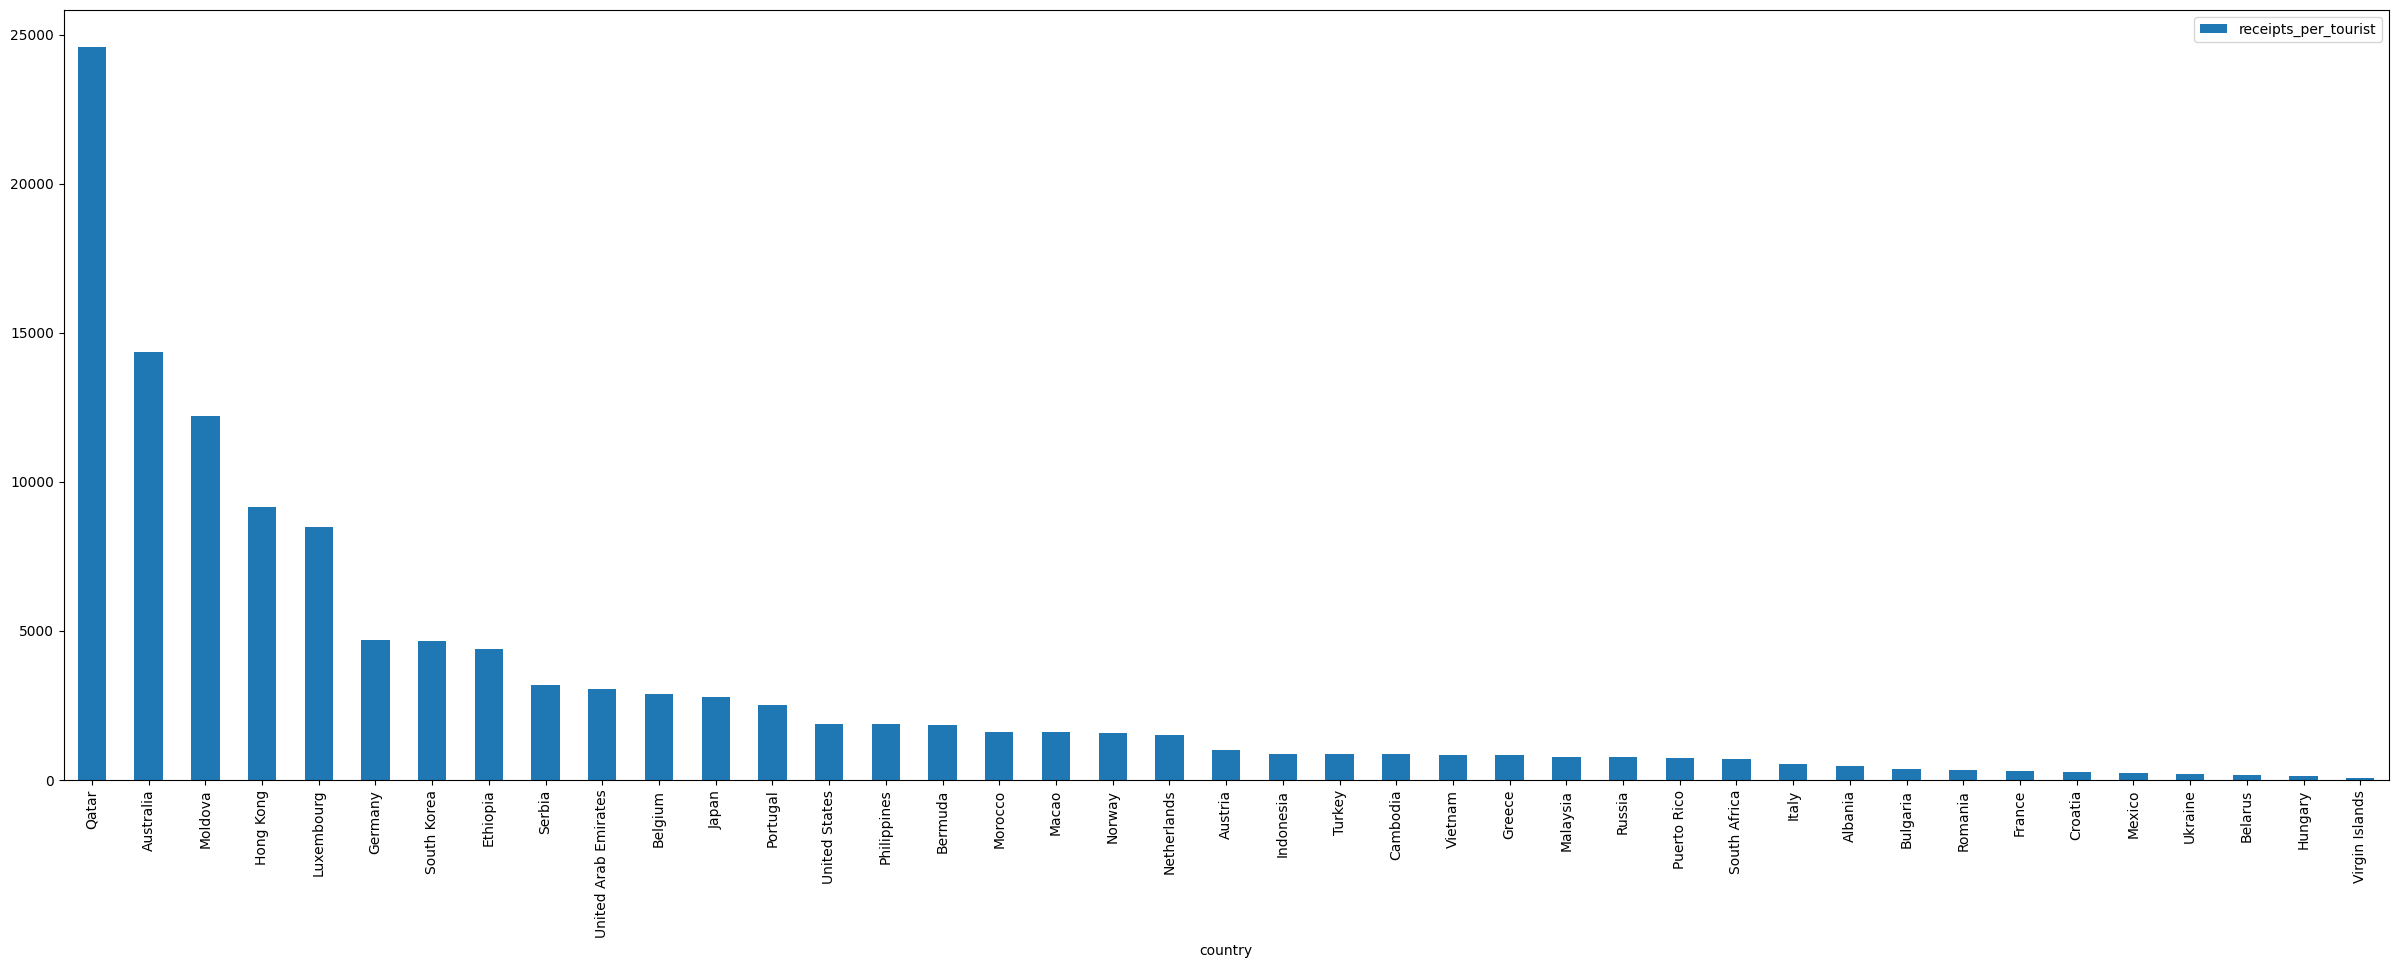

In [79]:
#Vamos a analizar el número de turistas en millones
df_tour=df_tour.sort_values(by='receipts_per_tourist',ascending=False)
df_tour
df_tour.plot( x='country',y='receipts_per_tourist', kind='bar',figsize=(30,10))

In [80]:
df_tour_4=df_tour.nlargest(10,'receipts_per_tourist')
df_tour_4

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
35,Qatar,0.6,14.32,24601,8.0
31,Australia,1.8,26.23,14351,1.7
40,Moldova,0.0,0.35,12207,2.6
25,Hong Kong,3.6,32.70,9161,8.9
36,Luxembourg,0.5,4.45,8484,5.1
8,Germany,12.4,58.37,4689,1.4
30,South Korea,2.5,11.78,4675,0.7
37,Ethiopia,0.5,2.28,4405,2.1
38,Serbia,0.4,1.42,3188,2.3
10,United Arab Emirates,8.1,24.62,3045,6.9


<AxesSubplot:xlabel='country'>

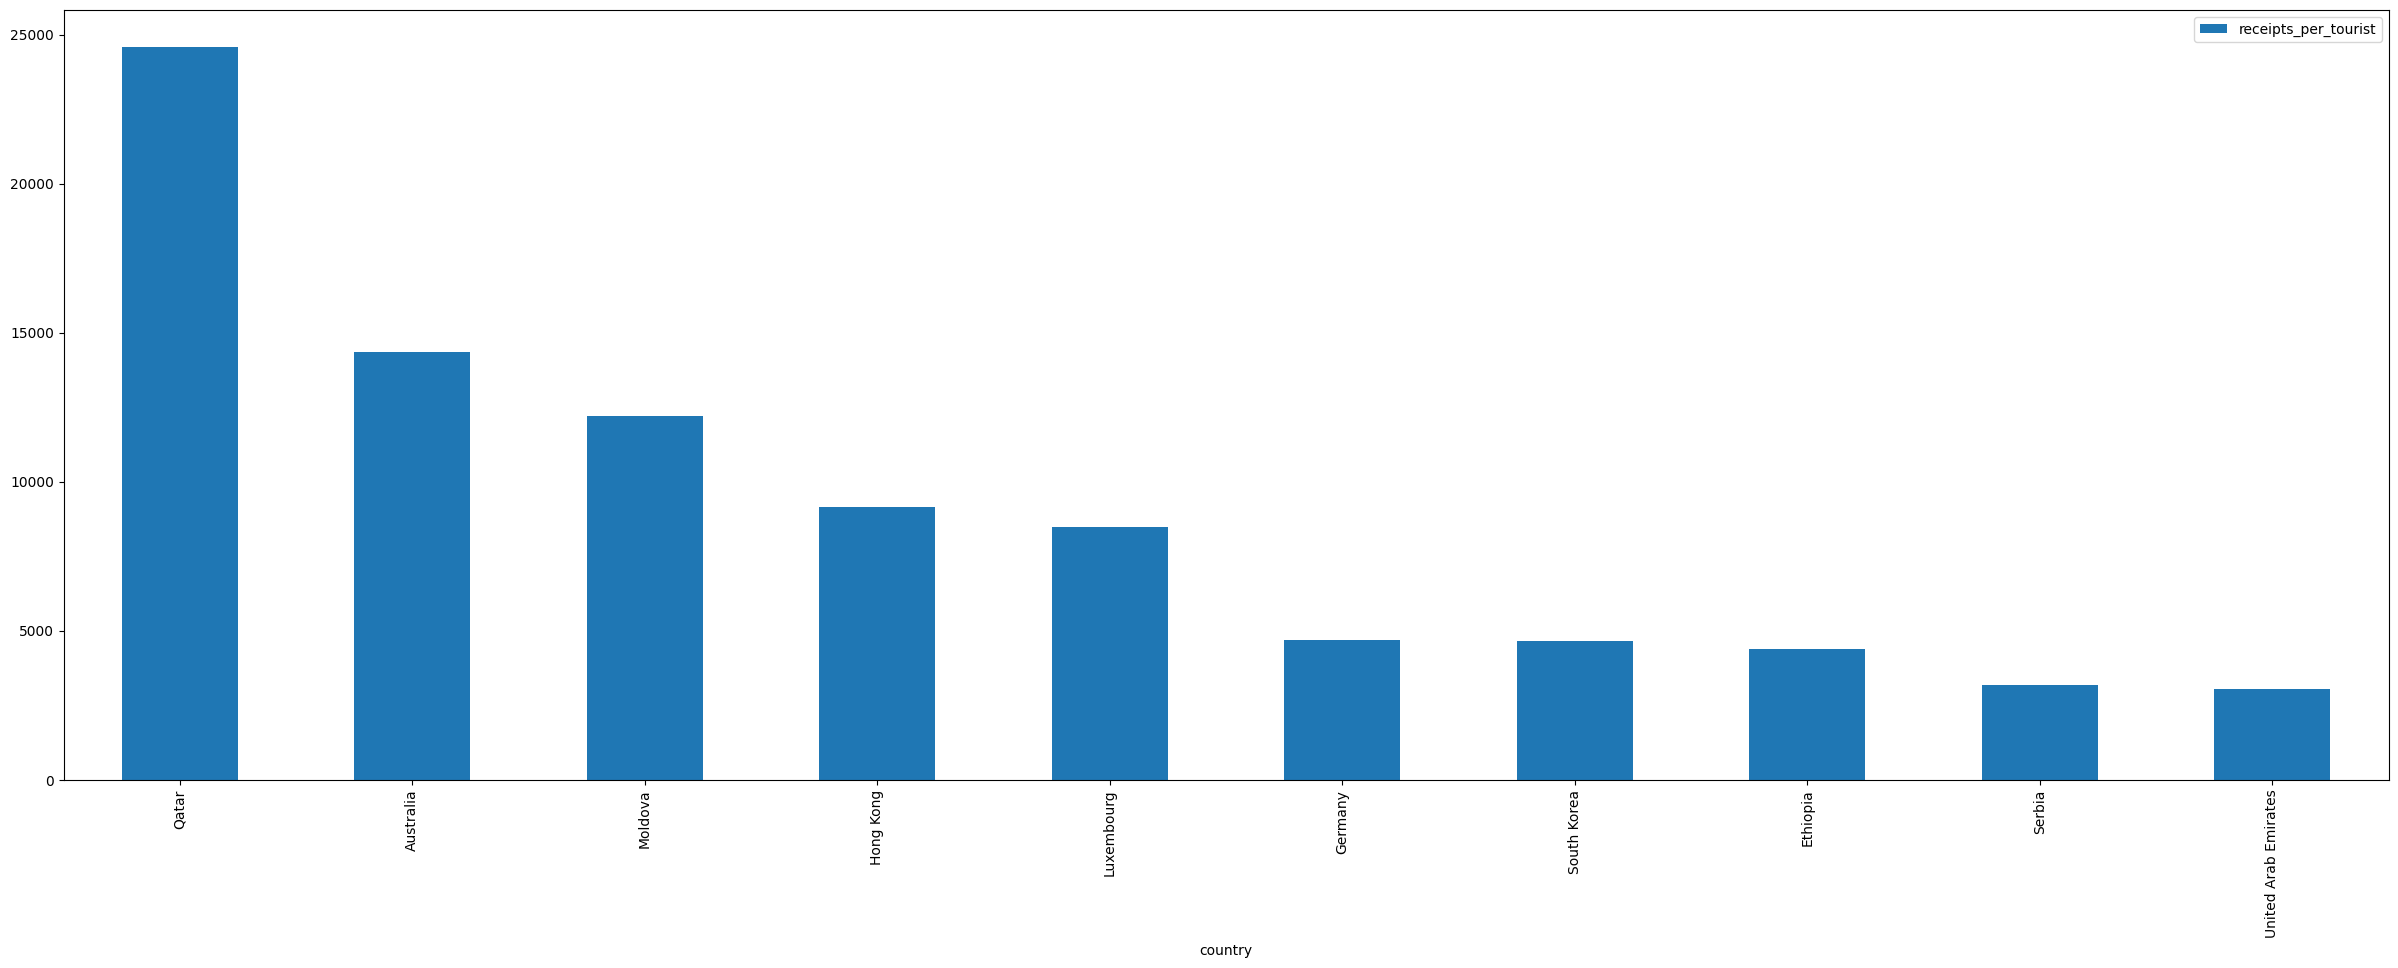

In [81]:
df_tour_4.plot( x='country',y='receipts_per_tourist', kind='bar',figsize=(30,10))

<AxesSubplot:xlabel='country'>

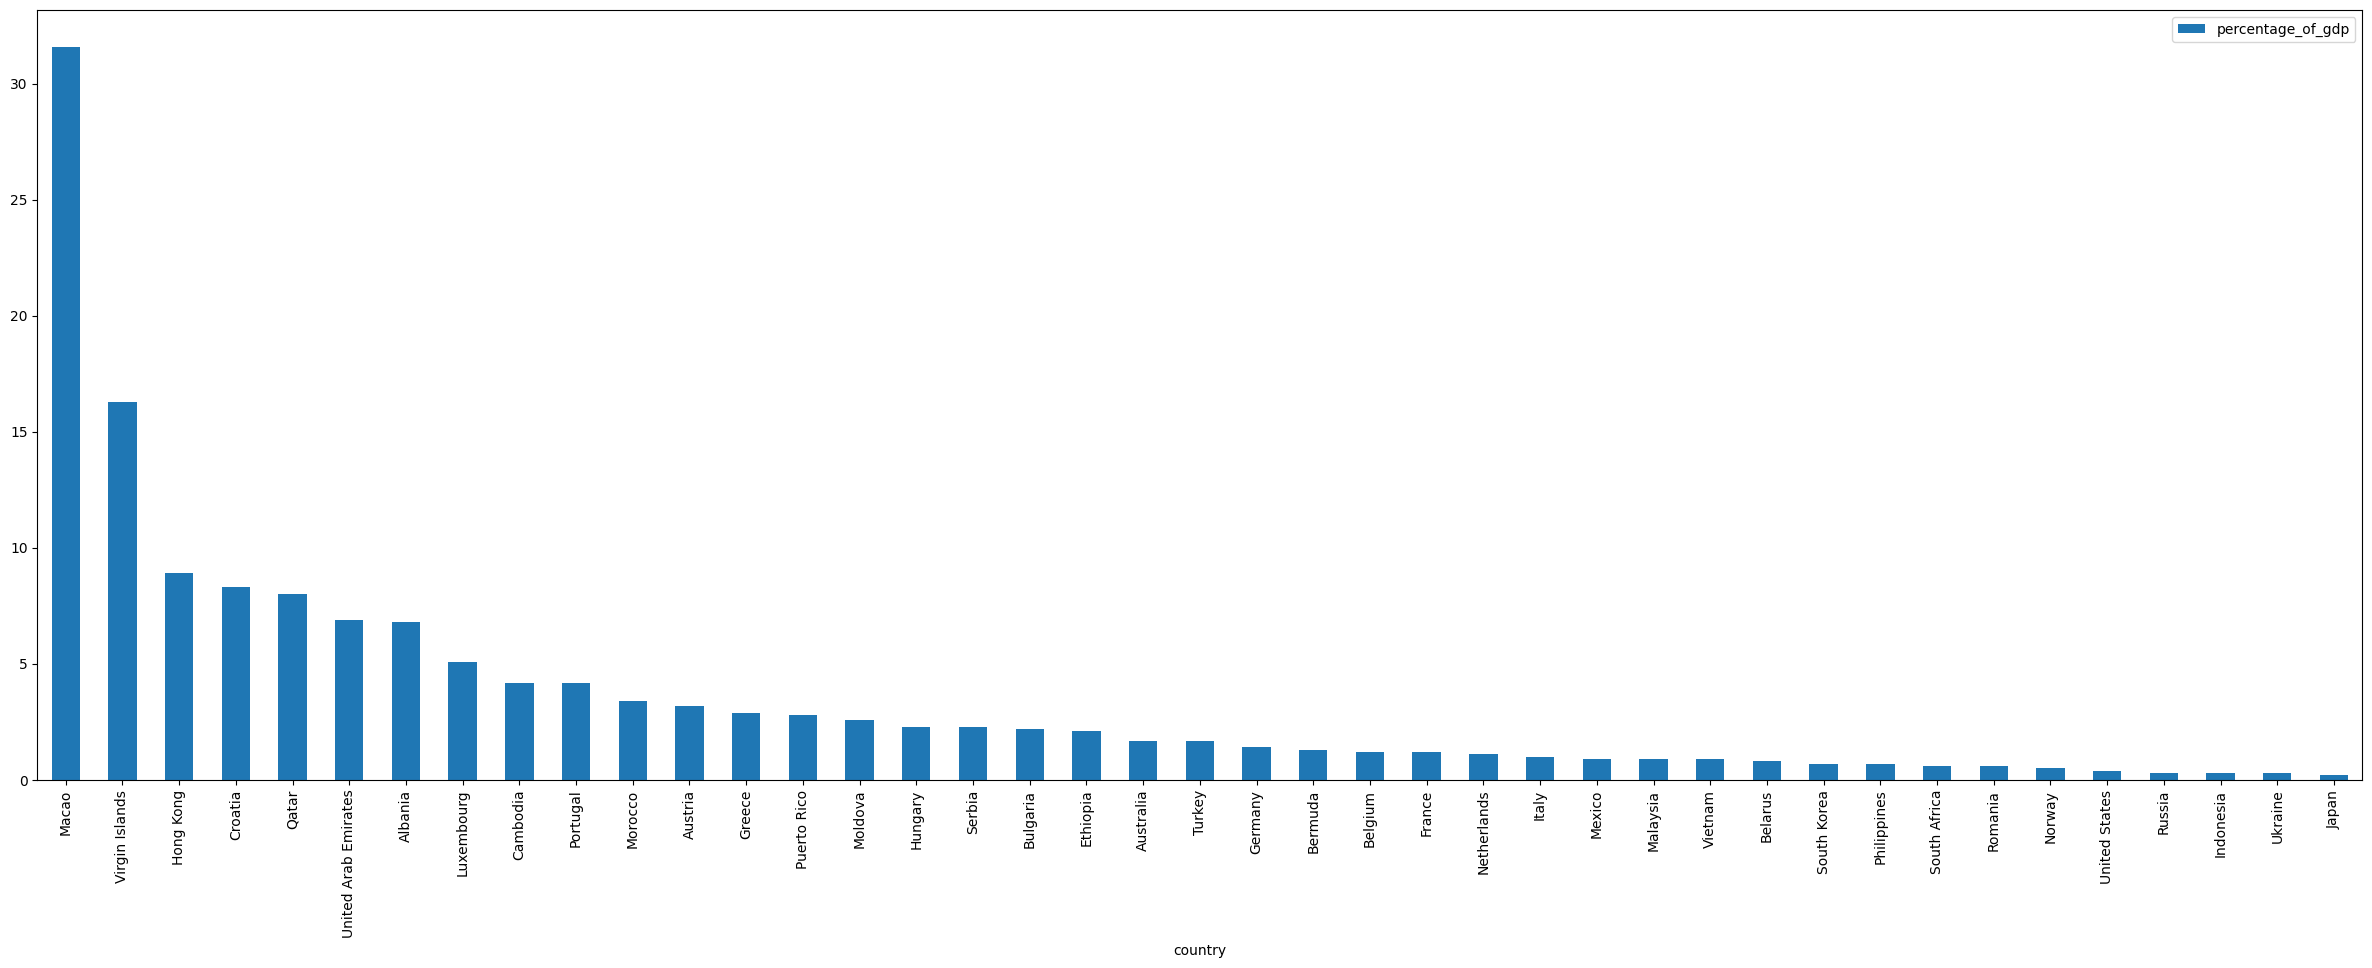

In [82]:
#Por último analizaremos cómo impacta el turismo en el PIB de cada país.

df_tour=df_tour.sort_values(by='percentage_of_gdp',ascending=False)
df_tour
df_tour.plot( x='country',y='percentage_of_gdp', kind='bar',figsize=(30,10))

In [83]:
df_tour_5=df_tour.nlargest(10,'percentage_of_gdp')
df_tour_5

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
14,Macao,5.9,9.44,1601,31.6
9,Virgin Islands,8.6,0.69,80,16.3
25,Hong Kong,3.6,32.70,9161,8.9
5,Croatia,21.6,5.63,261,8.3
35,Qatar,0.6,14.32,24601,8.0
10,United Arab Emirates,8.1,24.62,3045,6.9
28,Albania,2.7,1.24,468,6.8
36,Luxembourg,0.5,4.45,8484,5.1
34,Cambodia,1.3,1.12,857,4.2
18,Portugal,4.2,10.52,2500,4.2


<AxesSubplot:xlabel='country'>

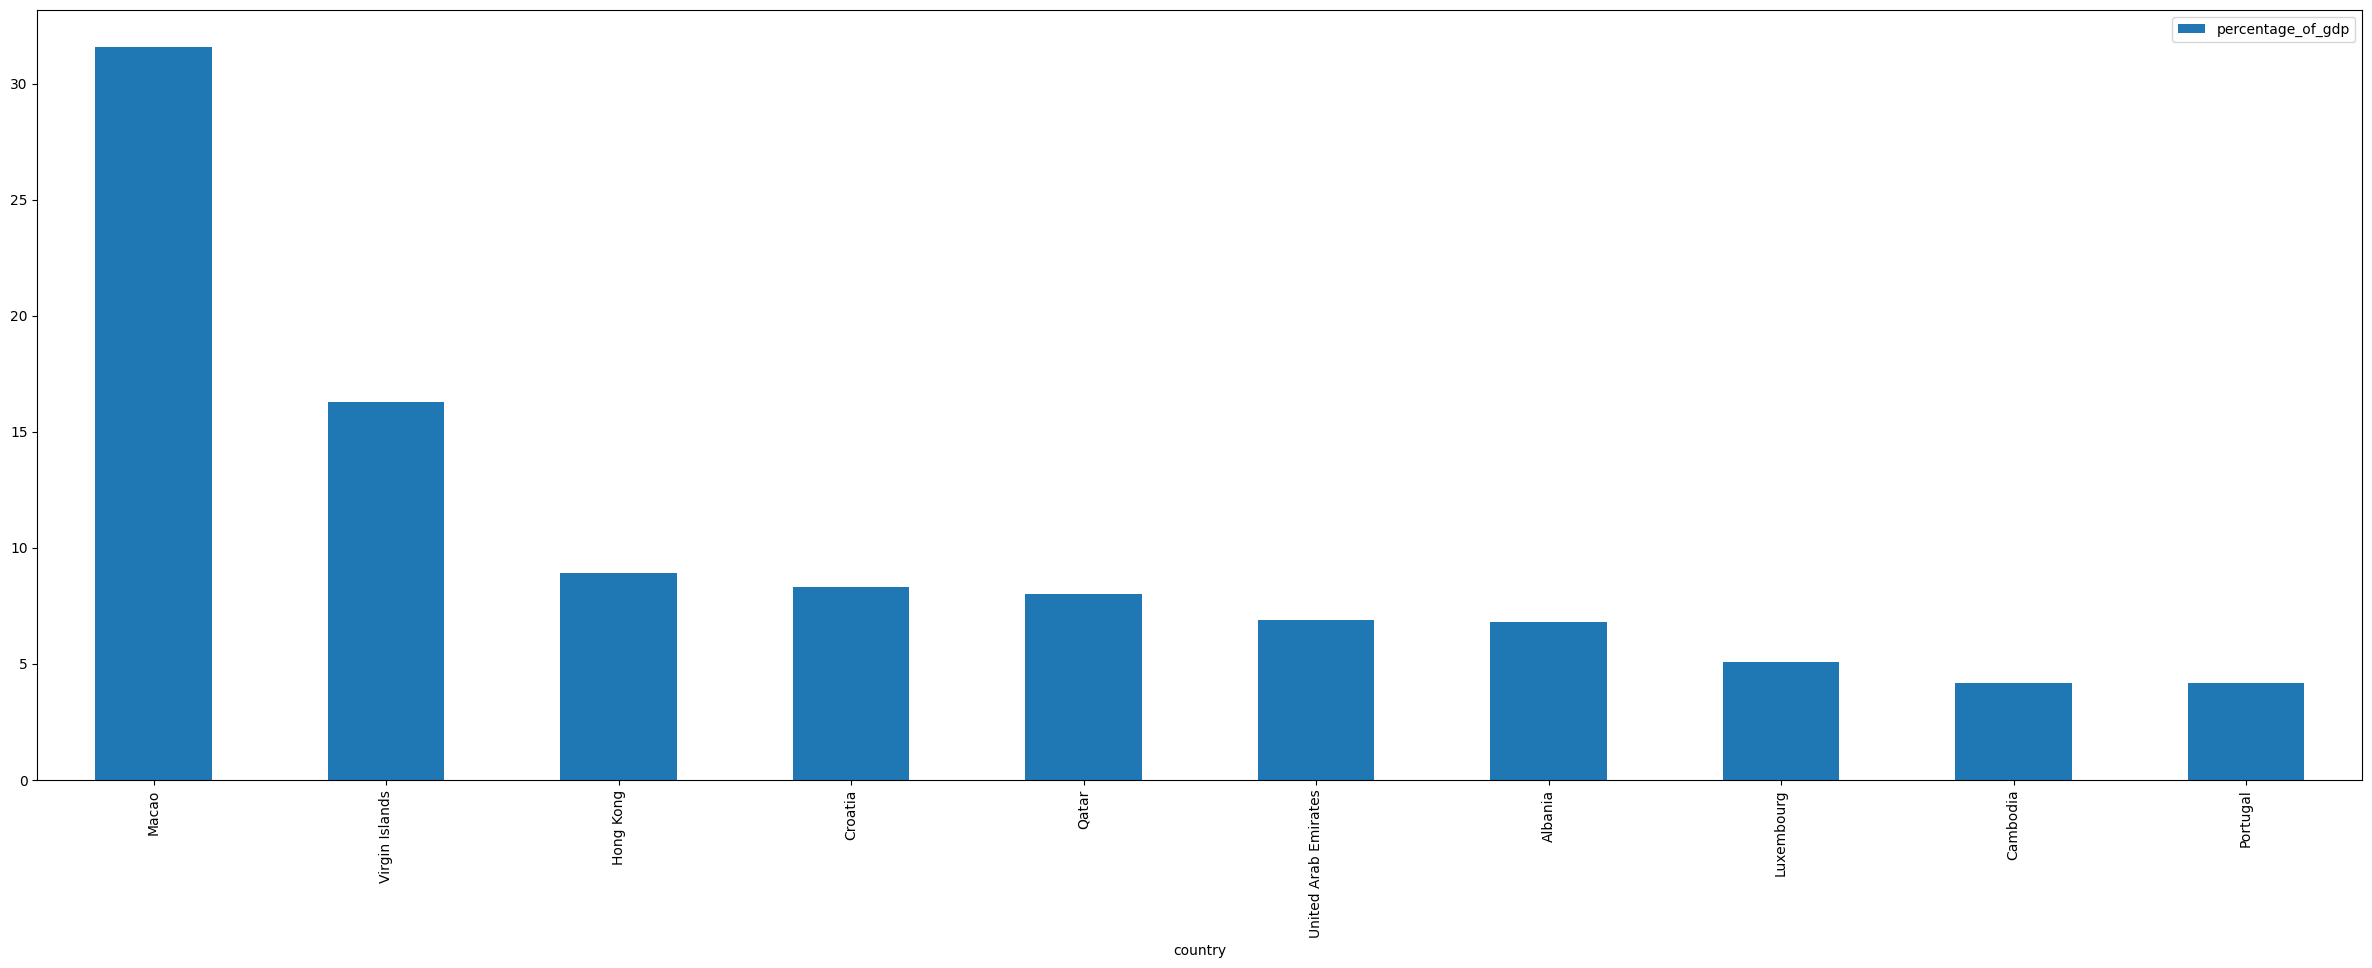

In [84]:
df_tour_5.plot( x='country',y='percentage_of_gdp', kind='bar',figsize=(30,10))

**5. DESEMPLEO**

In [85]:
#DESEMPLEO
#Para la quinta variable ,desempleo,tendremos en cuenta la tasa de desempleo de cada país.
#Se realizará este análisis para 64 países.

df_unem=pd.read_csv('data/unemployment.csv')
df_unem

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8
...,...,...
59,Gibraltar,1.0
60,Niger,0.8
61,Cambodia,0.6
62,Qatar,0.3


In [86]:
df_unem.shape

(64, 2)

In [87]:
df_unem.head()

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8


In [88]:
df_unem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            64 non-null     object 
 1   unemployment_rate  64 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [89]:
df_unem.isnull().any()

country              False
unemployment_rate    False
dtype: bool

In [90]:
df_unem.describe()

,unemployment_rate
count,64.000000
mean,7.823437
std,8.806685
min,0.100000
25%,2.700000
50%,5.000000
75%,8.250000
max,36.000000


<AxesSubplot:xlabel='country'>

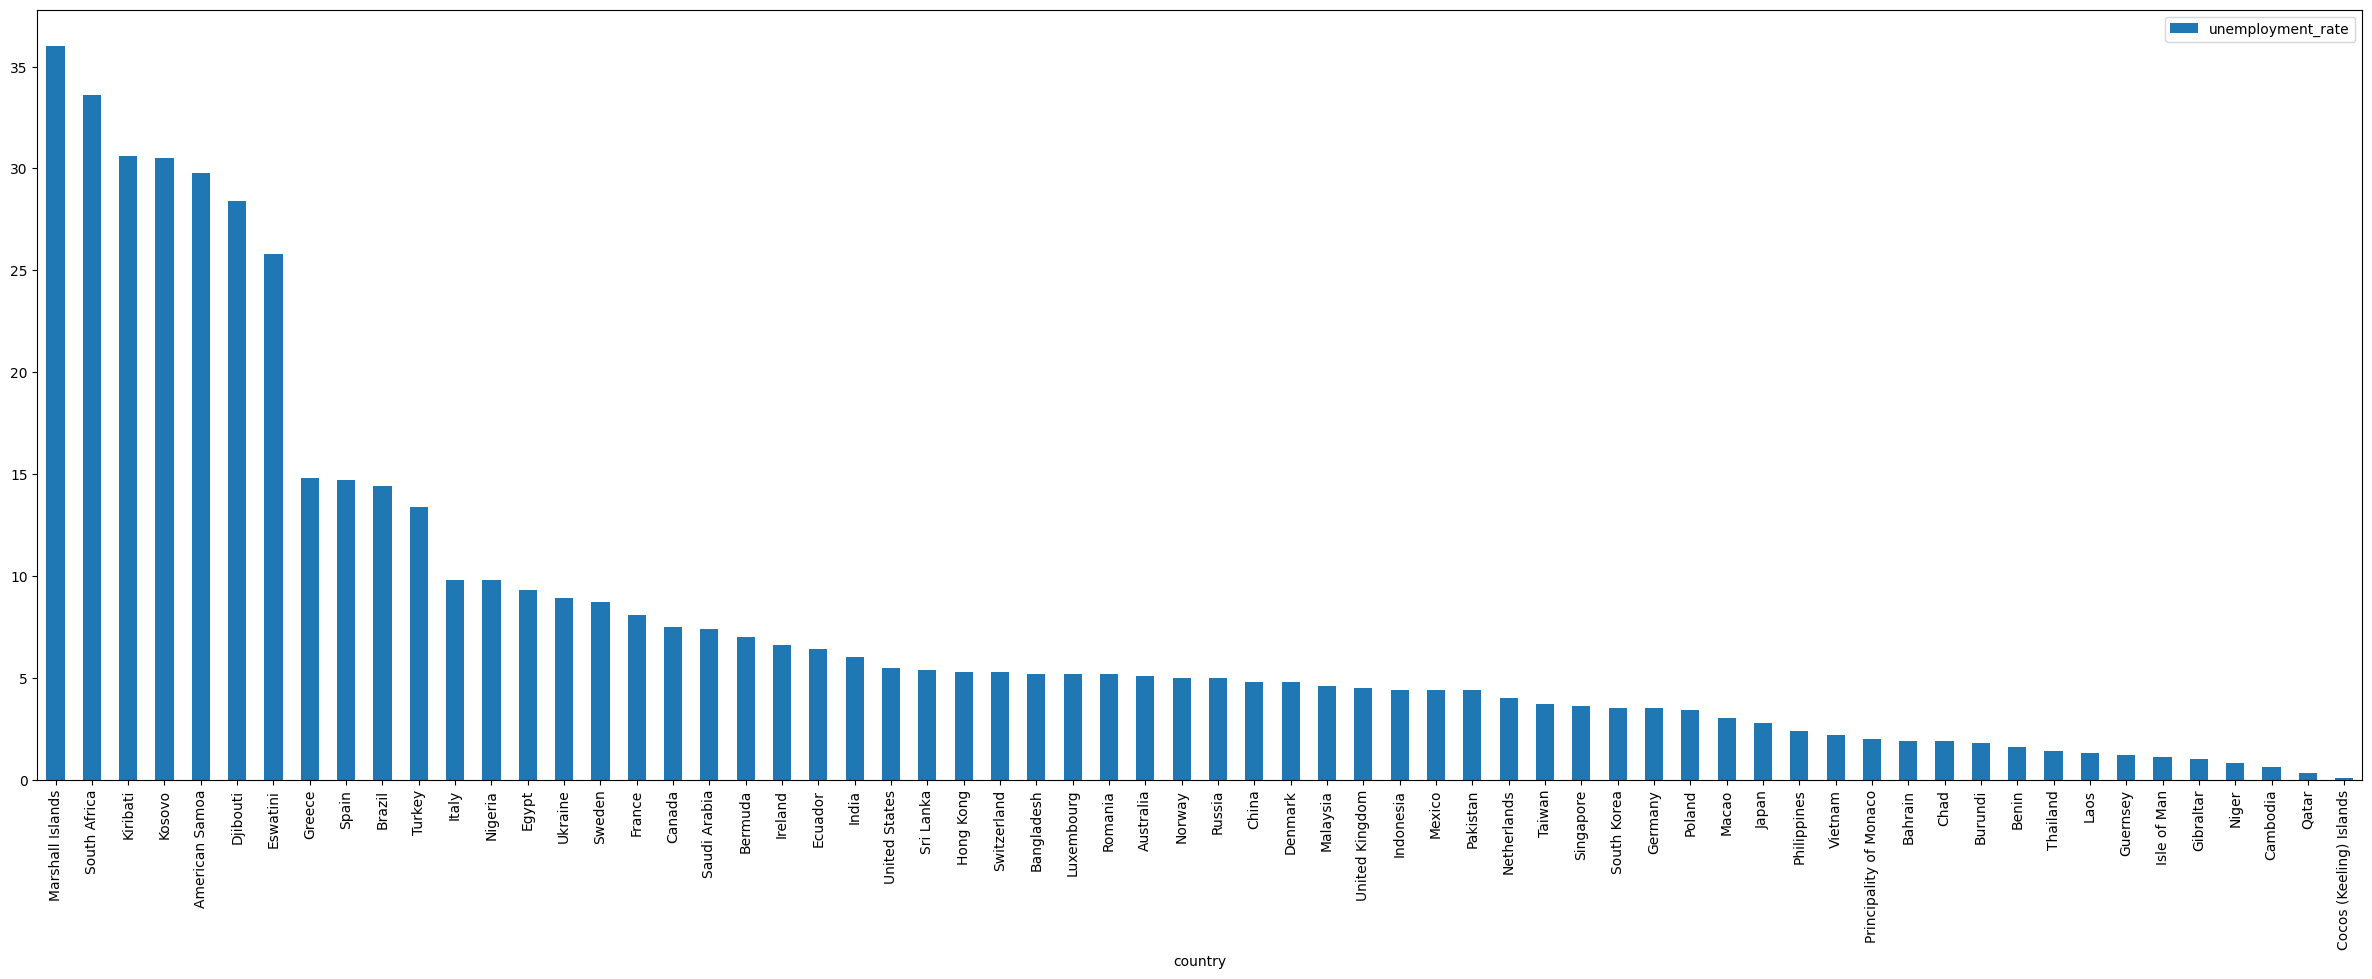

In [91]:
df_unem.plot( x='country',y='unemployment_rate', kind='bar',figsize=(30,10))

In [92]:
#Vamos a comprobar los 10 países con mayor tasa de desempleo.
df_unem_2=df_unem.nlargest(10,'unemployment_rate')
df_unem_2

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8
5,Djibouti,28.4
6,Eswatini,25.8
7,Greece,14.8
8,Spain,14.7
9,Brazil,14.4


<AxesSubplot:xlabel='country'>

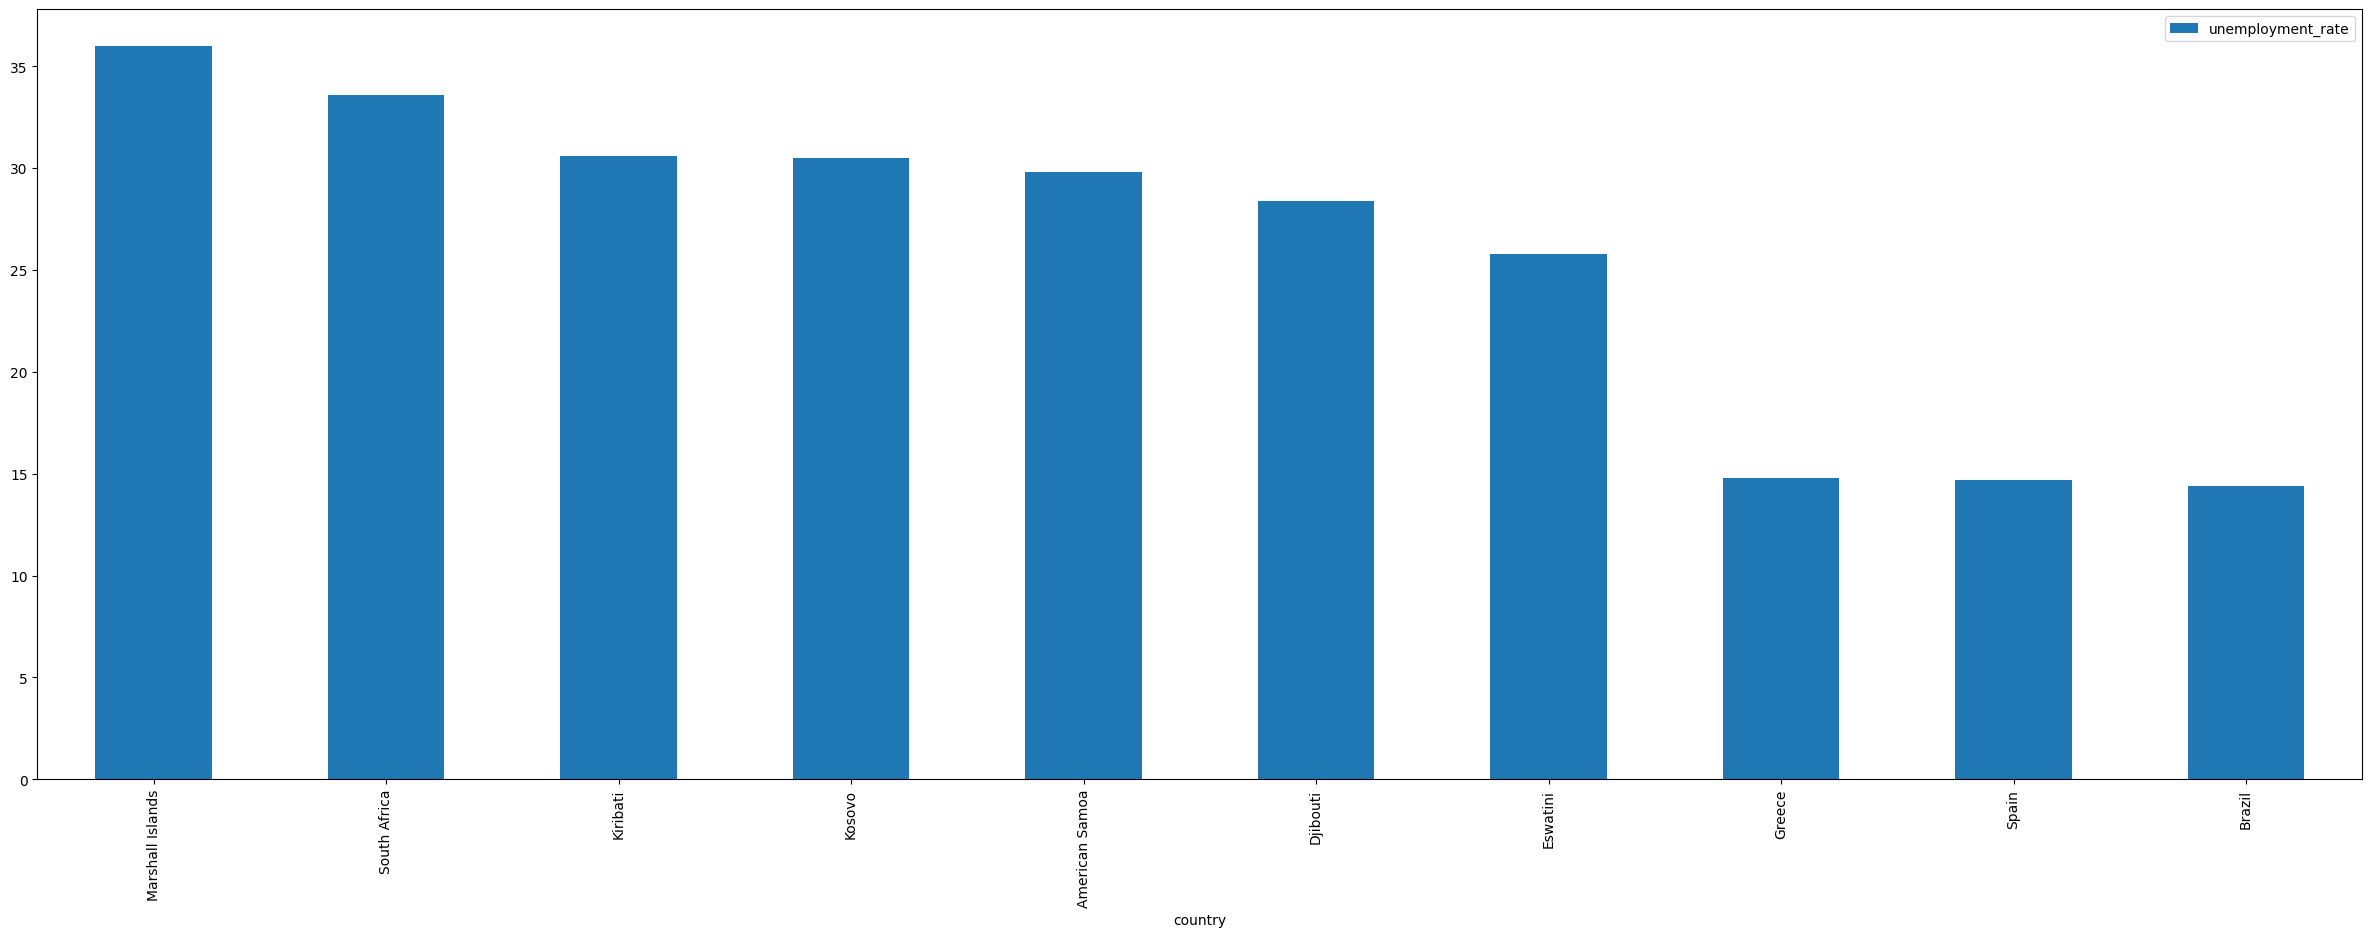

In [93]:
#Comprobamos cómo España se cuela entre los 10 primeros con mayor tasa de desempleo
df_unem_2.plot( x='country',y='unemployment_rate', kind='bar',figsize=(30,10))

In [94]:
df_unem['unemployment_rate'].mean()

7.8234375

In [95]:
#Hay 17 países cuya tasa de desempleo supera a la media.Entre los que se encuentra España.
len(df_unem[df_unem['unemployment_rate']>7.8234375])

17